# Documentation for Hydra Multi-Asset Verification Test
ACTION_LIST = [['test_add', 'test_q_for_r', 'test_r_for_r','test_r_for_q', 'test_remove']]



## Model Description

The methodology for the tests is to create two universes - one for Hydra and one for Uniswap - to subsequently be able to represent sequences of actions on each side. As the Hydra system is unique in its design and has no counterpart yet for approprate comparisons the role of the benchmark will be fulfilled by assembling several Uniswaps together in a way that everything that can be done in Hydra can be accordingly reproduced. This allows next to compare the implications on both systems and ultimately assess the quantitative and qualitative differences of results and impacts on the Hydra system and its agents. 

This approach necessitates the definition and specification of two models:
   - 1 Hydra Omnipool model with one instance that is defined in line with the [Hydra Mathematical Specification](https://hackmd.io/M7OeWimITKGVxBDHGQa6gQ?view)
   - 1 Uniswap model with several instances that each are responsible for a particular mechanism
        - which of 1 instance is used for liquidity provision in asset $R_i$: this is modeled as a Uniswap of $R_i$ and $Q$
        - which of 1 instance is used for liquidity provision in asset $R_j$: this is modeled as a Uniswap of $R_j$ and $Q$
        - which of 1 instance is used for swaps between assets $R_i$ and $R_j$: this is modeled as a Uniswap of $R_i$ and $R_j$
        
![](https://i.imgur.com/yb6Zh3T.png)
        
## Test cases

A variety of testcases can be explored with this model resulting from a combination of the following parameters
   
   - Event: Add Liquidity, Remove Liquidity, Swap Asset, Swap Asset for Base
   - Asset: $R_i$, $R_j$, $R_k$, $Q$
   - Multiple Action Type: Alternating, $i$ only, $j$ only
   - Composite Action Type: Alternating, Trade Bias
   - Enable Symmetric Liquidity: True, False
    
In addition to these settings also a fee structure can be imposed:

   - Fixed Fee

## Test agents

The model specifies a number of eight agents that each have their local balances, can interact with the system and are modeled to be responsible for **one action only**. This allows to track for each testcase how the balances will develop and to show independently which events will trigger changes to local and global states. Most importantly directly and indirectly affected variables can be easily identified.

Two dataframes of agents are initialized identically for both the Uniswap and the Hydra world and then work their way through on each side according to the testcase. Afterwards the effects on both sides can be compared.

![](https://i.imgur.com/r9IAJMr.png)



## Composite Action Tests

Besides being able to test all mechanisms individually also compositions of actions can be performed. This means selecting and combining two from the above testcases and letting the respective agents take the actions repeadetly. A composition action test therefore is defined as two actions which each can be a combination of *event* and *asset* selected from the list of testcases above, for example:
- Add liquidity in $R_i$ and Add liquidity in $R_j$
- Add liquidity in $R_i$ and Swap $R_i$ for $Q$
- Remove liquidity in $R_j$ and Swap $R_i$ for $Q$
- ...

In total there would be 28 composit pairs which can be derived from this decision tree:
selecting any one of the four primitive mechanisms of: **trade in/out** or **add/remove liquidity** of some given asset and then the subsequent action could be the three remaining mechanisms of the same asset or doing anyone of the four mechanisms in another asset.  

These basic combinations can be explored before further proceeding with
- trade sizes,
- trade frequencies,
- randomization,...



## Introduction to Uniswap
>Uniswap is an automated market maker for exchanging ERC20 tokens. Anyone can become a liquidity provider, and invest in the liquidity pool of an ERC20 token. This allows other users to trade that token for other tokens at an exchange rate based on their relative availibility. When a token trade is executed, a small fee is paid to the liquidity providers that enabled the transaction.
https://uniswap.io/

There are basically eight ways (_mechanisms_) in which an agent can interact with an instance of Uniswap (https://github.com/Uniswap/uniswap-v1/blob/master/contracts/uniswap_exchange.vy):
1. `addLiquidity`: deposit ETH and tokens in the liquidity pool; mint UNI tokens - "shares" of that Uniswap instance - in exchange;
1. `removeLiquidity`: burn UNI tokens; withdraw a proportional amount of ETH and tokens in exchange;
1. `ethToTokenInput`: user specifies an exact amount of ETH they send; receives corresponding amount of tokens
1. `ethToTokenOutput`: user sends some ETH and specifies an exact amount of tokens they want to buy; Uniswap refunds ETH sent in excess
1. `tokenToEthInput`: user specifies an exact amount of tokens they send; receives corresponding amount of ETH
1. `tokenToEthOutput`: user specifies an exact amount of ETH they want to buy; Uniswap takes the corresponding amount of tokens from the user account
1. `tokenToTokenInput`: user specifies an exact amount of "token A" they send; receives corresponding amount of "token B" (effectively a `tokenToEthInput` in instance A combined with a `ethToTokenInput` in instance B)
1. `tokenToTokenOutput`: user specifies an exact amount of "token B˜ they want to buy; Uniswap takes the corresponding amount of "token A" from the user account (effectively a `ethToTokenOutput` in instance B combined with a `tokenToEthOutput` in instance A)

## Limitations and simplifications of this model
* When triggering mechanisms, Uniswap users may include conditions they would like to apply to the transaction. For example, they could define a minimum amount of UNI tokens they wish to receive as a result of adding liquidity to the pool; or the maximum number of tokens they are willing to pay for the amount of ETH requested in a `tokenToEthOutput` operation; or a deadline after which the transaction should not be processed. **This simplified model does not account for this kind conditioning.**

* The `ethToTokenOutput`, `tokenToEthOutput` mechanisms are not implemented. **All swaps are treated as of the "input defined" type.**

* The `tokenToToken` mechanism are not implemented, as they are merely a `tokenToEth` in the context of a single Uniswap instance.

* **User _behavior_ has not been modeled**. User _actions_ are derived from the history of events of the Uniswap instance being analyzed.

## Introduction to Hydra
>Hydra is an automated market maker that generalizes the concept of Uniswap and Balancer to a) an arbitrary number of dimensions and b) a variant weight distaribution of assets in the pool that changes in accordance with action sequences in the pool. Anyone can become a liquidity provider, and invest in the 'Omnipool'. This allows other users to trade that token for other tokens at an exchange rate based on their relative availibility. When a token trade is executed, a small fee is paid to the liquidity providers that enabled the transaction.
https://hydradx.io/

There is a predefined set of (_mechanisms_) in which an agent can interact with an the Hydra Protocol :
1. `addLiquidity`: deposit a risk asset in the omnipool; mint HDX tokens - "shares" of this risk asset - in exchange;
1. `removeLiquidity`: burn HDX tokens; withdraw a proportional amount of the risk asset in exchange;
1. `tokenToTokenInput`: user specifies an exact amount of "token A" they send; receives corresponding amount of "token B" 
1. `tokenToTokenOutput`: user specifies an exact amount of "token B˜ they want to buy; Hydra takes the corresponding amount of "token A" from the user account 



## Model File structure

The folder **model** contains:

 - a file config.py: 

    This file configures the simulation experiments by setting the number of monte carlo runs, the number of timesteps for the simulation and the simulation parameters. It also aggregates the partial states and the initial state variables.
    
    The purpose of this file is to *configure and initialize* the experiment.
    
    
 - a file partial_state_update_block.py

    This file defines each partial state update block individually. This feature allows cadCAD to divide each simulation timestep into several 'blocks' where different state variables are mutated conditioned upon the policy input.
    
    In the current setting 
    - the first block maps the user action to the appropriate mechanism in the uniswap world
    - the second block maps the user action to the appropriate mechanism in the hydra world
    - the third block resolves the quantities of HDX and weights in the hydra world
    - the forth block calculates the metrics: the swap prices in the uniswap world and the pool prices in the hydra world

    This file corresponds to the system specification diagram, where each column is one partial state update block 
    
    The purpose of this file is to *define* the sequence and details of state updates for each simulation timestep. The relevant mechanisms are imported from the files in the **parts** folder
    
    
 - a file plot_utils.py

    This file defines all plot functions that can be called in the jupyter notebook to visualize the results. In general there are three types of plots:
    - plots related to the uniswap world (do not contain the word 'hydra')
    - plots related to the hydra world (contain the word 'hydra')
    - general plots applicable to both worlds (f.e Impermanent Loss)

    It also can be distinguished between plots related to global system variables and local agent variables:
    - global variables (do not contain the word 'agent')
    - local variables (contain the word 'agent')

    The purpose of this file is to *define* the way how particular properties can be plotted over time.
    

 - a file run.py

    This file *defines* the run and postprocessing methods and is used to execute the simulation run:
    - run() is used to execute the simulation and create a dataframe
    - postprocessing is used to extract relevant metrics from the simulation output in the dataframe

     The purpose of this file is to *execute* the simulation and *create* metrics.
     
     
 - a file state_variables.py

    This file *sets* the number of agents and *defines* the local (agent-level) state variables, *sets* the number of assets and *defines* the global (system-state) variables of the system, *computes* the prices of the assets and *defines* the initial state object
    - the agent states describe their holdings of assets that agents have contributed to the pool or still hold outside as well as their quantities of shares they received for their contribution
    - the global states describe the quantities of assets in the system
    - price variables are computed from the states both in the uniswap and hydra world
    - the initial state object consists of 
        - two agent dataframes, one for each world respectively
        - two sets of global variables, one for each world respectively
        - prices for each world (? is pool = prices ?)

    The purpose of this file is to *define* the global and local states of the system.
    
    
 - a file sys_params.py

    This file *contains* the system parameters and allows to select items from a list for them. Following parameters can be defined:
    - trade action type
    - liquidity action type
    - multiple asset action type
    - composite action type
    - liquidity add type (symmetry)

    In addition the following is set
    - initial values for assets 
    - hard coded fee value
    - choice of the system parameters from the list above
    

 - a folder **parts** which itself contains general files relevant for both instances, files related specifically to Uniswap and files related specifically to Hydra 
      - [action.py](model/parts/action.py)
       This is an action dictionary which drives the model. As there are no behavioral assumptions in the model yet, currently actions are prescribed actions in testing mode derived from events. However, action schema respects https://www.kaggle.com/markusbkoch/uniswap-ethdai-exchange as much as possible, allowing for future analysis against uniswap transaction datasets.
        This file contains a function called 'actionDecoder' which takes its inputs from the file sys_params.py and maps those encoded events to agent actions. At first an arbitrary action dictionary is defined which then is adapted according to the choices of system parameters. In particular relevant are the parameter definitions of the asset, the composite and whether there is a trade or liquidity event defined.
        
    - [uniswap.py](model/parts/uniswap.py)
     Reads in action output and directs the action to the appropriate Uniswap mechanism for each corresponding Uniswap instance. Currently there are two instances in place, namely the R_i<>Q pair and the R_j<>Q pair. Both instances have their respective requisite state variables: UNI_Qx, UNI_Rx, and UNI_Sx.

    - [utils.py](model/parts/utils.py)
    Computes the state update for each Uniswap state variable and outputs the updated global state variables.
        
     - [agent_utils.py](model/parts/agent_utils.py)
     Computes the corresponding agent local state for each Uniswap agent resolving their action and outputs the updates local state variables.

      -  [hydra.py](model/prts/hydra.py)
     Reads in action output and directs the action to the appropriate Hydra mechanism for each state variable: Q, Sq, and pool.
    
      - [hydra_utils.py](model/parts/hydra_utils.py)
     Computes the state update for each Hydra state variable

    -  [asset_utils.py](model/parts/asset_utils.py)
     Computes the state update for each Reserve Asset in a Hydra Omnipool

    -  [hydra_agent_utils_class.py](model/parts/hydra_agent_utils_class.py)
     Computes the corresponding agent local state for each Hydra agent resolving their action and outputs the updates local state variables.
     
     #### The interrelations between the files are shown here:
     
    ![](https://i.imgur.com/mNhfQE4.png)



# Testcase Definition

#### Simulation Settings
- There are 100 timesteps for each simulation run
- Each testcase has 100 MC runs with different randomized variables
- Block 1 randomizes starting liquidity balances (explained below in section 'Block 1')



#### Agent Activities - Action Sequence

There are two agents acting during the simulation. The trading agent performs "R-for-R" trades of equal size but varying direction over most simulation timesteps. The liquidity agent provides liquidity to the pool at timestep 10 and removes the liquidity from the pool at timestep 90.

##### Trading agent

- One Agent performs random "R-for-R" trades during the simulation. 
- The direction of the trade is a random coin flip for each timestep.
- The size of the trade is fixed at $1000$ for each timestep.
- The agent does not act at timestep 10 nor timestep 90.

##### Liquidity agent

- One Agent provides liquidity in Asset "i" to the pool 
- He provides the liquidity at timestep 10
- He removes the liquidity at timestep 90
- He does not act at other timesteps

#### Block 1:

| #   |   Run   | a  | $\mu_i$ |          $\sigma_i$          | $\mu_j$ |          $\sigma_j$          | $\mu$ | $\sigma$ | Total runs         |
| --- |:-------:|:-------:|:-------:|:----------------------------:|:-------:|:----------------------------:| ----- | -------- | ------------------ |
| 1   | 001-100 |   0.5   |   $100.000$   | $\frac{\mu_i}{\sigma_i}= 2$  |   $100.000$   | $\frac{\mu_j}{\sigma_j}= 2$  | $1.000$ | $0$      | $100$ |
| 2   | 101-200 |   0.5   |   $100.000$   | $\frac{\mu_i}{\sigma_i}= 50$ |   $100.000$   | $\frac{\mu_j}{\sigma_j}= 50$ | $1.000$ | $0$      | $100$ |
| 3   | 201-300 |    1    |   $100.000$   | $\frac{\mu_i}{\sigma_i}= 2$  |   $100.000$   | $\frac{\mu_j}{\sigma_j}= 2$  | $1.000$ | $0$      | $100$ |
| 4   | 301-400 |    1    |   $100.000$   | $\frac{\mu_i}{\sigma_i}= 50$ |   $100.000$  | $\frac{\mu_j}{\sigma_j}= 50$ | $1.000$ | $0$      | $100$ |
| 5   | 401-500 |   1.5   |   $100.000$   | $\frac{\mu_i}{\sigma_i}= 2$  |   $100.000$   | $\frac{\mu_j}{\sigma_j}= 2$  | $1.000$ | $0$      | $100$ |
| 6   | 501-600 |   1.5   |   $100.000$   | $\frac{\mu_i}{\sigma_i}= 50$ |   $100.000$   | $\frac{\mu_j}{\sigma_j}= 50$ | $1.000$ | $0$      | $100$ |

All tests in block 1 are performed as 100 **MonteCarlo Experiments** with the following randomization:
- The initial balances of the liquidity pools are drawn randomly for each MC run from the same lognormal distribution with $\mu_i$ and $\mu_j$ fixed at $100000$
    - The underlying mean for the lognormal liquidity draw is $\log{100000}$
    - The underlying standard deviation for the lognormal liquidity draw is $\sqrt{\log{1 + \frac{2000^2}{100000^2}}}$
- The action sequence of the agents is randomized in that sense that:
    - For each individual MC run the sequence is identical for the Uniswap and Hydra side of the model. For each timestep of the simulation exactly the same event takes place on both sides.
    - For each individual MC run the trading directions are randomized for each timestep. Therefore the event sequence for each run will be different.
    - For all MC runs the trading amount is always equal to $1000$




# Testcase in this notebook


This notebook documents the results of the following experiment:
- Settings from Block 1 as outlined above
- Testcases **2**, **4** and **6**
- Sweep over three values for $a \in \{0.5, 1, 1.5 \}$ with a fixed $\mu$-to-$\sigma$-ratio of $50$.

The experiment result dataframe is saved into a pickle file and analyzed throughout this notebook.

## Run Model

The following command lines import all packages, experiments and run the model 

This is the execution of cadcad. This writes the config object, does the execution and returns the rdf - which is a data object that shows the rows and columns of results in a dataframe

Here is one additional option as well. The postprocessing causes the index of the results to be every forth because of the cadcad architecture where the partial state updates are the substeps. With this option selected we see only the end of each timestep - the last substep. Therefore only final results are shown. To get a line for each substep the postprocessing needs to be deactivated. 

In [1]:
from model.config_wrapper import ConfigWrapper

from model import run_wrapper
from cadCAD import configs

# parametric_experiment = ConfigWrapper()
# get_keys = parametric_experiment.get_config()
# get_keys[0]['M']
# parametric_experiment.get_config()

running file: config_wrapper.py
end of file: config_wrapper.py
running file: run_wrapper.py
end of file: run_wrapper.py


In [2]:
# import model as model


In [3]:
# parametric_experiment = ConfigWrapper(model)


In [4]:
# del configs[:]

# parametric_experiment.append()

In [5]:
# get_keys = parametric_experiment.get_config()
# get_keys[0]['M']

In [6]:
# Dependences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Experiments
from model import run
from model.parts.utils import *
from model.plot_utils import *

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

# df = run.run()
# rdf = run.postprocessing(df)
# rdf = df # debugging substeps
# pd.set_option("mode.chained_assignment", None)


running file: run.py
running file: state_variables.py
running file: initialize_liquidity.py
end of file: initialize_liquidity.py
running file: asset_utils.py
end of file: asset_utils.py
end of file: state_variables.py
running file: partial_state_update_block.py
end of file: action_list.py
end of file: partial_state_update_block.py
running file: sim_setup.py
end of file: sim_setup.py
[100000. 100000.] [100000. 100000.]
Omni_P_RQi ================== 0.09999999999999998
Initial Q HDX: 20000.0
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 100000.00000000001, 'S': 10000, 'W': 10000, 'P': 0.09999999999999998, 'dP': 0}, 'j': {'R': 100000.00000000001, 'S': 10000, 'W': 10000, 'P': 0.09999999999999998}, 'k': {'R': 100000.00000000001, 'S': 10000, 'W': 10000, 'P': 0.09999999999999998}}}
config_param a value =============  0.5
Omni_P_RQi ================== 0.09999999999999998
Initial Q HDX: 20000
config_init_state  <class 'model.parts.asset_utils.Asset'>: {'pool':

In [7]:
(data, tensor_field, sessions) = run_wrapper.run(drop_midsteps=True)

experiments = data



                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 2
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 16, 3, 23)
Execution Method: local_simulations
SimIDs   : [0, 0, 0, 1, 1, 1]
SubsetIDs: [0, 1, 2, 0, 1, 2]
Ns       : [0, 1, 2, 0, 1, 2]
ExpIDs   : [0, 0, 0, 1, 1, 1]
Execution Mode: parallelized
H_chosen_agent H_chosen_agent    m   r_i_out    r_i_in         h       q_i       s_i  s_q   r_j_out  \
0  0 100000.00 110000.00 140000.00 170000.00 150000.00 0.00 120000.00   

     r_j_in       q_j       s_j  
0 130000.00 180000.00 160000.00  
delta_Ri =  -17735.9008405109
H_agent r out =  100000.0
**********
Q ADDED INTO POOL: 2000 to existing amount 20000.0
**********
**********
POOL RESERVE ONE REMOVING ASSET i in amount 17735.9008405109 from reserve 100000.000000000

H_chosen_agent **********   m   r_i_out    r_i_in         h       q_i       s_i  s_q   r_j_out  \
0  0 140921.86 110000.00 133652.00 170000.00 150000.00 0.00 120000.00   

     r_j_in       q_j       s_j  
0 130000.00 180000.00 160000.00  
delta_Ri =  8957.61417520758
H_agent r out =  140921.86485320874
**********
Q ADDED INTO POOL: 2198 to existing amount 36150.510654525766

**********
POOL RESERVE ONE REMOVING ASSET i in amount 4903.739316672235 from reserve 88173.462699709
**********
H_chosen_agent**********
**********
POOL RESERVE ONE REMOVING ASSET i in amount 8957.61417520758 from reserve 114320.13514679126
**********
H_chosen_agent    m   r_i_out    r_i_in         h       q_i       s_i  s_q   r_j_out  \
0  0 149879.48 110000.00 131454.00 170000.00 150000.00 0.00 120000.00   

     r_j_in       q_j       s_j  
0 130000.00 180000.00 160000.00  
delta_Ri =  7566.84524808722
H_agent r out =  149879.47902841633
**********
Q ADDED INTO POOL: 2172 to existing amount 38348.510654525766


**********
H_chosen_agent H_chosen_agent   m  r_i_out    r_i_in         h       q_i       s_i  s_q   r_j_out  \
0  0 -4426.32 110000.00 103428.00 170000.00 150000.00 0.00 120000.00   

     r_j_in       q_j       s_j  
0 130000.00 180000.00 160000.00  
delta_Ri =  743.5641508607358
H_agent r out =  -4426.316370889241
**********
Q ADDED INTO POOL: -618 to existing amount 62929.3795517456
**********
**********
POOL RESERVE ONE REMOVING ASSET i in amount -743.5641508607358 from reserve 63155.68362911077
**********
    m   r_i_out    r_i_in         h       q_i       s_i  s_q   r_j_out  \
0  0 202895.14 110000.00 107956.00 170000.00 150000.00 0.00 120000.00   

     r_j_in       q_j       s_j  
0 130000.00 180000.00 160000.00  
delta_Ri =  2334.003650646084
H_agent r out =  202895.1404302744
**********
Q ADDED INTO POOL: 1966 to existing amount 59150.58045741486
**********
**********
POOL RESERVE ONE REMOVING ASSET i in amount 2334.003650646084 from reserve 60489.85956972562
**********
H_ch

H_chosen_agentH_chosen_agent     m   r_i_out    r_i_in        h       q_i       s_i  s_q   r_j_out  \
0  0 219911.07 110000.00 90180.00 170000.00 150000.00 0.00 120000.00   

     r_j_in       q_j       s_j  
0 130000.00 180000.00 160000.00  
   m   r_i_out    r_i_in        h       q_i       s_i  s_q   r_j_out  \
0  0 -18162.93 110000.00 91044.00 170000.00 150000.00 0.00 120000.00   

     r_j_in       q_j       s_j  
0 130000.00 180000.00 160000.00  delta_Ri =  1822.6974505166133
H_agent r out =  219911.0714887262
**********
Q ADDED INTO POOL: 2406 to existing amount 71500.03316541862
**********
**********
POOL RESERVE ONE REMOVING ASSET i in amount 1822.6974505166133 from reserve 48286.92851127379
**********
H_chosen_agent    m   r_i_out    r_i_in        h       q_i       s_i  s_q   r_j_out  \
0  0 221733.77 110000.00 87774.00 170000.00 150000.00 0.00 120000.00   

     r_j_in       q_j       s_j  
0 130000.00 180000.00 160000.00  
delta_Ri =  -1744.7774395794015
H_agent r out =  -18

**********
H_chosen_agent    m   r_i_out    r_i_in        h       q_i       s_i  s_q   r_j_out  \
0  0 232660.89 110000.00 73020.00 170000.00 150000.00 0.00 120000.00   

     r_j_in       q_j       s_j  
0 130000.00 180000.00 160000.00  
delta_Ri =  1498.4193151537513
H_agent r out =  232660.89054020218
**********
Q ADDED INTO POOL: 2252 to existing amount 75729.45186431387
**********
**********
POOL RESERVE ONE REMOVING ASSET i in amount 1498.4193151537513 from reserve 45135.1094597978
**********
H_chosen_agent    m   r_i_out    r_i_in        h       q_i       s_i  s_q   r_j_out  \
0  0 234159.31 110000.00 70768.00 170000.00 150000.00 0.00 120000.00   

     r_j_in       q_j       s_j  
0 130000.00 180000.00 160000.00  
delta_Ri =  1459.9346891906807
H_agent r out =  234159.30985535594
**********
Q ADDED INTO POOL: 2348 to existing amount 77981.45186431387
**********
**********
POOL RESERVE ONE REMOVING ASSET i in amount 1459.9346891906807 from reserve 43636.690144644046
**********
H

H_chosen_agent    m   r_i_out    r_i_in        h       q_i       s_i  s_q   r_j_out  \
0  0 245698.39 110000.00 52588.00 170000.00 150000.00 0.00 120000.00   

     r_j_in       q_j       s_j  
0 130000.00 180000.00 160000.00  
delta_Ri =  1097.7800271828144
H_agent r out =  245698.3864048976
**********
Q ADDED INTO POOL: 1928 to existing amount 81242.86303780033
**********
**********
POOL RESERVE ONE REMOVING ASSET i in amount 1097.7800271828144 from reserve 41595.61359510236
**********
H_chosen_agent    m   r_i_out    r_i_in        h       q_i       s_i  s_q   r_j_out  \
0  0 246796.17 110000.00 50660.00 170000.00 150000.00 0.00 120000.00   

     r_j_in       q_j       s_j  
0 130000.00 180000.00 160000.00  
delta_Ri =  629.3714724409606
H_agent r out =  246796.1664320804
**********
Q ADDED INTO POOL: 1154 to existing amount 83170.86303780033
**********
**********
POOL RESERVE ONE REMOVING ASSET i in amount 629.3714724409606 from reserve 40497.833567919544
**********
154863.0
POOL R

0 130000.00 180000.00 160000.00  
delta_Ri =  -3831.5057659611084
H_agent r out =  32729.708172038318
**********
Q ADDED INTO POOL: 1886 to existing amount 52282.9350697907
**********
**********
POOL RESERVE ONE REMOVING ASSET i in amount 3831.5057659611084 from reserve 90146.70817203834
    m  r_i_out    r_i_in         h       q_i       s_i  s_q   r_j_out  \
0  0 23726.93 110000.00 120786.00 170000.00 150000.00 0.00 120000.00   

     r_j_in       q_j       s_j  
0 130000.00 180000.00 160000.00  
delta_Ri =  -4874.595368933197
H_agent r out =  23726.92690571596
**********
Q ADDED INTO POOL: 2506 to existing amount 53514.924141614465
**********
**********
POOL RESERVE ONE REMOVING ASSET i in amount 4874.595368933197 from reserve 88083.92690571597
**********
**********
H_chosen_agent    m  r_i_out    r_i_in         h       q_i       s_i  s_q   r_j_out  \
0  0 18852.33 110000.00 118280.00 170000.00 150000.00 0.00 120000.00   

     r_j_in       q_j       s_j  
0 130000.00 180000.00 16000

Q ADDED INTO POOL: 4134 to existing amount 70445.26462949176
**********
**********
POOL RESERVE ONE REMOVING ASSET i in amount 4016.411291619258 from reserve 63328.492745228206
**********
**********
**********
POOL RESERVE ONE REMOVING ASSET i in amount 47.67360058032075 from reserve 61523.2487104413
**********
H_chosen_agent H_chosen_agent    m  r_i_out    r_i_in        h       q_i       s_i  s_q   r_j_out    r_j_in  \
0  0 -9219.92 110000.00 91554.00 170000.00 150000.00 0.00 120000.00 130000.00   

        q_j       s_j  
0 180000.00 160000.00  
delta_Ri =  -2343.710530063731
H_agent r out =  -9219.918546391102
**********
Q ADDED INTO POOL: 2590 to existing amount 73589.84794741998
**********
**********
POOL RESERVE ONE REMOVING ASSET i in amount 2343.710530063731 from reserve 60237.081453608946
**********
   m  r_i_out    r_i_in        h       q_i       s_i  s_q   r_j_out    r_j_in  \
0  0 -8382.42 110000.00 98284.00 170000.00 150000.00 0.00 120000.00 130000.00   

        q_j      

H_agent r out =   -2159.955186618838
H_agent r out =  -18369.414007196792
**********
Q ADDED INTO POOL: 2596 to existing amount 76411.7514195049
**********
**********-30027.651862912513
**********
Q ADDED INTO POOL: 786 to existing amount 76774.90115803281
**********
**********
POOL RESERVE ONE REMOVING ASSET i in amount 662.066358142233 from reserve 56721.348137087516
**********
H_chosen_agent
 POOL RESERVE ONE REMOVING ASSET i in amount 2159.955186618838 from reserve 57747.58599280326
**********
H_chosen_agent   m   r_i_out    r_i_in        h       q_i       s_i  s_q   r_j_out  \
0  0 -30689.72 110000.00 73244.00 170000.00 150000.00 0.00 120000.00   

     r_j_in       q_j       s_j  
0 130000.00 180000.00 160000.00   
delta_Ri =  -2536.678320151986
H_agent r out =  -30689.718221054747
**********
Q ADDED INTO POOL: 3160 to existing amount 77560.90115803281
**********
**********
POOL RESERVE ONE REMOVING ASSET i in amount 2536.678320151986 from reserve 56059.28177894528
**********
H_c

**********
**********
POOL RESERVE ONE REMOVING ASSET i in amount 1388.7927089042112 from reserve 52690.01755547265
**********
H_chosen_agent    m   r_i_out    r_i_in        h       q_i       s_i  s_q   r_j_out  \
0  0 -32446.78 110000.00 62138.00 170000.00 150000.00 0.00 120000.00   

     r_j_in       q_j       s_j  
0 130000.00 180000.00 160000.00  
delta_Ri =  -1317.391416117514
H_agent r out =  -32446.77515343162
**********
Q ADDED INTO POOL: 1982 to existing amount 84877.95316183686
**********
H_chosen_agent**********
POOL RESERVE ONE REMOVING ASSET i in amount 1317.391416117514 from reserve 51301.22484656844
**********
H_chosen_agent    m   r_i_out    r_i_in        h       q_i       s_i  s_q   r_j_out  \
0  0 -33764.17 110000.00 60156.00 170000.00 150000.00 0.00 120000.00   

     r_j_in       q_j       s_j  
0 130000.00 180000.00 160000.00   
delta_Ri =  -785.059987294955
H_agent r out =  -33764.16656954913
**********
Q ADDED INTO POOL: 1174 to existing amount 85120.18232035582

delta_Ri = 
Q ADDED INTO POOL: 2874 to existing amount 90881.11673884401
**********
**********
POOL RESERVE ONE REMOVING ASSET i in amount 1622.8496962449055 from reserve 47567.325559307195
**********
H_chosen_agent     m   r_i_out    r_i_in        h       q_i       s_i  s_q   r_j_out  \
0  0 -43200.52 110000.00 44696.00 170000.00 150000.00 0.00 120000.00   

     r_j_in       q_j       s_j  
0 130000.00 180000.00 160000.00  
delta_Ri =  -691.1641748163722
H_agent r out =  -43200.52413693777
**********
Q ADDED INTO POOL: 1242 to existing amount 92434.57582951545
**********
**********
POOL RESERVE ONE REMOVING ASSET i in amount 691.1641748163722 from reserve 46682.47586306229
**********
H_chosen_agent    m   r_i_out    r_i_in        h       q_i       s_i  s_q   r_j_out  \
0  0 -43891.69 110000.00 43454.00 170000.00 150000.00 0.00 120000.00   

     r_j_in       q_j       s_j  
0 130000.00 180000.00 160000.00  
delta_Ri =  -1304.3725851605607
H_agent r out =  -43891.688311754144
********

addliq - Sq delta Sqaddliq - Sq delta Sq 10093.259463976265
addliq - Sq delta S 10093.259463976265
POOL ADD LIQUIDITY Timestep ===  10 delta W  13151.59855361621
H_chosen_agent     m   r_i_out    r_i_in         h       q_i       s_i  s_q   r_j_out  \
0  0 144900.17 110000.00 132258.00 170000.00 150000.00 0.00 120000.00   

     r_j_in       q_j       s_j  
0 130000.00 180000.00 160000.00  14871.810815910823
addliq - Sq delta S 14871.810815910823
POOL ADD LIQUIDITY Timestep ===  10 delta W  23485.713896222078
H_chosen_agent
    m  r_i_out    r_i_in         h       q_i       s_i  s_q   r_j_out  \
0  0 42567.77 110000.00 126994.00 170000.00 150000.00 0.00 120000.00   

     r_j_in       q_j       s_j  
0 130000.00 180000.00 160000.00  delta_Ri = 
delta_Ri =  -7000.491770493126
H_agent r out =  42567.76915468121
**********
Q ADDED INTO POOL: 3370 to existing amount 53790.07170579509
**********
**********
POOL RESERVE ONE REMOVING ASSET i in amount 7000.491770493126 from reserve 98760.76915

H_chosen_agent    m  r_i_out    r_i_in         h       q_i       s_i  s_q   r_j_out  \
0  0 18992.87 110000.00 115690.00 170000.00 150000.00 0.00 120000.00   

     r_j_in       q_j       s_j  
0 130000.00 180000.00 160000.00   
delta_Ri =  -875.3824633285326
H_agent r out =  18992.870334392195
**********
Q ADDED INTO POOL: 486 to existing amount 58774.190888907055
**********
**********
POOL RESERVE ONE REMOVING ASSET i in amount 875.3824633285326 from reserve 88834.87033439222
**********
   m   r_i_out    r_i_in         h       q_i       s_i  s_q   r_j_out  \
0  0 192942.30 110000.00 113932.00 170000.00 150000.00 0.00 120000.00   

     r_j_in       q_j       s_j  
0 130000.00 180000.00 160000.00  H_chosen_agent
    m  r_i_out    r_i_in         h       q_i       s_i  s_q   r_j_out  \
0  0 18117.49 110000.00 115204.00 170000.00 150000.00 0.00 120000.00   

     r_j_in       q_j       s_j  
0 130000.00 180000.00 160000.00  delta_Ri =  4590.911907699808
H_agent r out =  192942.2971352478

0 130000.00 180000.00 160000.00  
delta_Ri =  -1539.0111898615753

H_agent r out =  -12775.694527171603
**********
Q ADDED INTO POOL: 1424 to existing amount 72576.26502791603
**********
**********
POOL RESERVE ONE REMOVING ASSET i in amount 1539.0111898615753 from reserve 69396.3054728284
**********
H_chosen_agentdelta_Ri =     m   r_i_out    r_i_in        h       q_i       s_i  s_q   r_j_out  \
0  0 -14314.71 110000.00 92274.00 170000.00 150000.00 0.00 120000.00   

     r_j_in       q_j       s_j  
0 130000.00 180000.00 160000.00  
delta_Ri =  -2640.5208098954636
H_agent r out =  -14314.70571703318
**********
Q ADDED INTO POOL: 2502 to existing amount 72730.19747222494
**********
**********
POOL RESERVE ONE REMOVING ASSET i in amount 2640.5208098954636 from reserve 69235.29428296683
**********
 H_chosen_agent3095.9837915124936
    m   r_i_out    r_i_in        h       q_i       s_i  s_q   r_j_out  \
0  0 -16955.23 110000.00 89772.00 170000.00 150000.00 0.00 120000.00   

     r_j_in 

0 130000.00 180000.00 160000.00  

delta_Ri =  2332.8207425061646
H_agent r out =  230057.39859935964
**********
Q ADDED INTO POOL: 2372 to existing amount 66164.50744018343
**********
**********
POOL RESERVE ONE REMOVING ASSET i in amount 2332.8207425061646 from reserve 57395.60140064039
**********
H_chosen_agent**********    m   r_i_out    r_i_in        h       q_i       s_i  s_q   r_j_out  \
0  0 232390.22 110000.00 86520.00 170000.00 150000.00 0.00 120000.00   

     r_j_in       q_j       s_j  
0 130000.00 180000.00 160000.00  
Q ADDED INTO POOL: 2530 to existing amount 83519.27961892495
**********
**********
POOL RESERVE ONE REMOVING ASSET i in amount 1957.4257951185555 from reserve 59154.12490184299
**********
H_chosen_agent 
   m   r_i_out    r_i_in        h       q_i       s_i  s_q   r_j_out  \
0  0 -31594.30 110000.00 73430.00 170000.00 150000.00 0.00 120000.00   

     r_j_in       q_j       s_j  
0 130000.00 180000.00 160000.00  delta_Ri = 
delta_Ri =  -1414.7493565430552
H

0 130000.00 180000.00 160000.00   
1140.4465963254859
H_agent r out =  246910.85204604777
**********
Q ADDED INTO POOL: 1586 to existing amount 76178.44748589437
**********
**********
POOL RESERVE ONE REMOVING ASSET i in amount 1140.4465963254859 from reserve 48653.14795395227
**********
154984.0delta_Ri = 
POOL REMOVE LIQUIDITY Timestep ===  90 delta W  12395.031205904577 delta S  4984
POOL REMOVE LIQUIDITY share fraction of pool = 0.16561848363306064
POOL REMOVE LIQUIDITY share fraction of reserve = 0.19116078229060493
POOL REMOVE LIQUIDITY weight fraction of pool = 0.19116078229060493
154984.0 
H_chosen_agent-1470.2873573426955    m   r_i_out    r_i_in        h       q_i       s_i  s_q   r_j_out  \
0  0 248051.30 110000.00 67528.00 170000.00 150000.00 0.00 120000.00   

     r_j_in       q_j       s_j  
0 130000.00 180000.00 160000.00  

delta_Ri =  1214.1479104145803
H_agent r out =  248051.29864237327H_agent r out = 
********** 
-43682.256838045694Q ADDED INTO POOL: 1542 to existi

In [8]:
import pickle
filename = 'experiment' + '_block2_randomRJforQorQforRJ_sigma50_' + '20210601' + '.pkl'
with open(filename, 'wb') as f:
  pickle.dump(experiments, f)

# Results dataframe analysis

### Excerpt from the results (head & tail)

In [9]:
experiments.head()

,index,UNI_Qi,UNI_Ri,UNI_Si,UNI_Qj,UNI_Rj,UNI_Sj,UNI_ij,UNI_ji,UNI_Sij,...,hydra_agents,C,asset_random_choice,trade_random_size,trade_random_direction,simulation,subset,run,substep,timestep
0,0,200000.00,100000.00,10000.00,200000.00,100000.00,10000,100000.00,100000.00,10000000000.00,...,m r_i_out r_i_in h q_i ...,1000000000000.00,i,1000,test_q_for_r,0,0,1,0,0
1,4,202000.00,99013.00,10000.00,200000.00,100000.00,10000,100000.00,100000.00,10000000000.00,...,m r_i_out r_i_in h q_i ...,1000000000000.00,i,883,test_r_for_q,0,0,1,4,1
2,8,200220.00,99896.00,10000.00,200000.00,100000.00,10000,100000.00,100000.00,10000000000.00,...,m r_i_out r_i_in h q_i ...,1000000000000.00,i,883,test_q_for_r,0,0,1,4,2
3,12,201986.00,99026.00,10000.00,200000.00,100000.00,10000,100000.00,100000.00,10000000000.00,...,m r_i_out r_i_in h q_i ...,1000000000000.00,i,1790,test_r_for_q,0,0,1,4,3
4,16,198411.00,100816.00,10000.00,200000.00,100000.00,10000,100000.00,100000.00,10000000000.00,...,m r_i_out r_i_in h q_i ...,1000000000000.00,i,1384,test_q_for_r,0,0,1,4,4


In [10]:
experiments.tail()

,index,UNI_Qi,UNI_Ri,UNI_Si,UNI_Qj,UNI_Rj,UNI_Sj,UNI_ij,UNI_ji,UNI_Sij,...,hydra_agents,C,asset_random_choice,trade_random_size,trade_random_direction,simulation,subset,run,substep,timestep
601,2389,210929.00,95036.00,10000.00,200000.00,100000.00,10000,100000.00,100000.00,10000000000.00,...,m r_i_out r_i_in h q_i ...,1967881081591.08,i,1189,test_r_for_q,1,2,3,4,96
602,2393,208331.00,96225.00,10000.00,200000.00,100000.00,10000,100000.00,100000.00,10000000000.00,...,m r_i_out r_i_in h q_i ...,1967881081591.08,i,1379,test_r_for_q,1,2,3,4,97
603,2397,205397.00,97604.00,10000.00,200000.00,100000.00,10000,100000.00,100000.00,10000000000.00,...,m r_i_out r_i_in h q_i ...,1967881081591.08,i,539,test_q_for_r,1,2,3,4,98
604,2401,206475.00,97096.00,10000.00,200000.00,100000.00,10000,100000.00,100000.00,10000000000.00,...,m r_i_out r_i_in h q_i ...,1967881081591.08,i,1435,test_q_for_r,1,2,3,4,99
605,2405,209345.00,95769.00,10000.00,200000.00,100000.00,10000,100000.00,100000.00,10000000000.00,...,m r_i_out r_i_in h q_i ...,1967881081591.08,i,1678,test_q_for_r,1,2,3,4,100


### How many rows has the dataframe? 
There should be:
- number of Montecarlos runs (=100), times
- number of parameter values for `a` (=3), times
- number of simulation timesteps for each run (=100)

In [11]:
len(experiments)

606

In [12]:
experiments = experiments.sort_values(by =['subset']).reset_index(drop=True)
len(experiments)

606

### Which columns does the dataframe have?

In [13]:
experiments.columns

Index(['index', 'UNI_Qi', 'UNI_Ri', 'UNI_Si', 'UNI_Qj', 'UNI_Rj', 'UNI_Sj',
       'UNI_ij', 'UNI_ji', 'UNI_Sij', 'uni_agents', 'UNI_P_RQi', 'UNI_P_RQj',
       'UNI_P_ij', 'pool', 'Q', 'H', 'Wq', 'Sq', 'hydra_agents', 'C',
       'asset_random_choice', 'trade_random_size', 'trade_random_direction',
       'simulation', 'subset', 'run', 'substep', 'timestep'],
      dtype='object')

### What are the entries for...?
- simulation
- subset
- run
- substep
- timestep

In [14]:
uniquesim = experiments.simulation.unique()
uniquesim.sort()
uniquesim

array([0, 1], dtype=int64)

In [15]:
experiments.subset.unique()

array([0, 1, 2], dtype=int64)

In [16]:
experiments.run.unique()

array([1, 2, 3], dtype=int64)

In [17]:
experiments.substep.unique()

array([0, 4], dtype=int64)

In [18]:
uniquetimestep = experiments.timestep.unique()
uniquetimestep.sort()
uniquetimestep

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

### How to access results for individual MonteCarlo runs?

- Choose the subset from $\{0,1,2\}$ ... for different values for `a`
- Choose the simulation from $\{0,\dots,99\}$ ... for the distinct simulation run

In [19]:
experiment1 = experiments[experiments.subset == 2]
experiment1 = experiment1[experiment1.simulation == 99]
experiment2 = experiment1.sort_values(by=['timestep'], ascending=True)
experiment2

,index,UNI_Qi,UNI_Ri,UNI_Si,UNI_Qj,UNI_Rj,UNI_Sj,UNI_ij,UNI_ji,UNI_Sij,...,hydra_agents,C,asset_random_choice,trade_random_size,trade_random_direction,simulation,subset,run,substep,timestep


### What are the entries for the variables?
- UNI_Ri
- 'UNI_Qi'
- 'UNI_Ri',
- 'UNI_Si',
- 'UNI_Qj',
- 'UNI_Rj',
- 'UNI_Sj',
- 'UNI_ij',
- 'UNI_ji',
- 'UNI_Sij'

In [20]:
experiments.UNI_Ri.unique()

array([100000., 152852., 151617., 151372., 152019., 150611., 149642.,
       150516., 148714., 147954., 147680., 146167., 145194., 146526.,
       146908., 146886., 145804., 146700., 146030., 144713., 143503.,
       144089., 153553., 144809., 152720., 152569.,  98496.,  99754.,
       101011.,  99748.,  96928.,  98214.,  99692., 101018., 100168.,
       150168., 149292., 150333., 150400., 150594., 149563., 150903.,
       151538., 152561., 154633., 153250., 153263., 151287., 146183.,
       147489., 148479., 150424., 149006., 149505., 148663., 147744.,
       146593., 145836., 146843., 145849., 145274., 144334., 146411.,
       147028.,  98078.,  96114.,  95570.,  96151.,  96852.,  96909.,
        95569.,  97116., 148686., 147530., 148343., 148918., 147452.,
       148726., 149625., 148746., 150296., 151709., 153116., 151419.,
       151741.,  99013., 150885., 148800., 149391., 151438., 151935.,
       151535., 149946., 148649., 147683., 148345., 149833., 149722.,
       102197., 1026

In [21]:
starting_Ri = experiments[experiments.timestep == 0]
starting_Ri = starting_Ri['UNI_Ri']
starting_Ri.reset_index(drop=True)
starting_Ri.unique()

array([100000.])

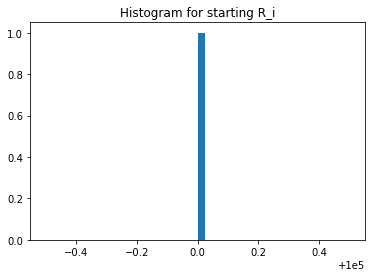

In [22]:
import matplotlib.pyplot as plt
a = starting_Ri.unique()
_ = plt.hist(a, bins=40)  # arguments are passed to np.histogram
plt.title("Histogram for starting R_i")
plt.show()

In [23]:
experiments.UNI_Qi.unique()

array([200000., 294292., 296698., 297180., 295919., 298695., 300637.,
       298897., 302531., 304091., 304657., 307821., 309891., 307083.,
       306287., 306335., 308617., 306738., 308150., 310964., 313594.,
       312323., 292944., 310775., 294537., 294812., 203064., 200511.,
       198024., 200540., 206394., 203700., 200689., 198063., 199749.,
       299456., 301220., 299141., 299009., 298625., 300691., 298029.,
       296784., 294800., 290862., 293496., 293472., 297318., 307863.,
       305146., 303118., 299404., 302262., 301257., 302969., 304861.,
       307263., 308863., 306752., 308850., 310078., 312104., 307690.,
       306403., 204392., 208582., 209774., 208511., 207007., 206885.,
       209825., 206471., 302893., 305259., 303579., 302403., 305236.,
       302630., 300818., 302602., 299491., 296710., 293992., 297298.,
       299320., 296683., 202000., 298373., 302569., 301376., 297315.,
       296346., 297132., 300292., 302922., 304910., 303554., 300549.,
       300699., 1961

In [24]:
experiments.UNI_Si.unique()

array([10000., 14991., 14874., 14984., 14863., 15193., 14986.])

In [25]:
experiments.UNI_Qj.unique()

array([200000.])

In [26]:
experiments.UNI_Rj.unique()

array([100000.])

In [27]:
starting_Rj = experiments[experiments.timestep == 0]
starting_Rj = starting_Rj['UNI_Rj']
starting_Rj.reset_index(drop=True)
starting_Rj.unique()

array([100000.])

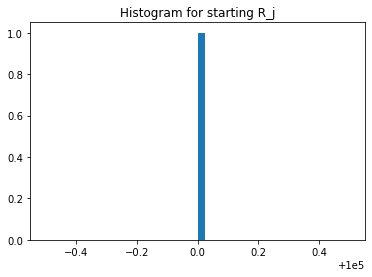

In [28]:
a = starting_Rj.unique()
_ = plt.hist(a, bins=40)  # arguments are passed to np.histogram
plt.title("Histogram for starting R_j")
plt.show()

In [29]:
experiments.UNI_Sj.unique()

array([10000], dtype=int64)

In [30]:
experiments.UNI_ij.unique()

array([100000.])

In [31]:
experiments.UNI_ji.unique()

array([100000.])

In [32]:
experiments.UNI_Sij.unique()

array([1.e+10])

In [33]:
def get_M(k, v):
    if k == 'sim_config':
        k, v = 'M', v['M']
    return k, v

config_ids = [
    dict(
        get_M(k, v) for k, v in config.__dict__.items() if k in ['simulation_id', 'run_id', 'sim_config', 'subset_id']
    ) for config in configs
]

# Agent sequences

In [34]:
agent_plot(experiment2,'Uniswap Token Holding for Agent ', 100) #,4,'j')

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
hydra_agent_plot(experiments,'Hydra Token Holdings for Agent ', 299)

# Liquidity dynamics

Movement of the Uniswap variables

- 'UNI_Ri', 'UNI_Qi', 'UNI_Si'
- 'UNI_Rj', 'UNI_Qj', 'UNI_Sj'
- 'UNI_ij', 'UNI_ji', 'UNI_Sij'

## Uniswap -- Ri-Q instance

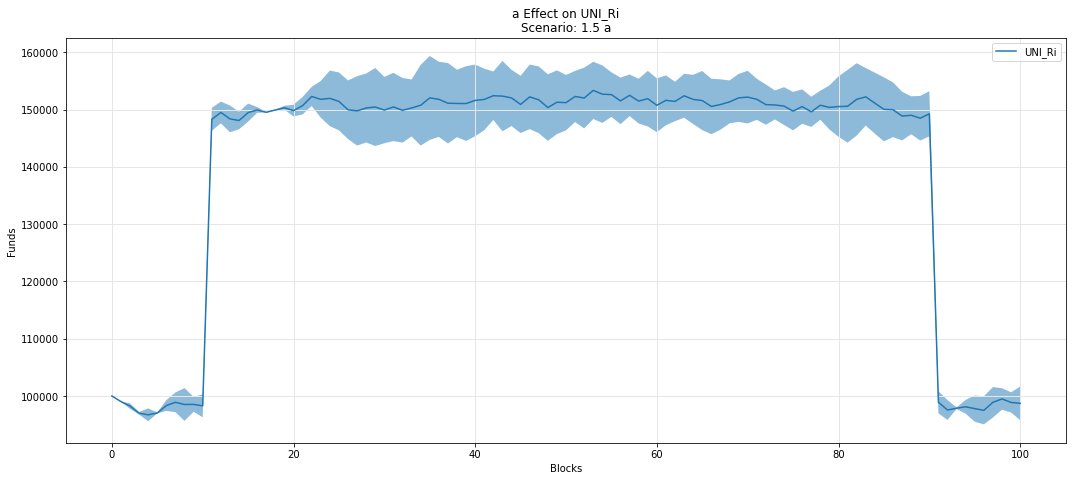

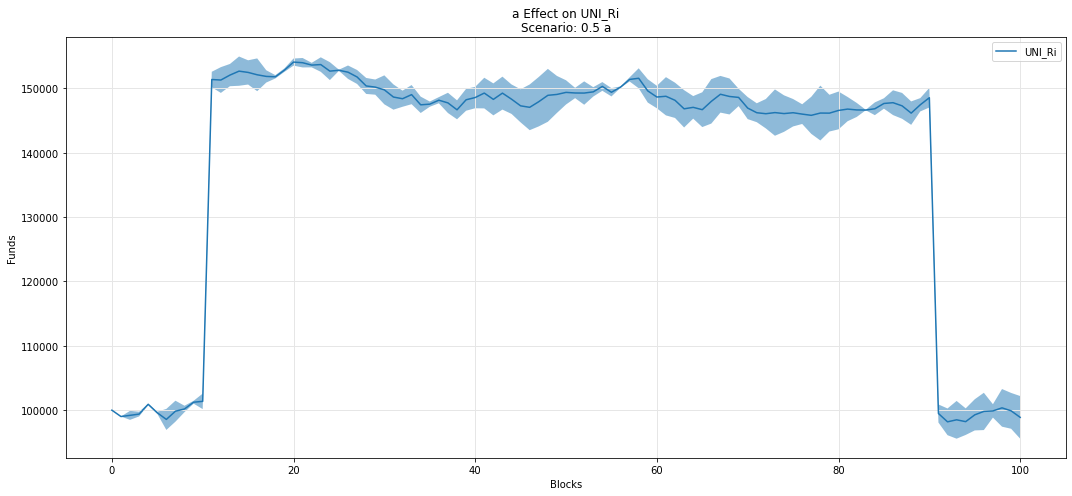

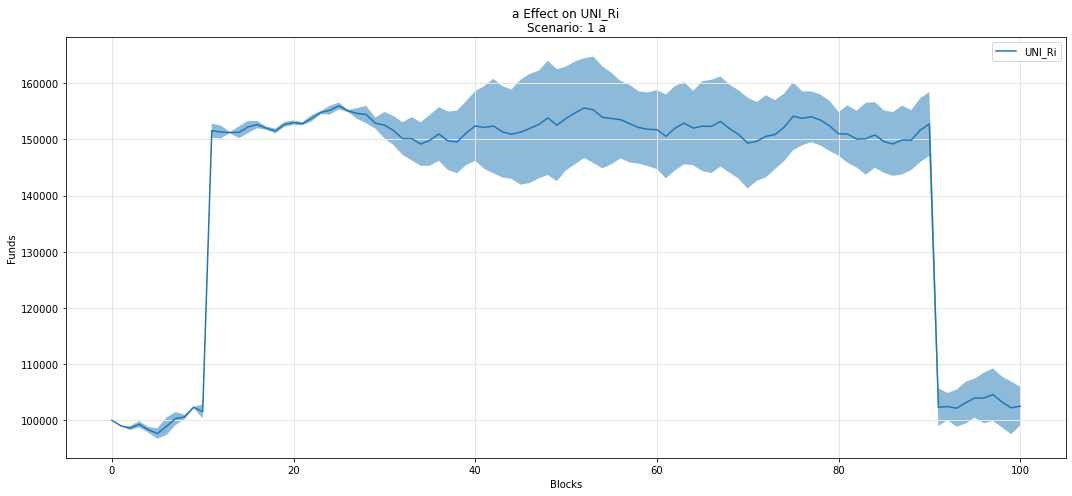

In [35]:
param_fan_plot3(experiments, config_ids, 'a','UNI_Ri')

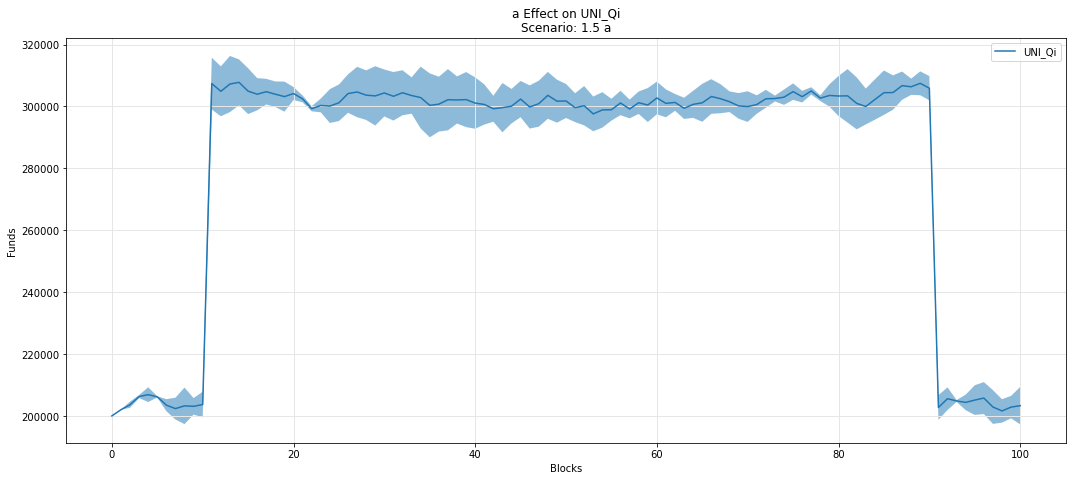

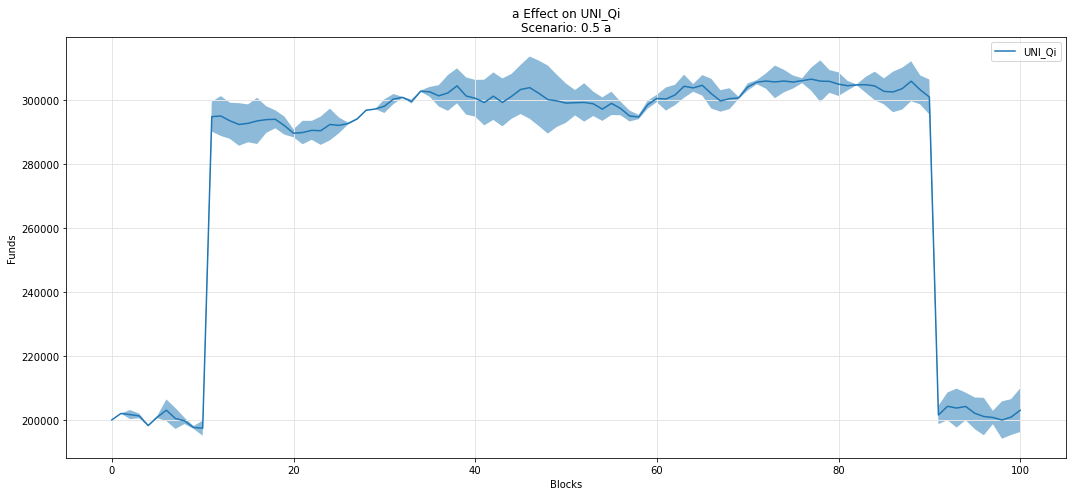

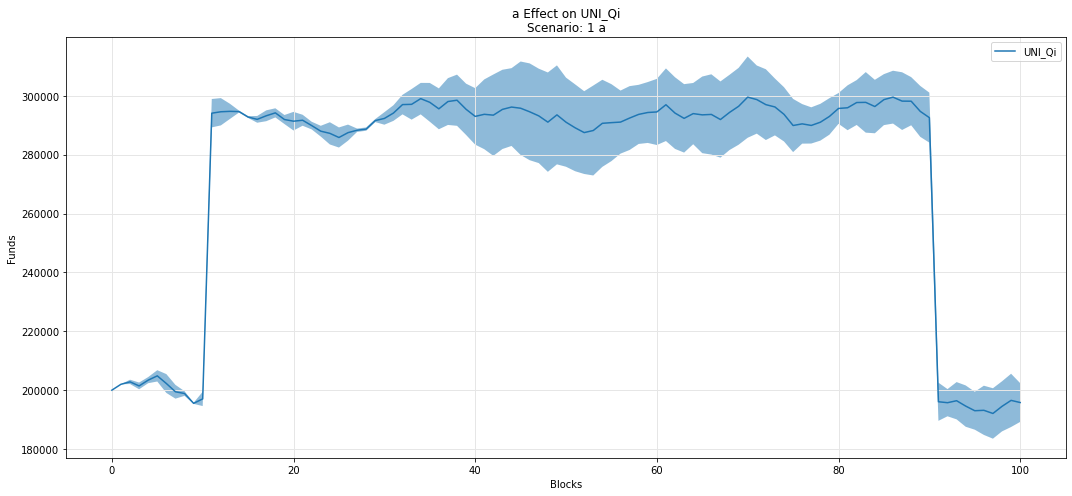

In [36]:
param_fan_plot3(experiments, config_ids, 'a','UNI_Qi')

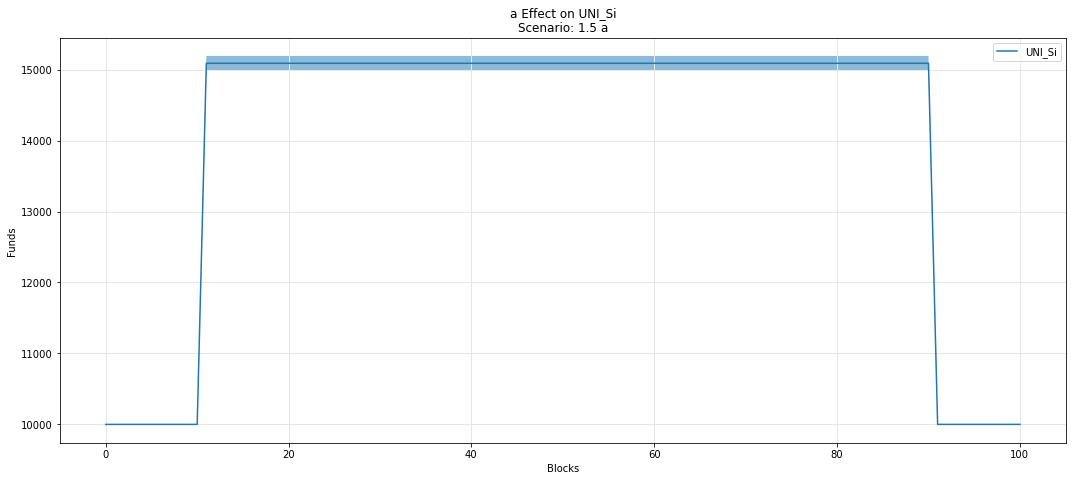

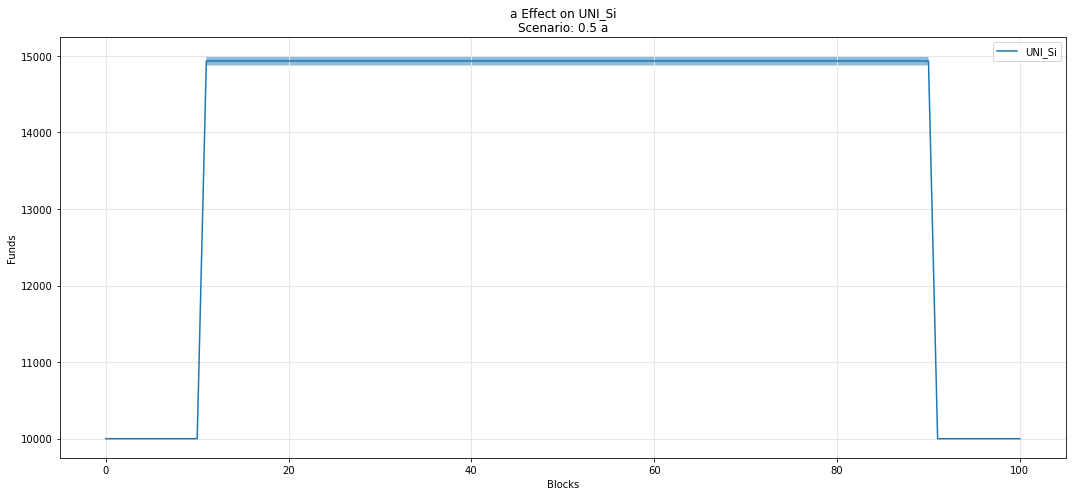

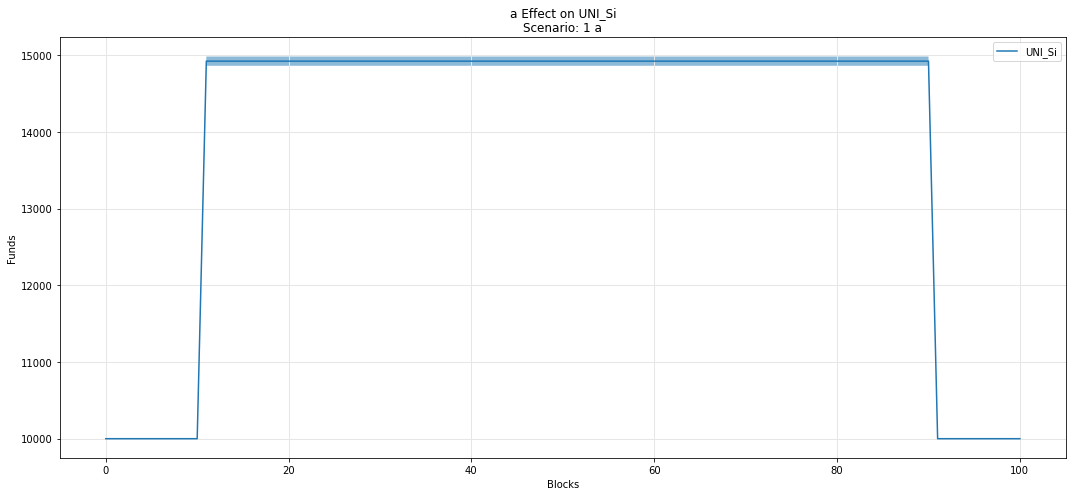

In [37]:
param_fan_plot3(experiments, config_ids, 'a','UNI_Si')

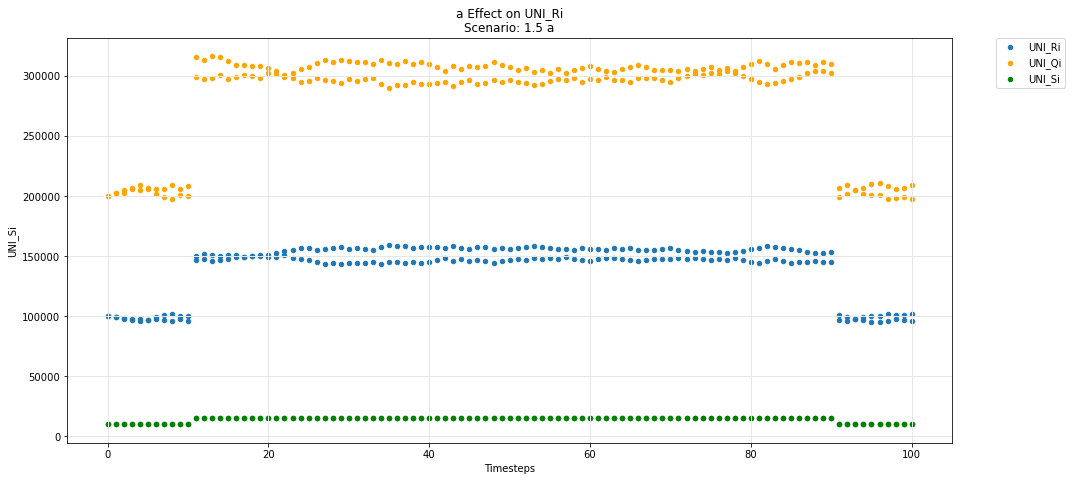

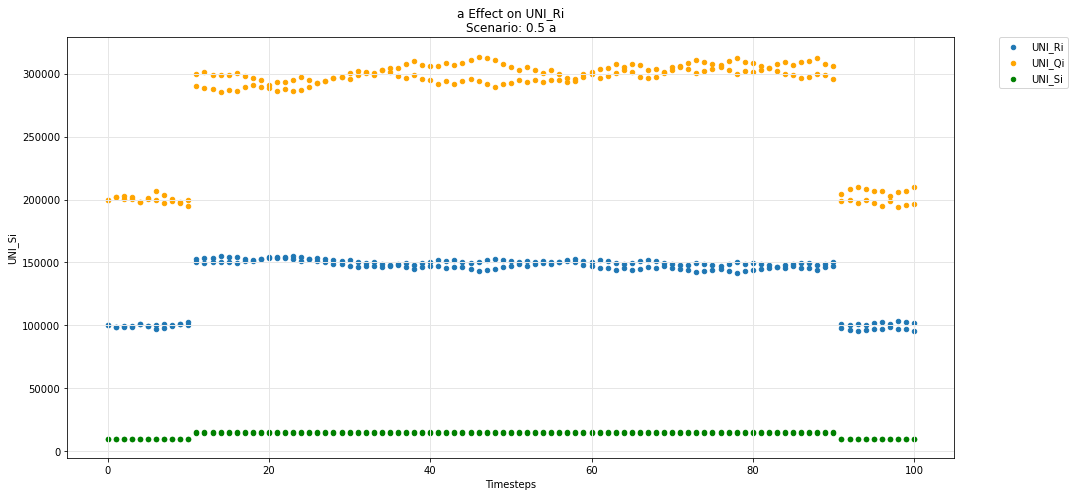

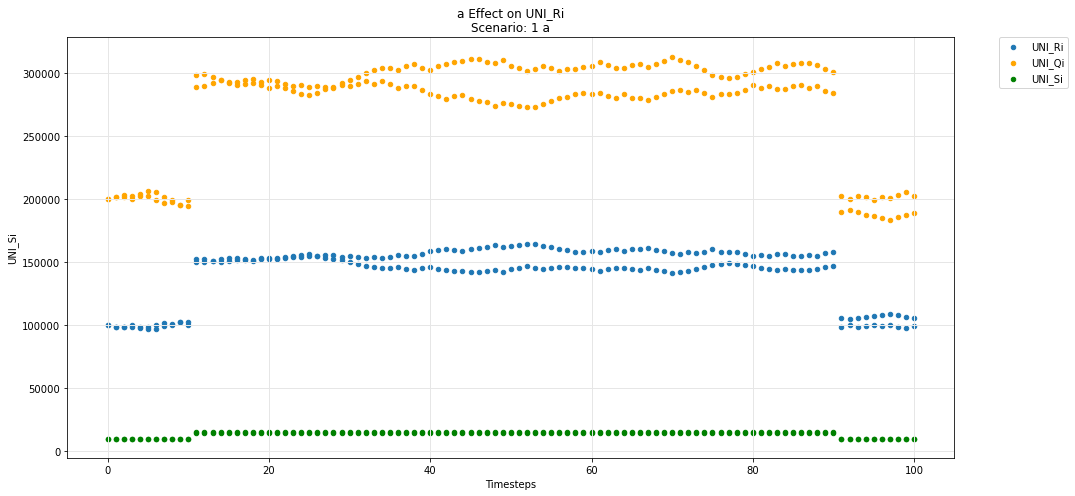

In [38]:
param_test_plot(experiments, config_ids, 'a', 'UNI_Ri', 'UNI_Qi', 'UNI_Si')

## Uniswap -- Rj-Q instance

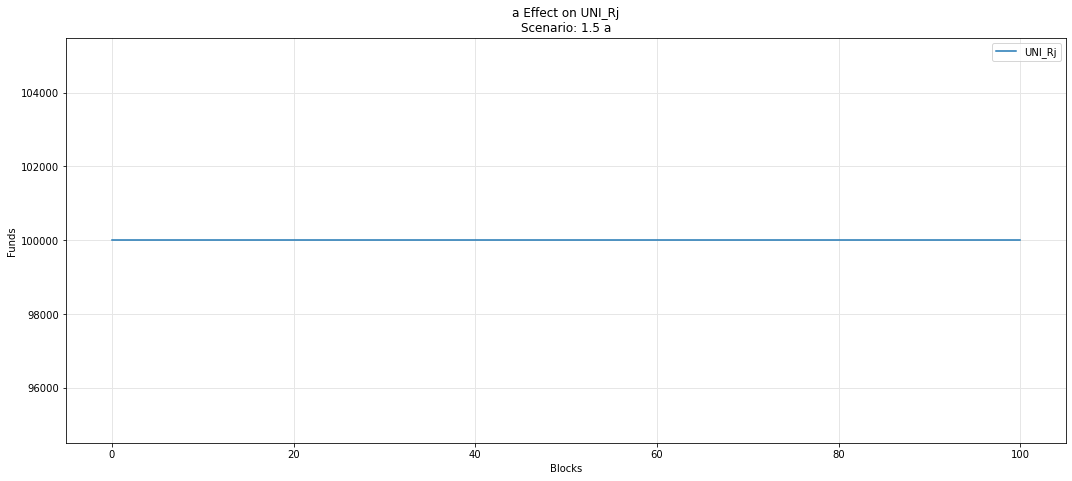

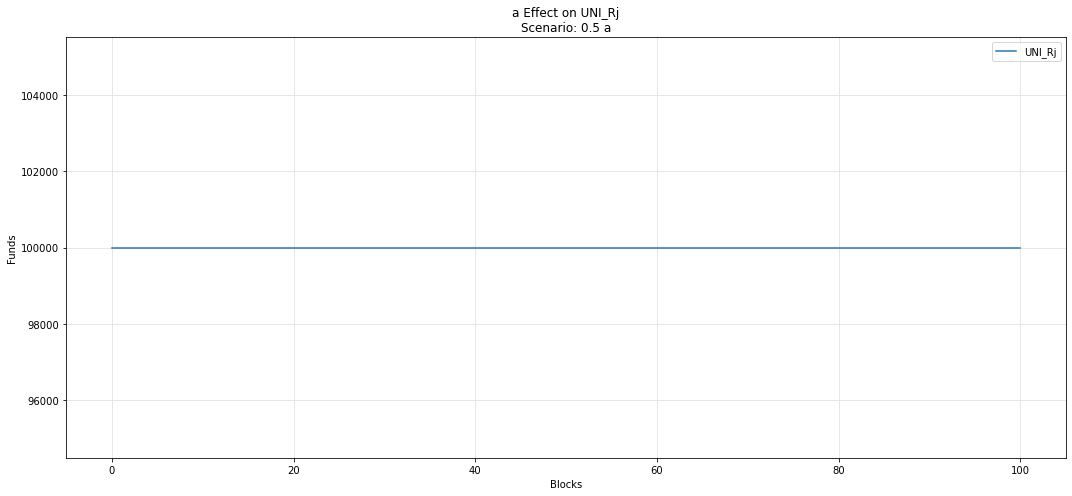

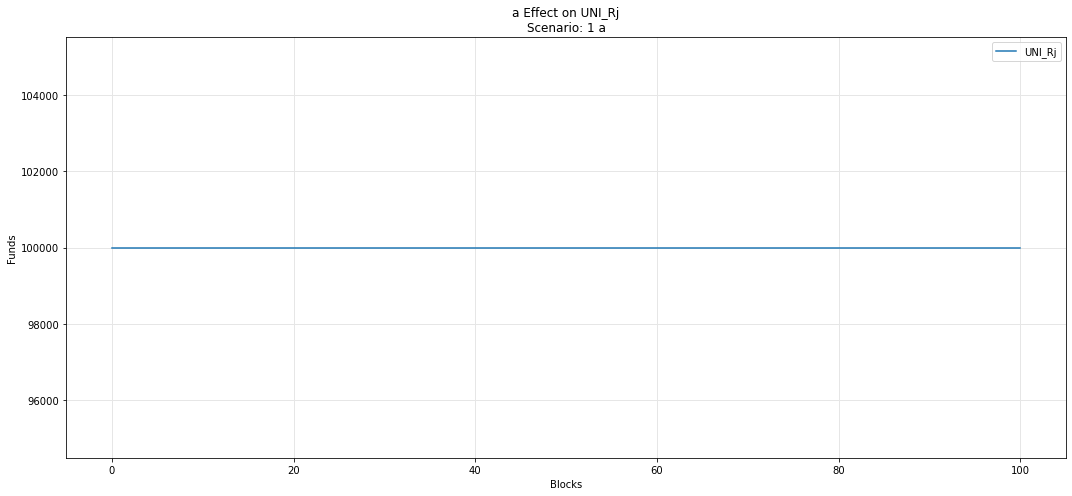

In [39]:
param_fan_plot3(experiments, config_ids, 'a','UNI_Rj')

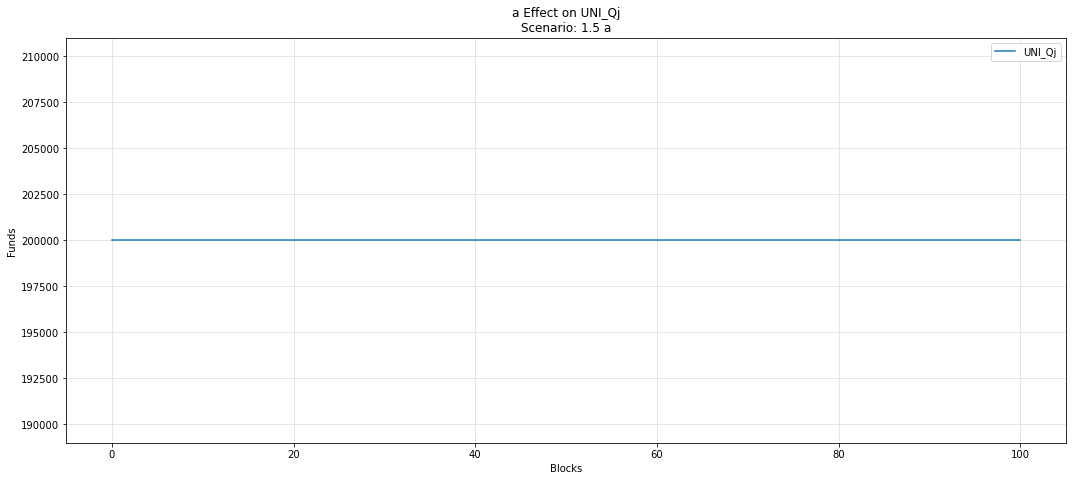

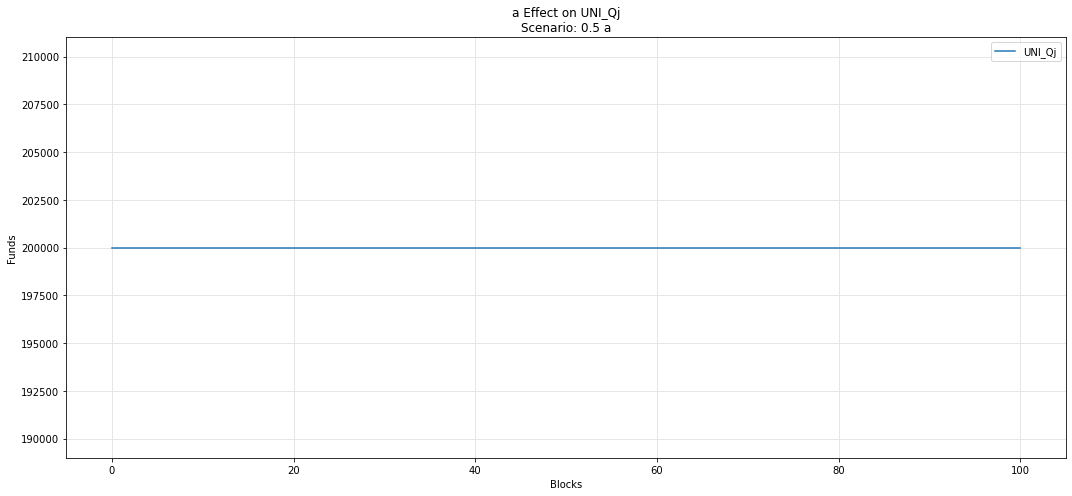

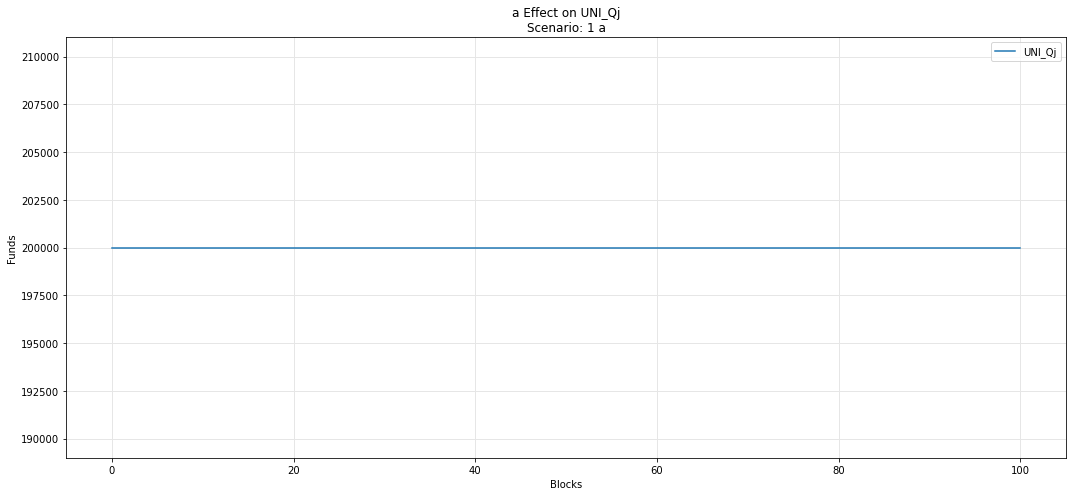

In [40]:
param_fan_plot3(experiments, config_ids, 'a','UNI_Qj')

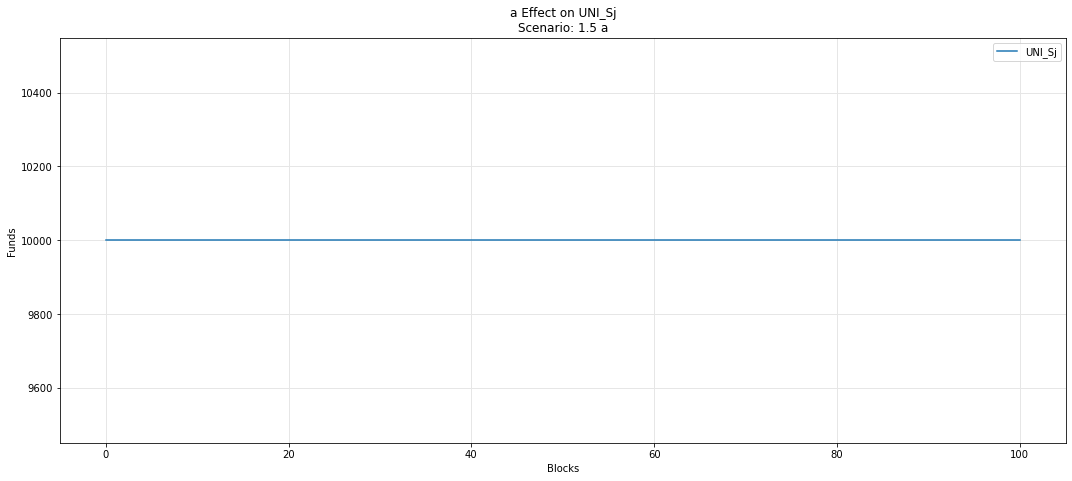

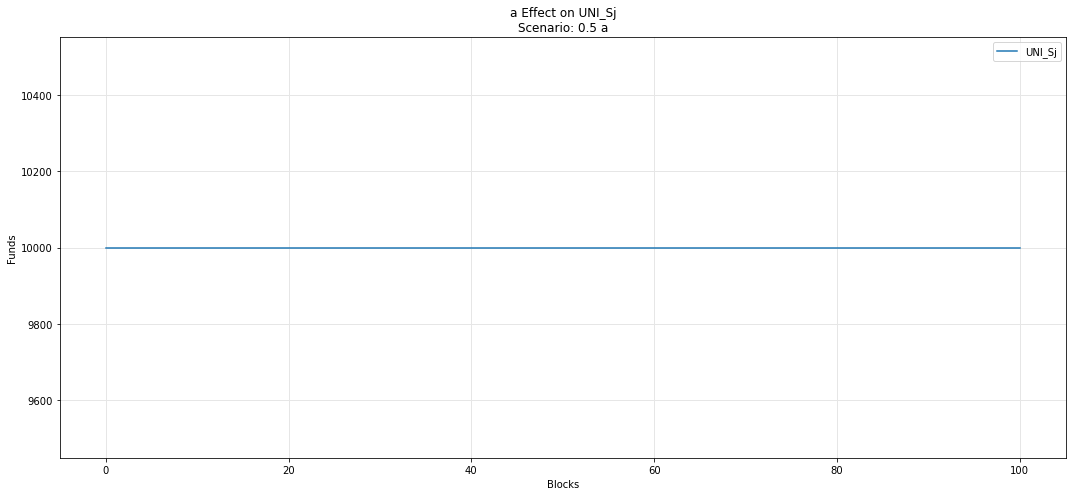

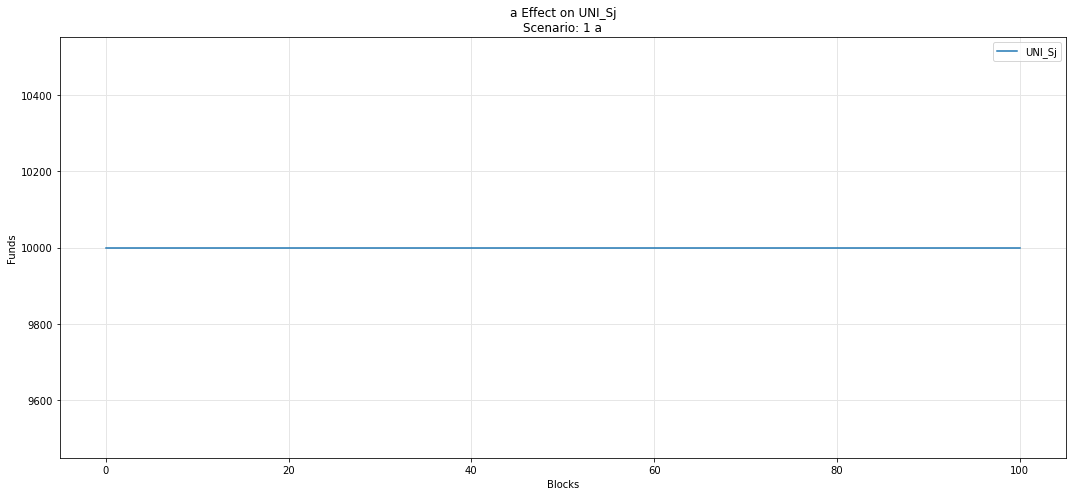

In [41]:
param_fan_plot3(experiments, config_ids, 'a','UNI_Sj')

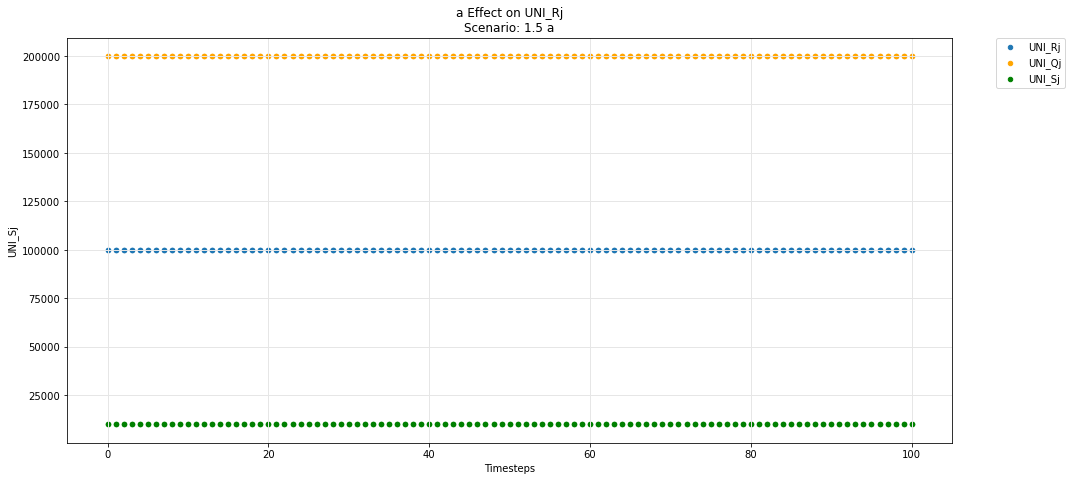

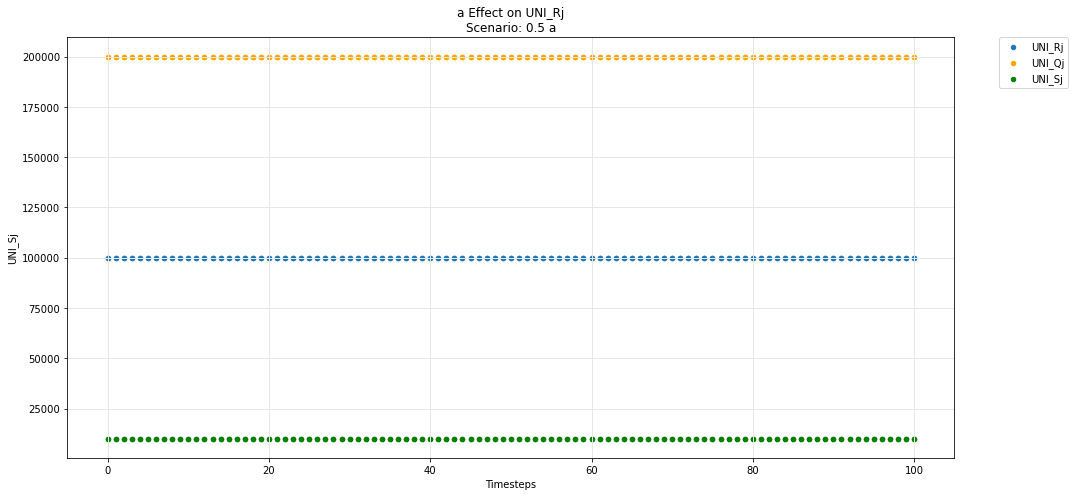

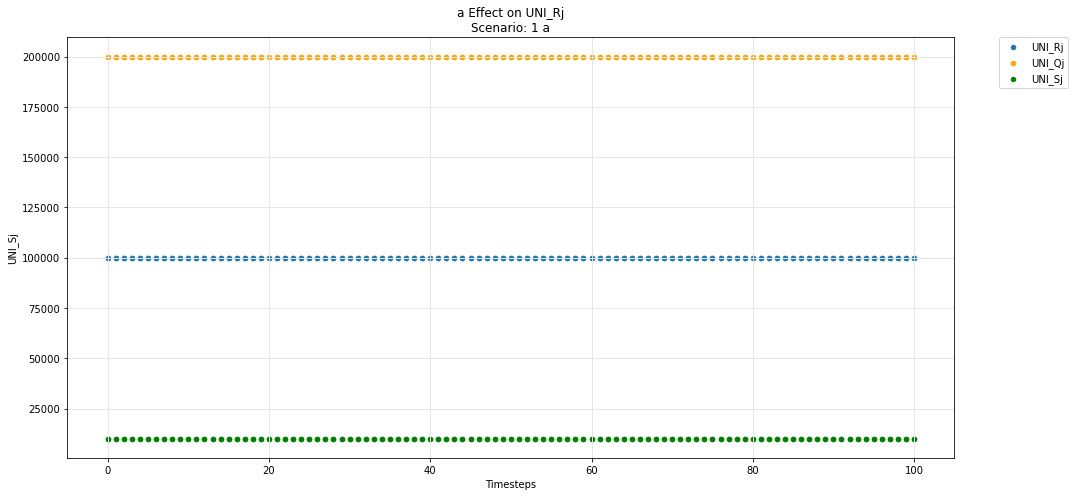

In [42]:
param_test_plot(experiments, config_ids, 'a', 'UNI_Rj', 'UNI_Qj', 'UNI_Sj')

## Uniswap -- ij-Q instance

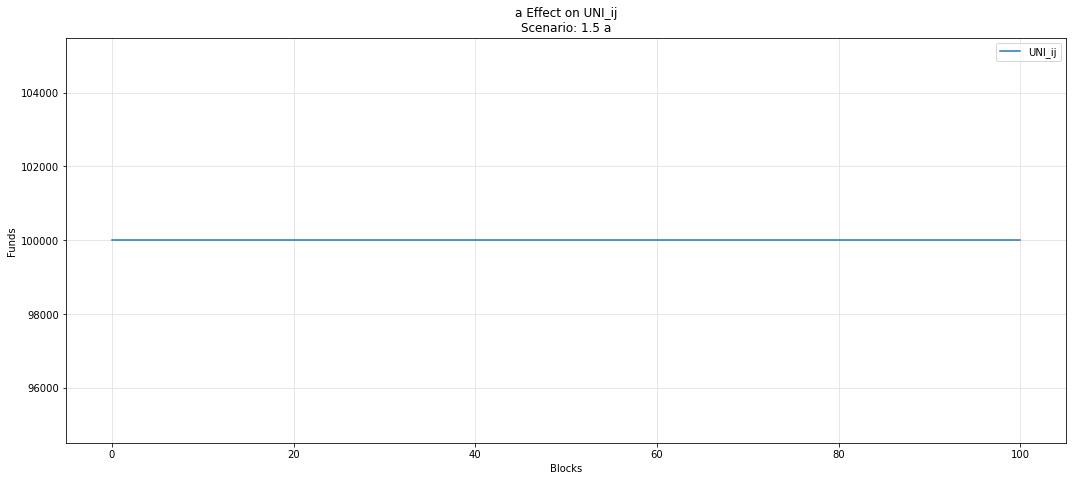

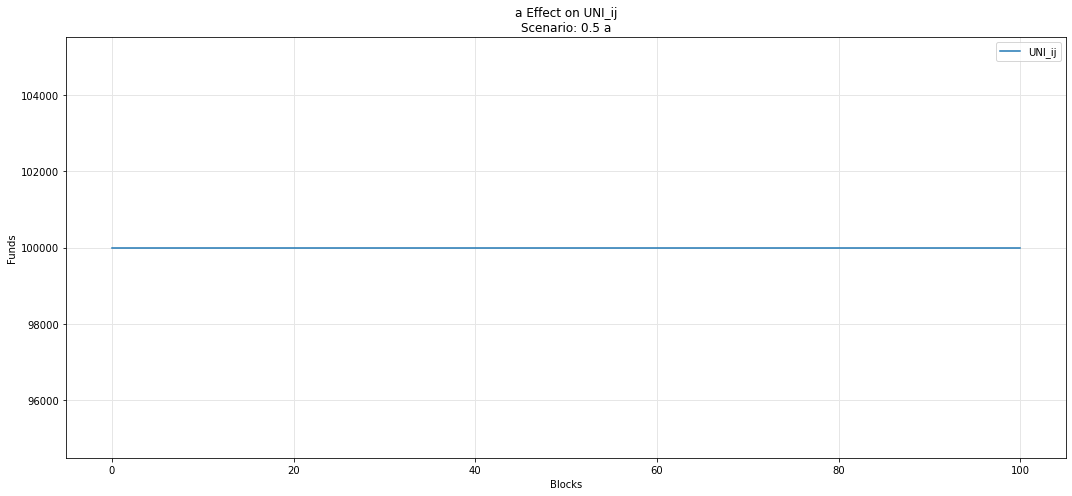

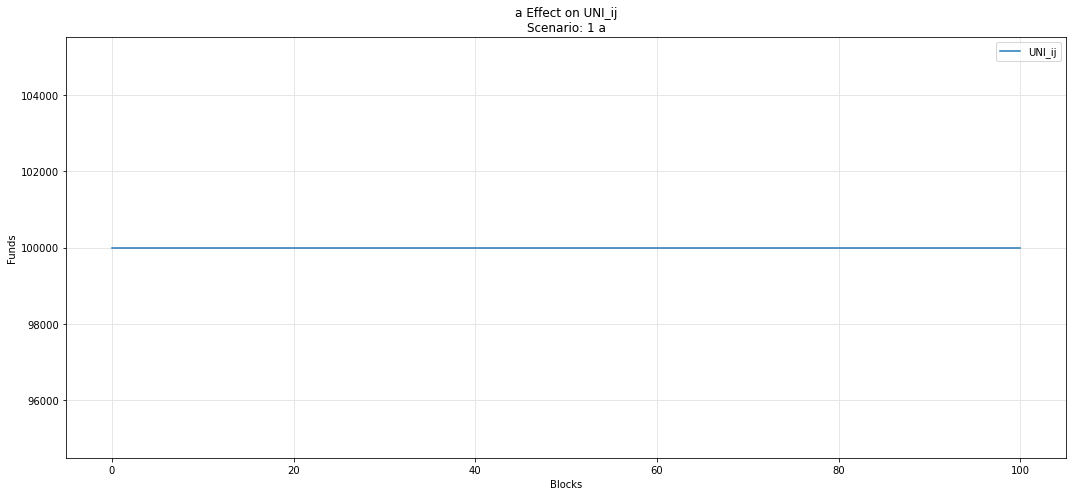

In [43]:
param_fan_plot3(experiments, config_ids, 'a','UNI_ij')

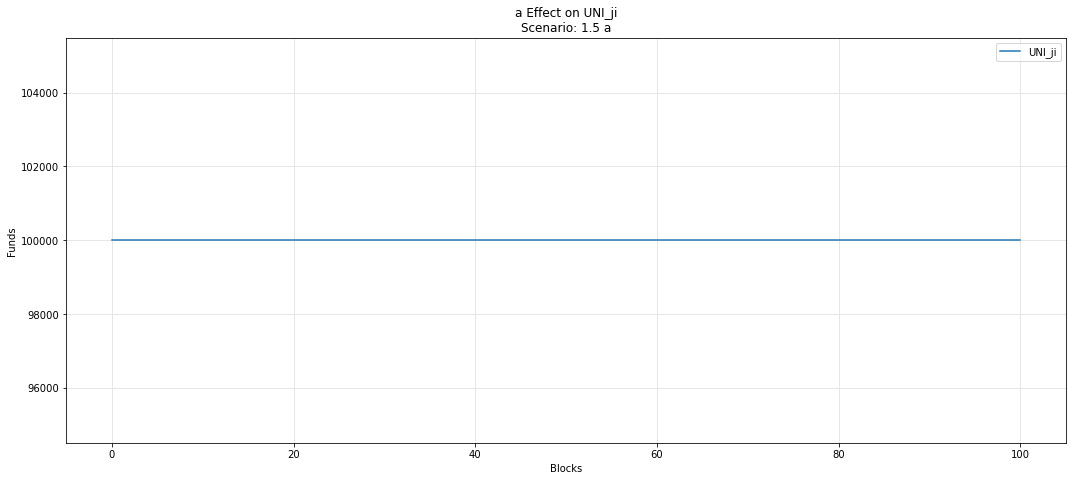

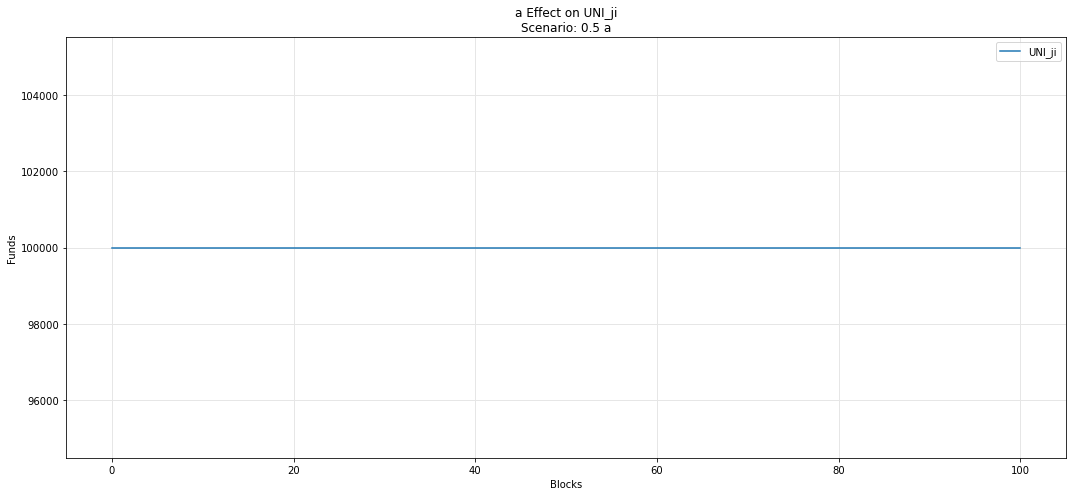

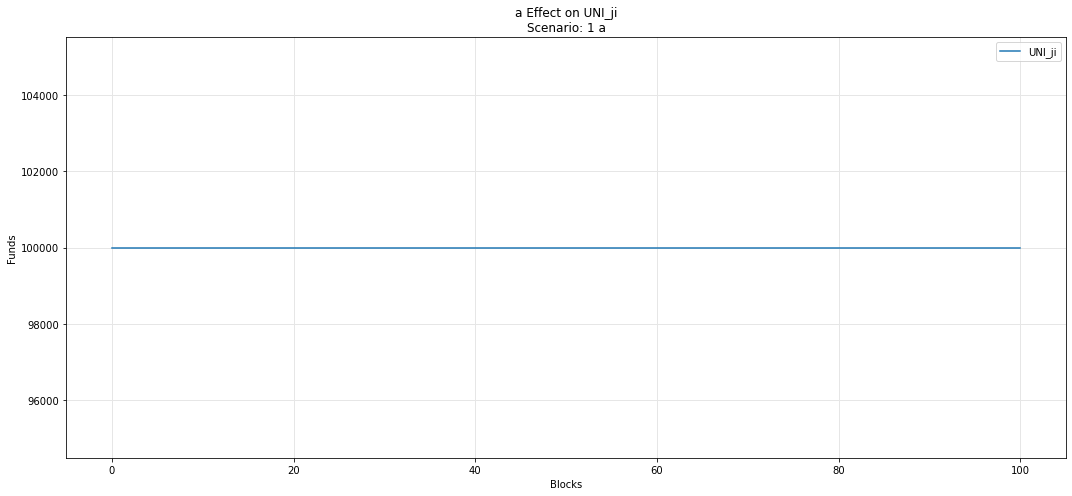

In [44]:
param_fan_plot3(experiments, config_ids, 'a','UNI_ji')

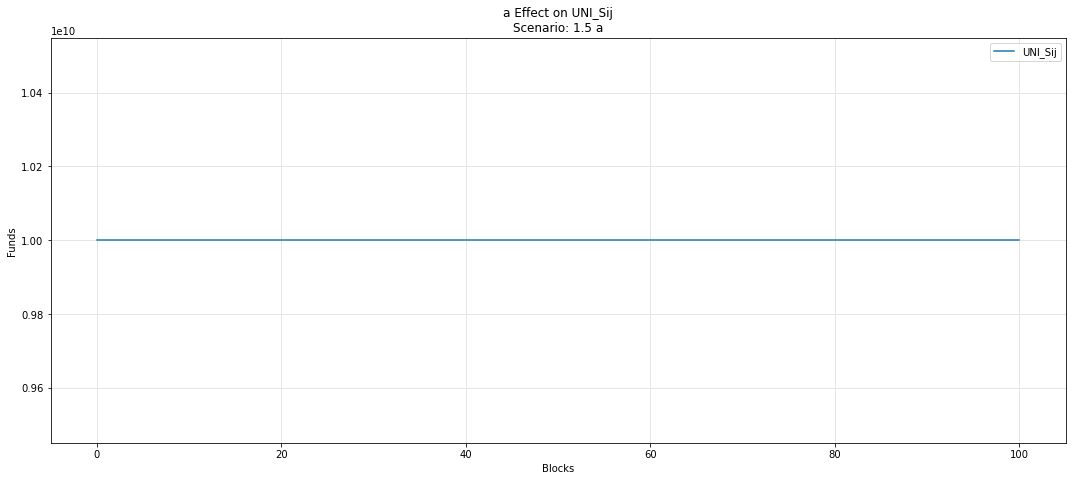

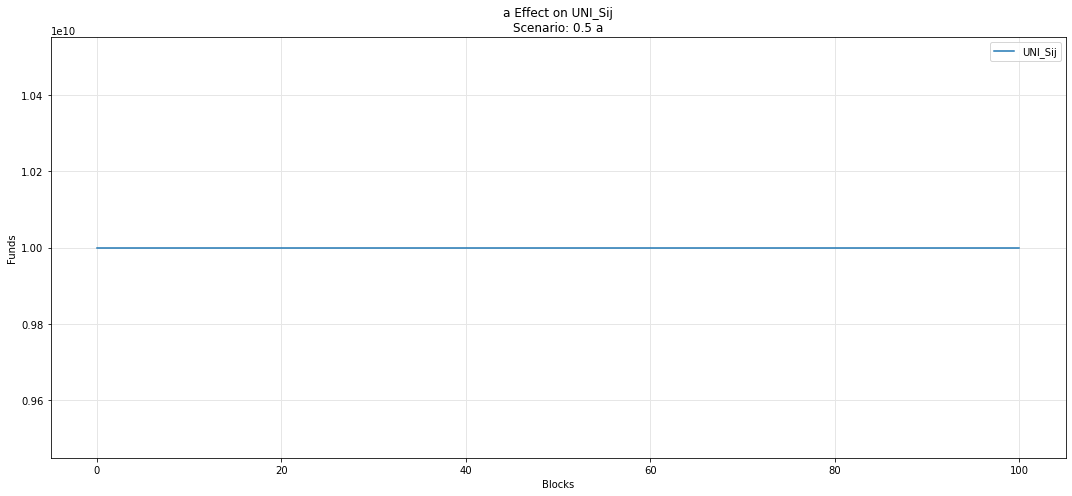

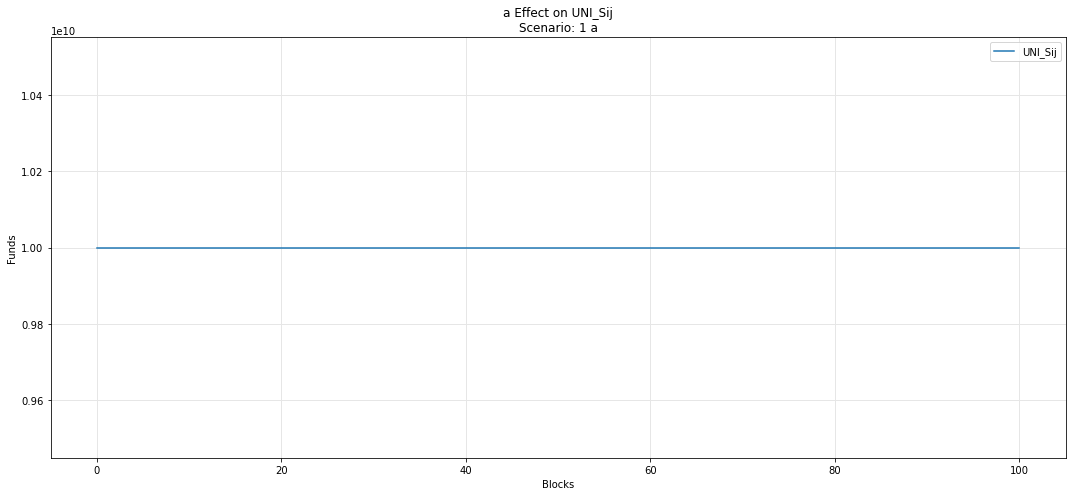

In [45]:
param_fan_plot3(experiments, config_ids, 'a','UNI_Sij')

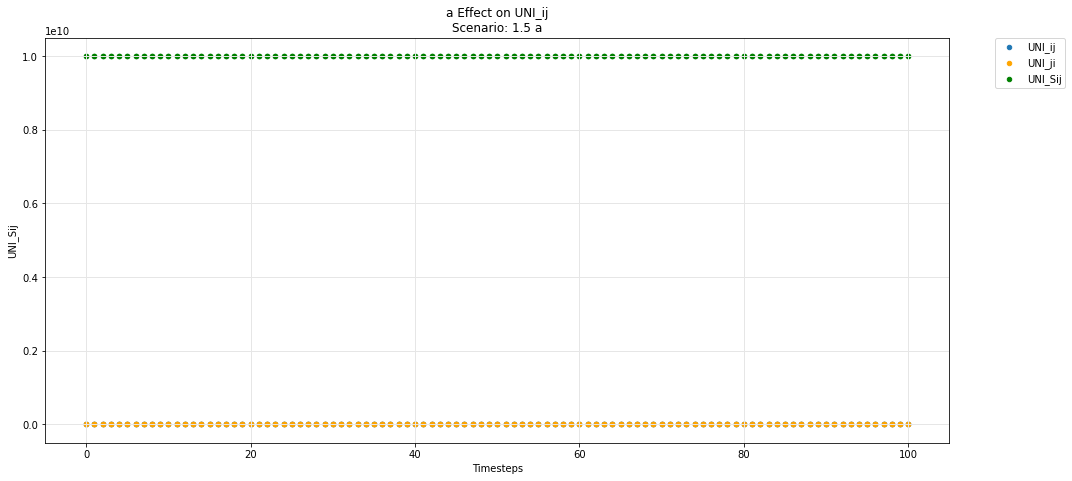

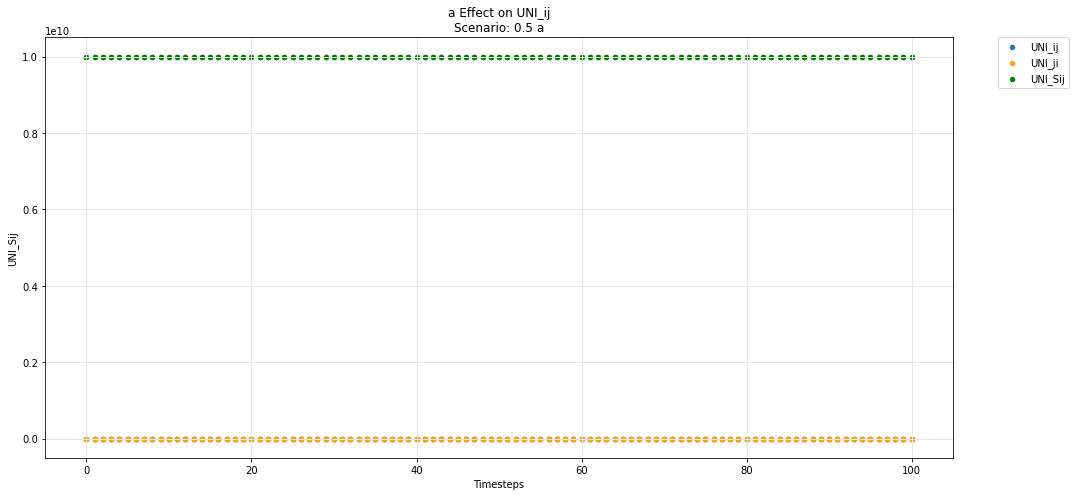

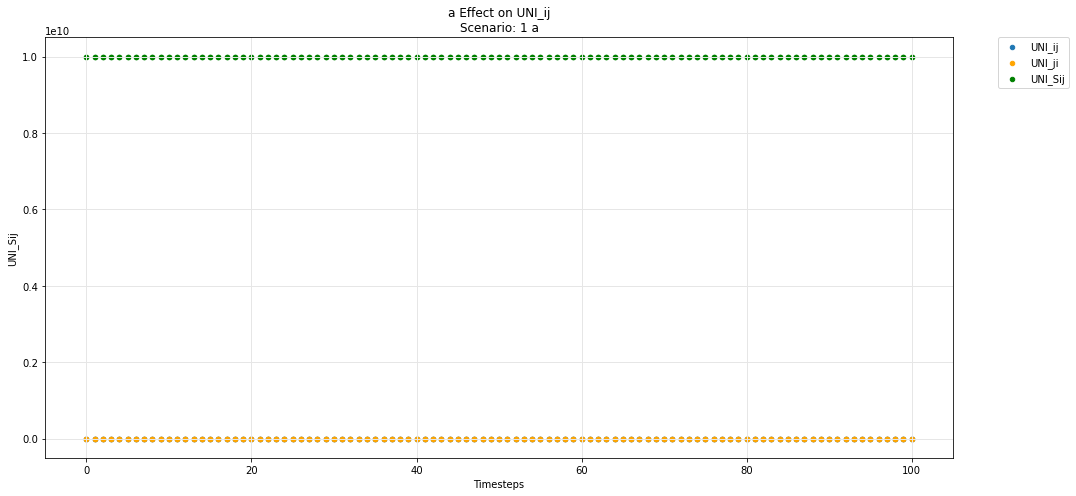

In [46]:
param_test_plot(experiments, config_ids, 'a', 'UNI_ij', 'UNI_ji', 'UNI_Sij')

## Hydra -- base

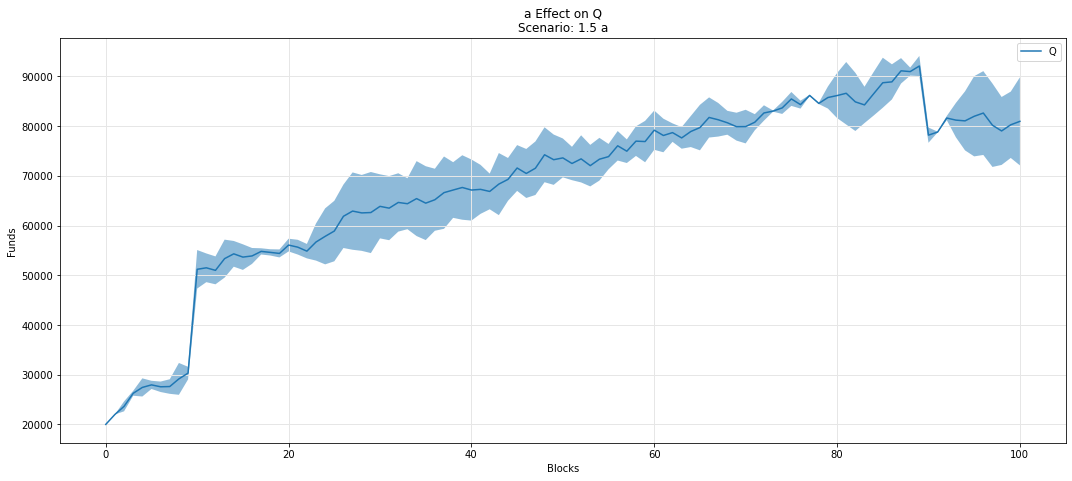

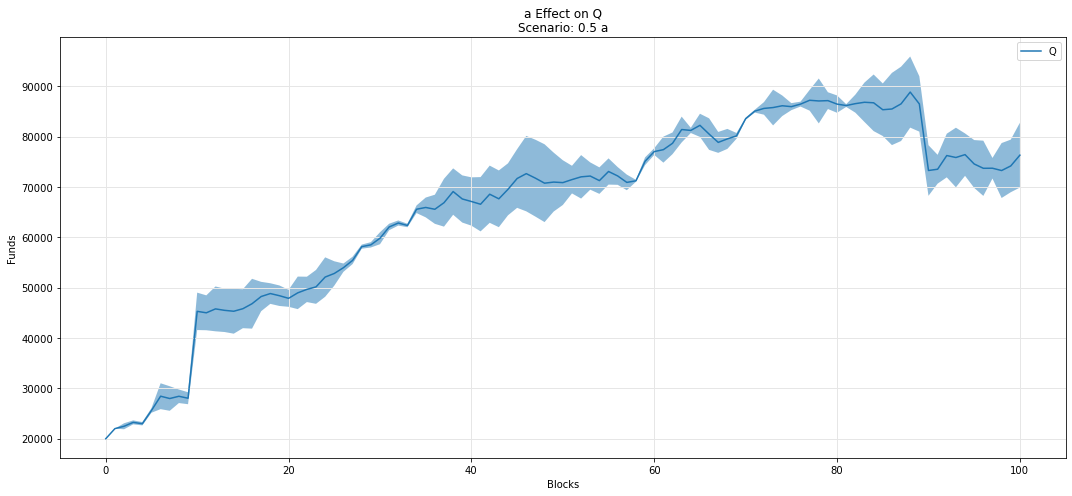

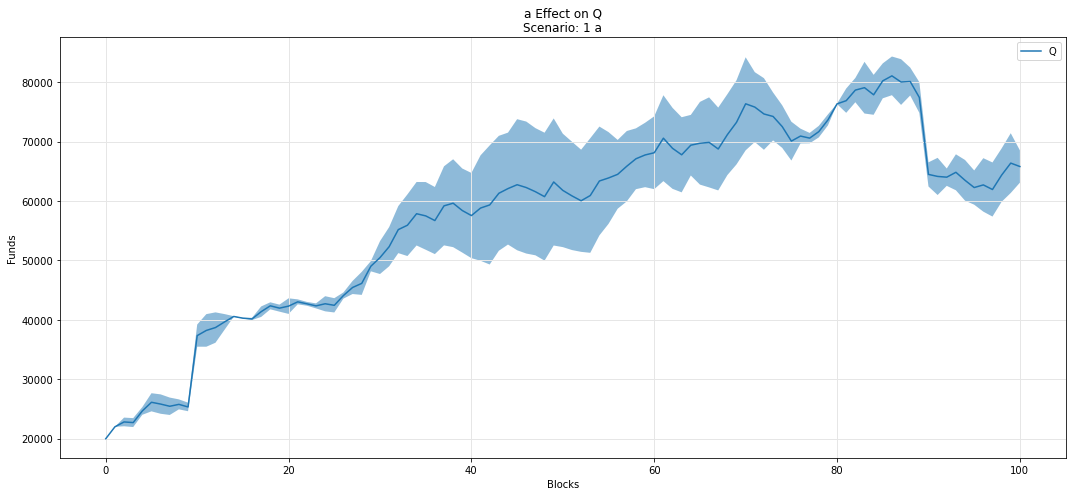

In [47]:
param_fan_plot3(experiments, config_ids, 'a','Q')

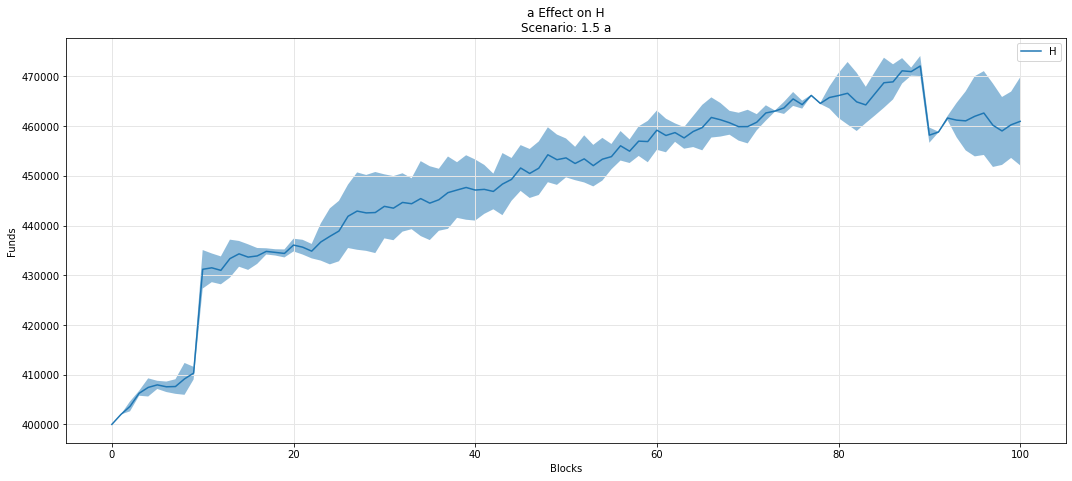

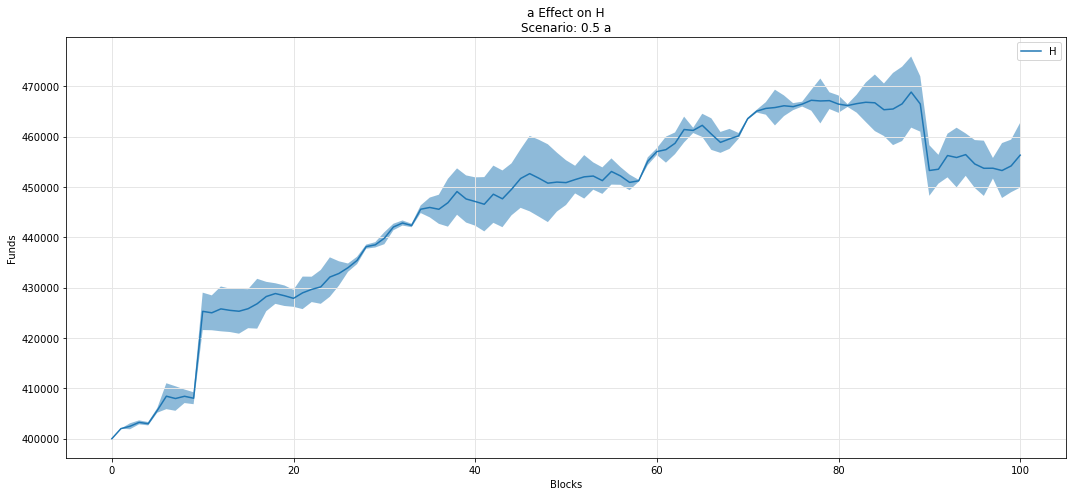

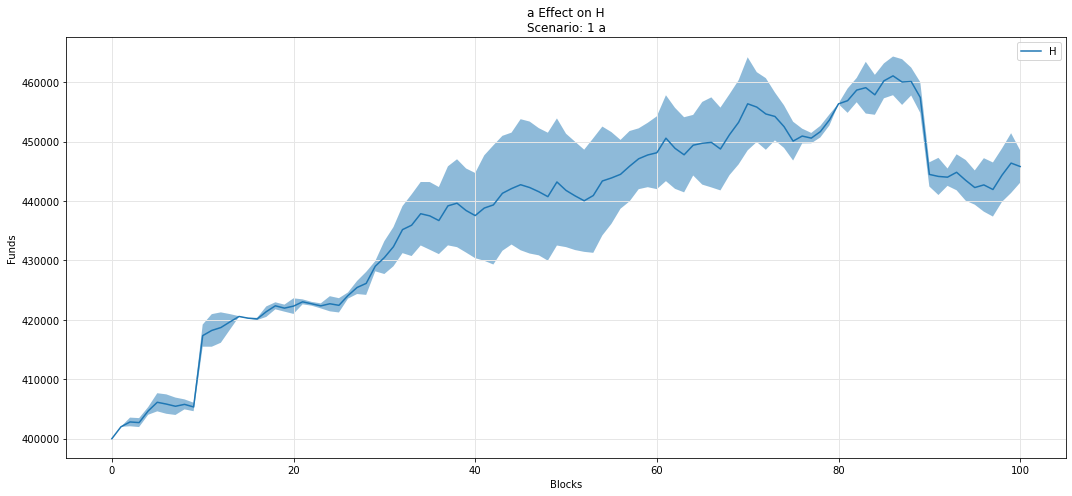

In [48]:
param_fan_plot3(experiments, config_ids, 'a','H')

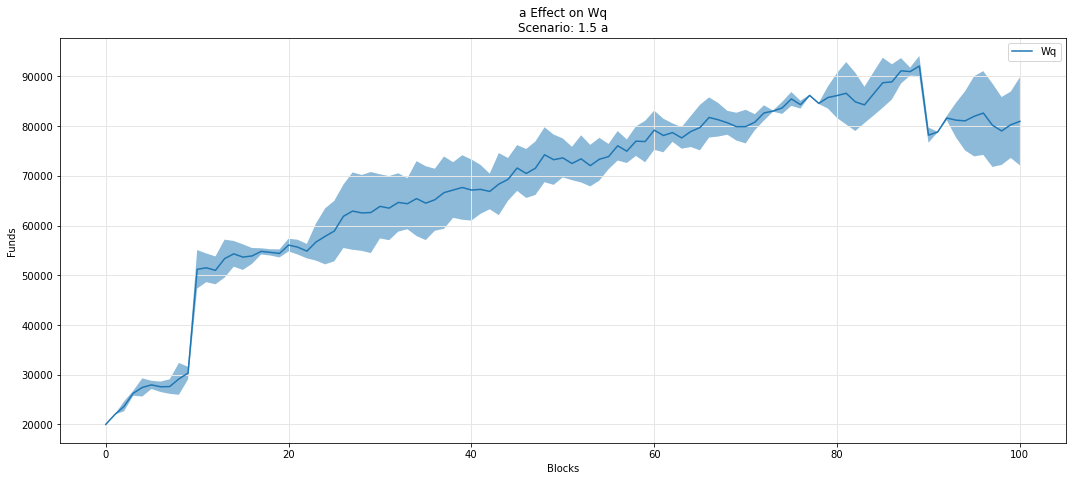

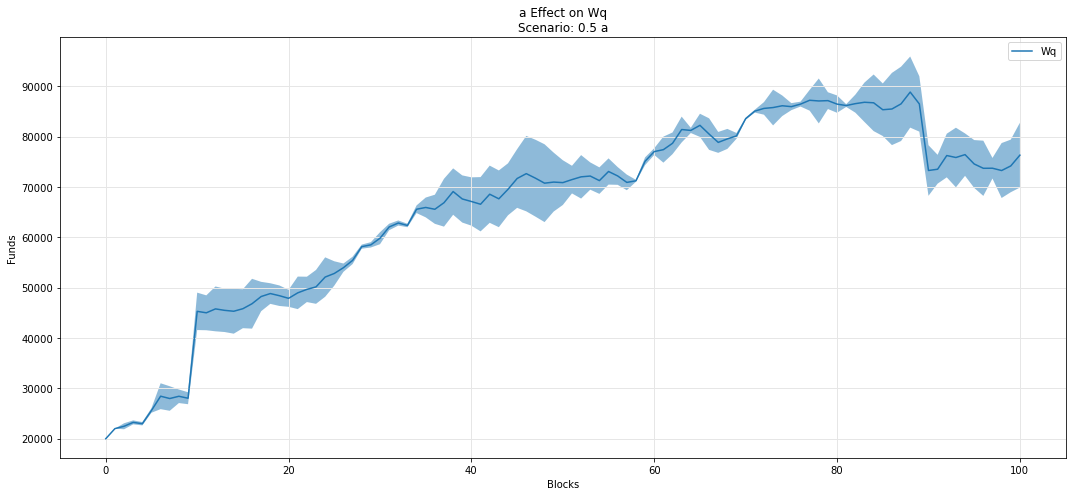

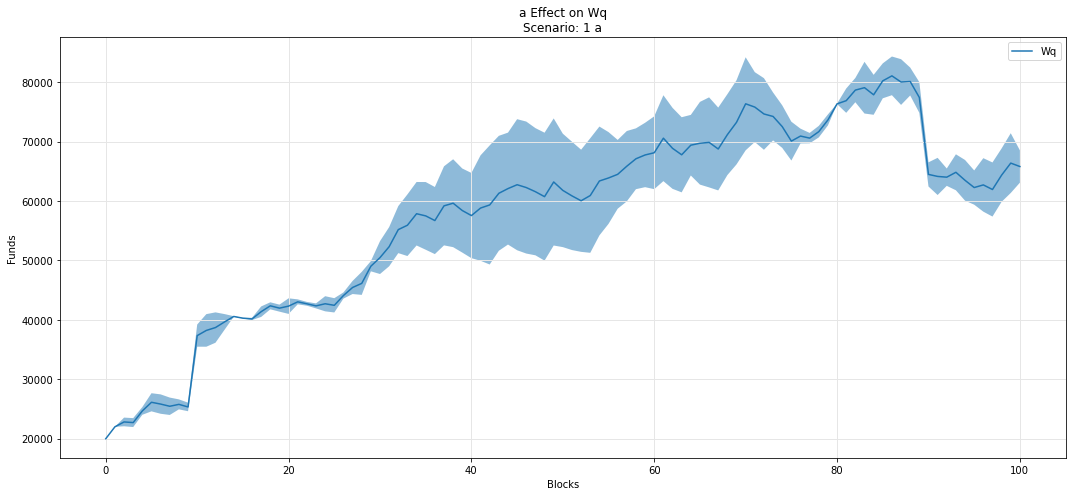

In [49]:
param_fan_plot3(experiments, config_ids, 'a','Wq')

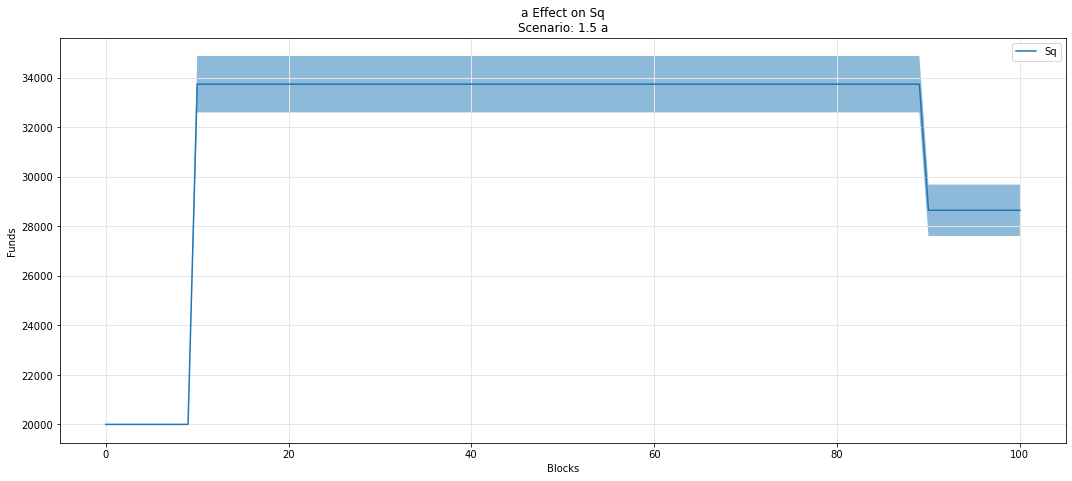

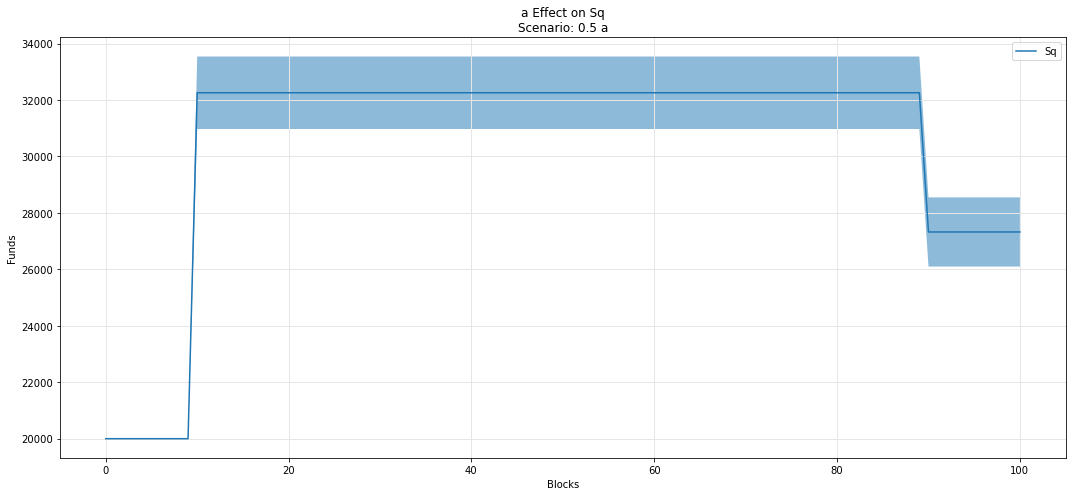

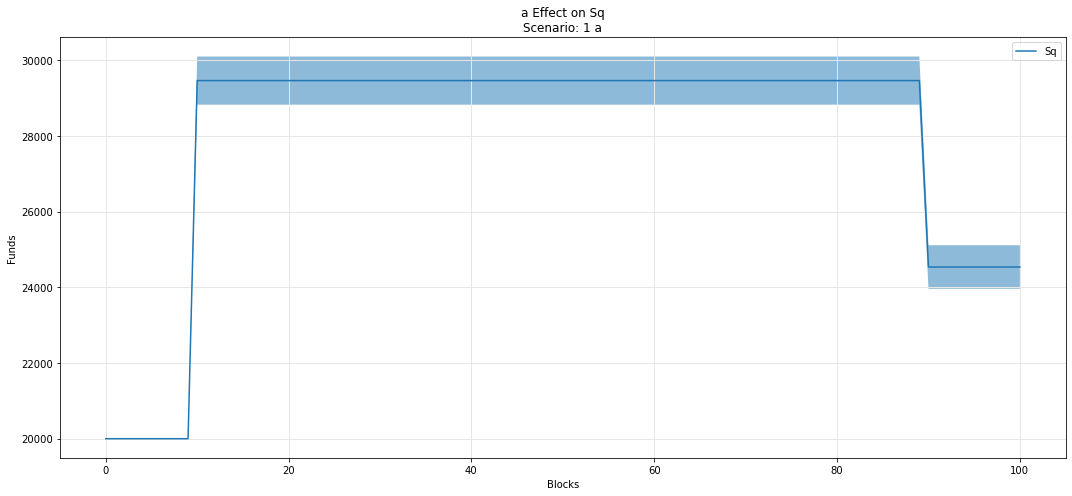

In [50]:
param_fan_plot3(experiments, config_ids, 'a','Sq')

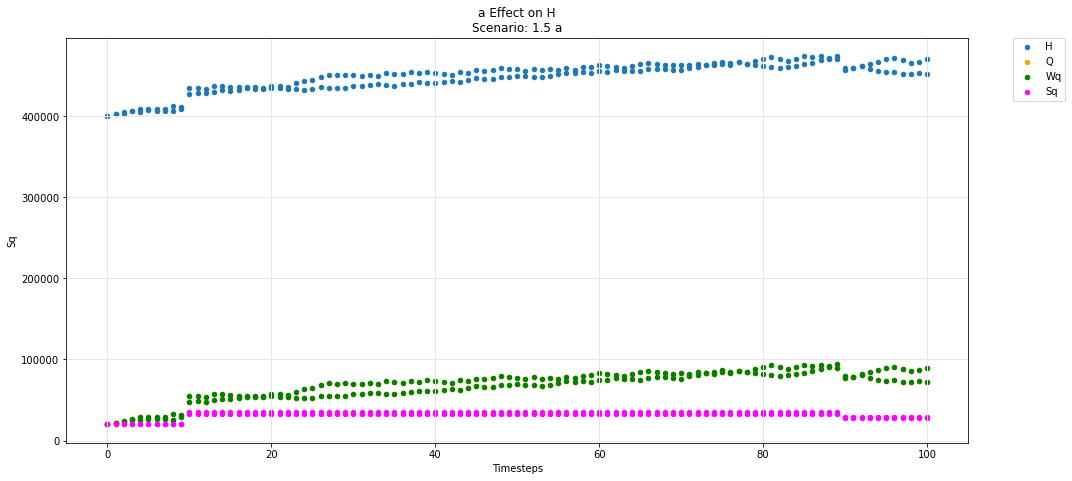

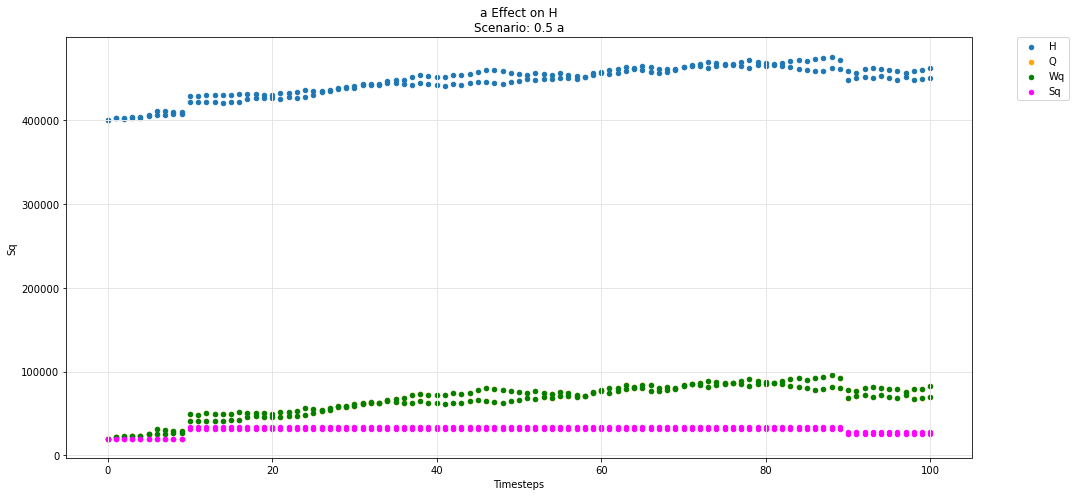

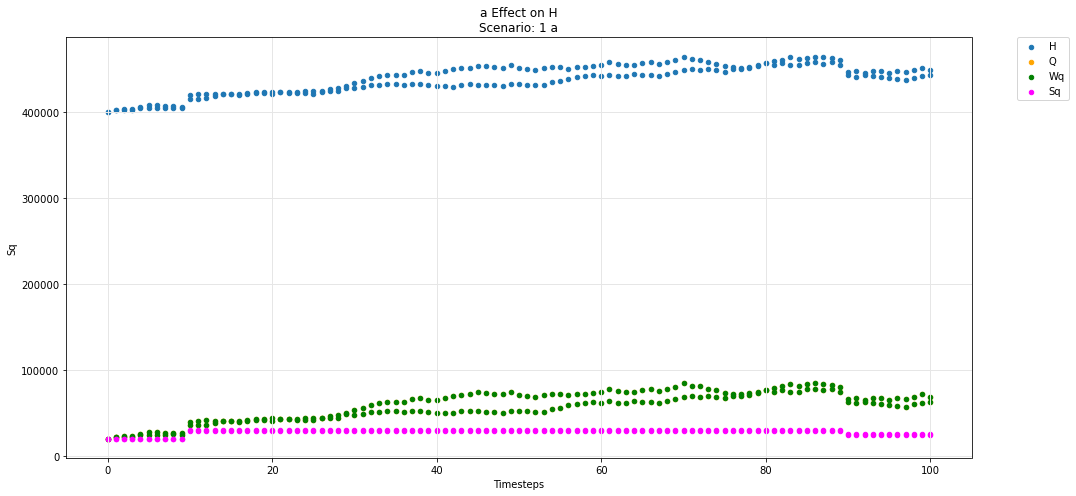

In [51]:
param_test_plot(experiments, config_ids, 'a', 'H', 'Q', 'Wq', 'Sq')

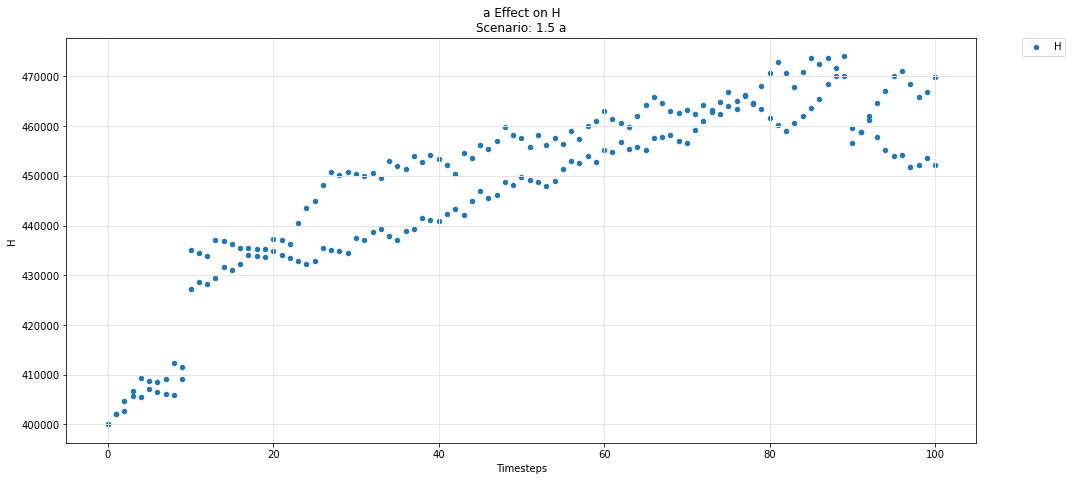

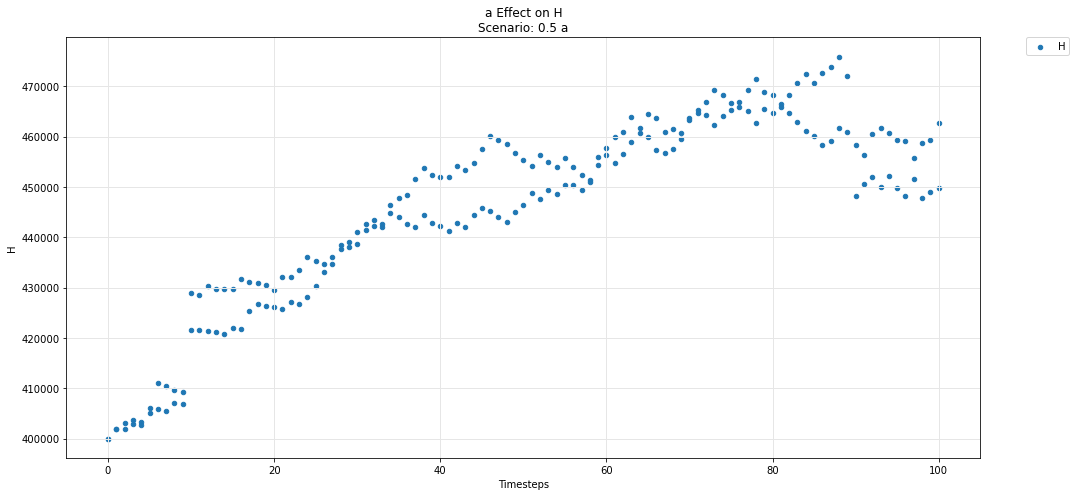

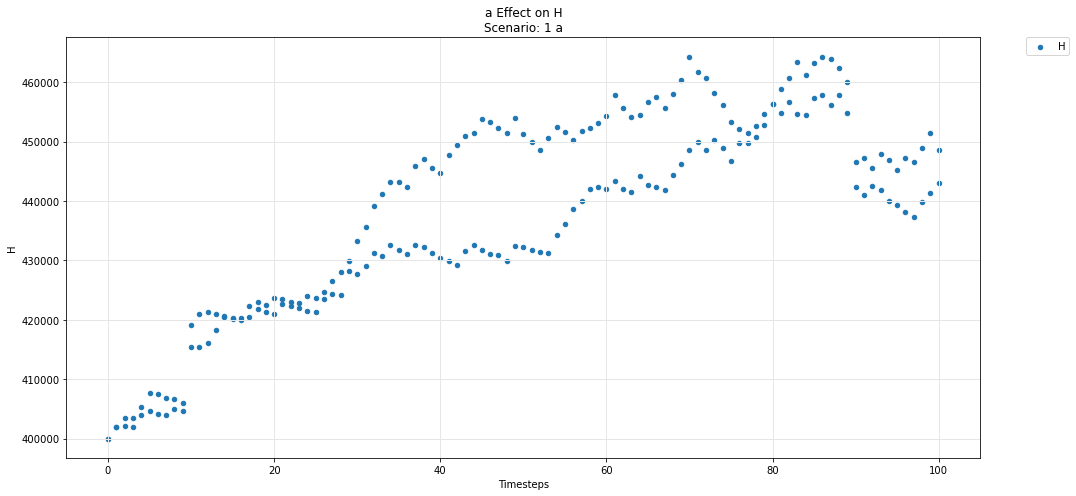

In [52]:
param_test_plot(experiments, config_ids, 'a', 'H')

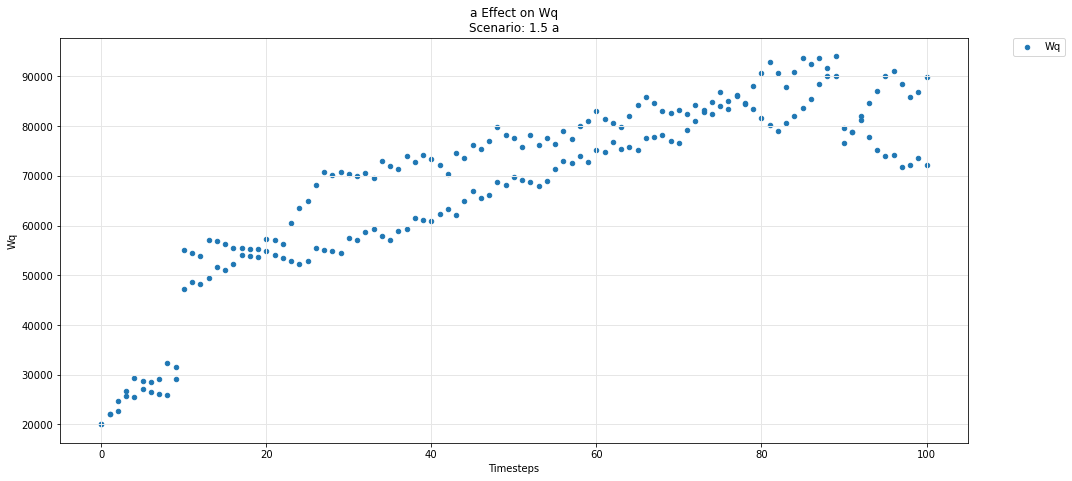

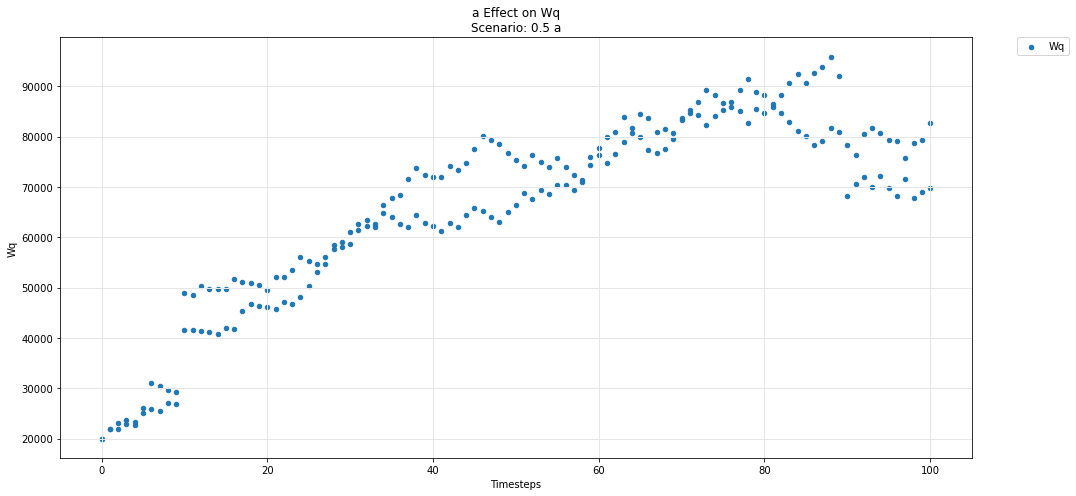

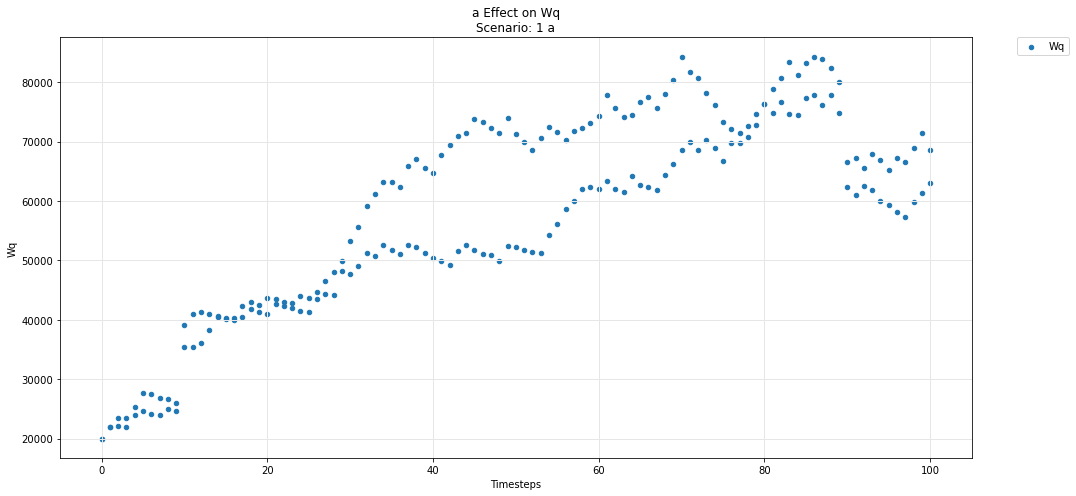

In [53]:
param_test_plot(experiments, config_ids, 'a', 'Wq')

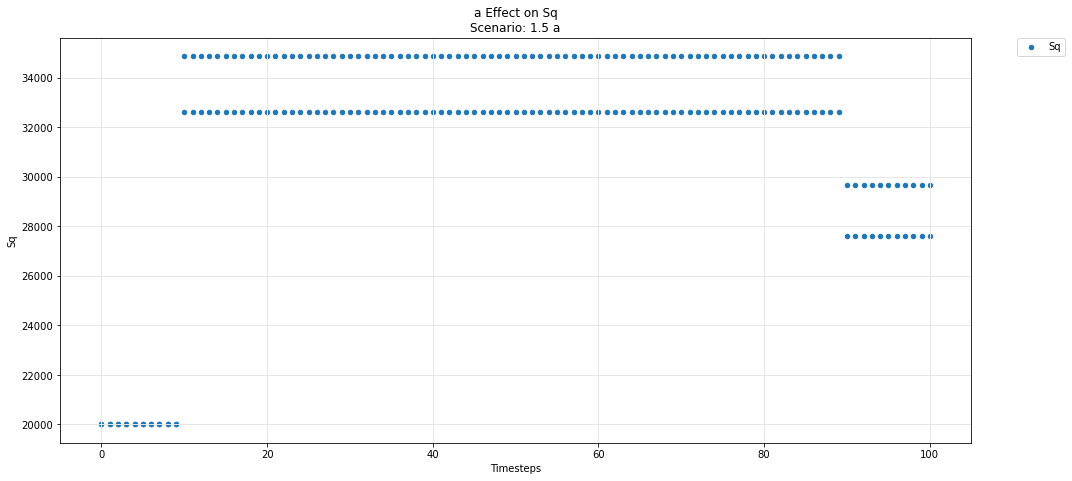

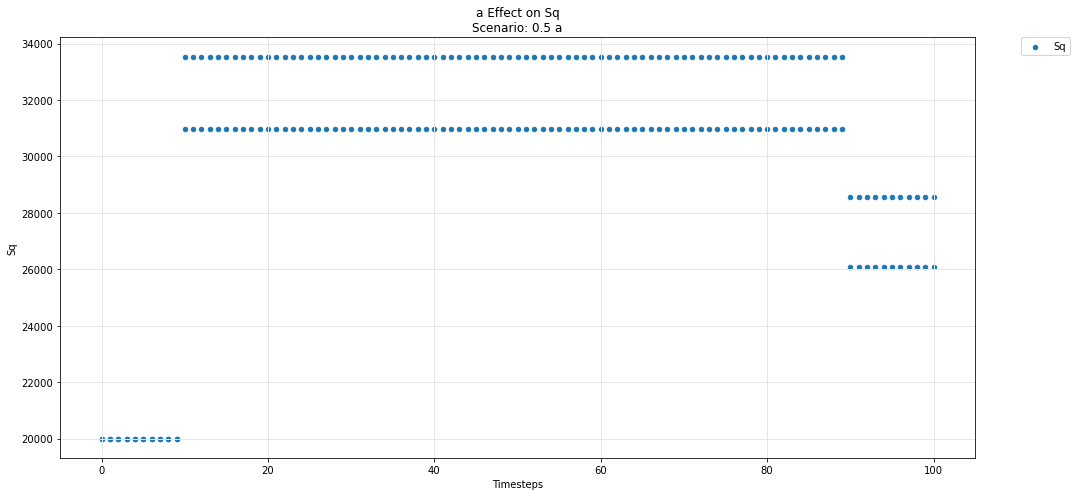

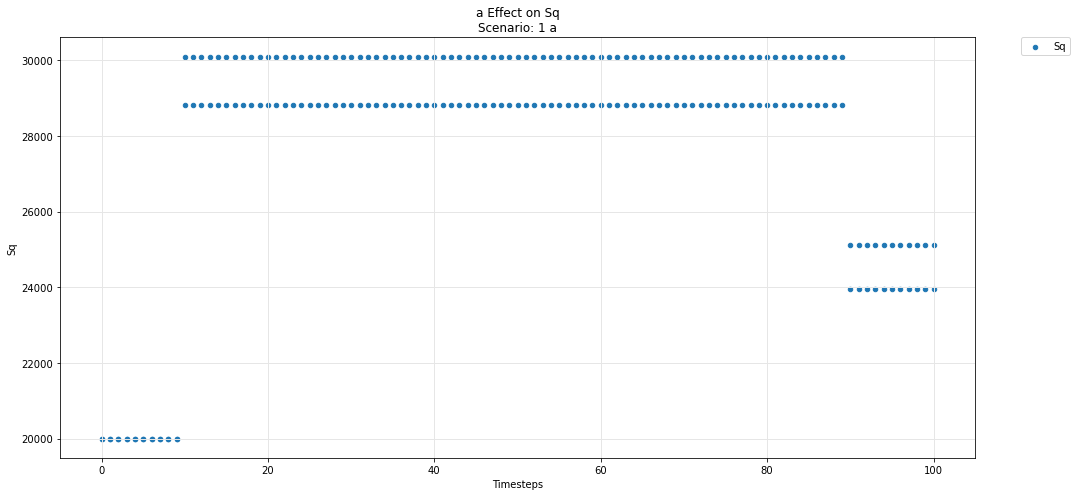

In [54]:
param_test_plot(experiments, config_ids, 'a', 'Sq')

## Hydra -- pool

Movement of the Omnipool variables
- Asset i
- Asset j
- Asset k

over the course of the simulation

In [55]:
def param_pool_simulation_plot(experiments, config_ids, swept_variable, asset_id, y_variable, *args):
    """
    experiments is the simulation result dataframe.
    config_ids is the list configs executed upon in the simulation.
    swept_variable is the key (string) in config_ids that was being tested against.
    asset_id is the asset identifier in the pool (string) e.g i,j,k 
    y_variable is the state_variable (string) to be plotted against default timestep.

    *args for plotting more state_variables (string).
    """
    experiments = experiments.sort_values(by =['subset']).reset_index(drop=True)
    cols = 1
    rows = 1
    cc_idx = 0
    while cc_idx<len(experiments):
        cc = experiments.iloc[cc_idx]['subset']

        cc_label = experiments.iloc[cc_idx]['subset']

        secondary_label = [item['M'][swept_variable] for item in config_ids if  item["subset_id"]== cc_label]
        sub_experiments = experiments[experiments['subset']==cc]
        cc_idx += len(sub_experiments)
        fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))

        df = sub_experiments.copy()

        df_label = y_variable + asset_id
        df[df_label] = df.pool.apply(lambda x: np.array(x.pool[asset_id][y_variable]))
        colors = ['orange', 'g', 'magenta', 'r', 'k' ]
        df = df.groupby('timestep').agg({df_label: ['min', 'mean', 'max']}).reset_index()
        ax = axs
        title = swept_variable + ' Effect on Pool Asset ' + asset_id + '\n' + 'Scenario: ' + str(secondary_label[0]) + ' ' + swept_variable
        # + 'Scenario: ' + str(cc_label)  + ' rules_price'
        ax.set_title(title)
        ax.set_ylabel('Funds')

        df.plot(x='timestep', y=(df_label,'mean'), label=df_label, ax=ax, legend=True, kind ='scatter')
        ax.fill_between(df.timestep, df[(df_label,'min')], df[(df_label,'max')], alpha=0.3)    
        for count, arg in enumerate(args):
            df = sub_experiments.copy()
            
            df_arg_label = arg + asset_id
            df[df_arg_label] = df.pool.apply(lambda x: np.array(x.pool[asset_id][arg]))
            df = df.groupby('timestep').agg({df_arg_label: ['min', 'mean', 'max']}).reset_index()

            df.plot(x='timestep', y=(df_arg_label,'mean'), label=df_arg_label, ax=ax, legend=True, color = colors[count], kind ='scatter')
            ax.fill_between(df.timestep, df[(df_arg_label,'min')], df[(df_arg_label,'max')], alpha=0.3)    

        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
            
    fig.tight_layout(rect=[0, 0, 1, .97])
    fig.patch.set_alpha(1)
    plt.close()
    return display(fig)

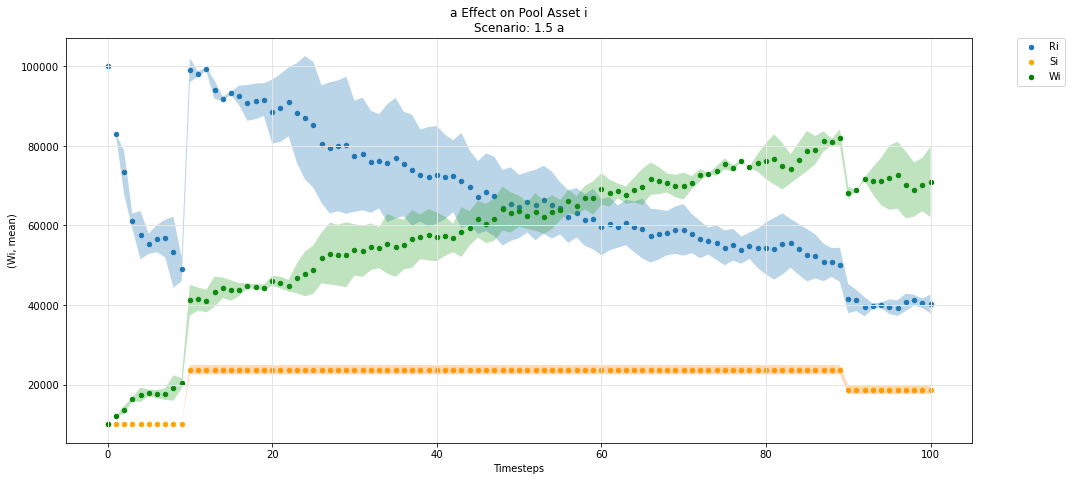

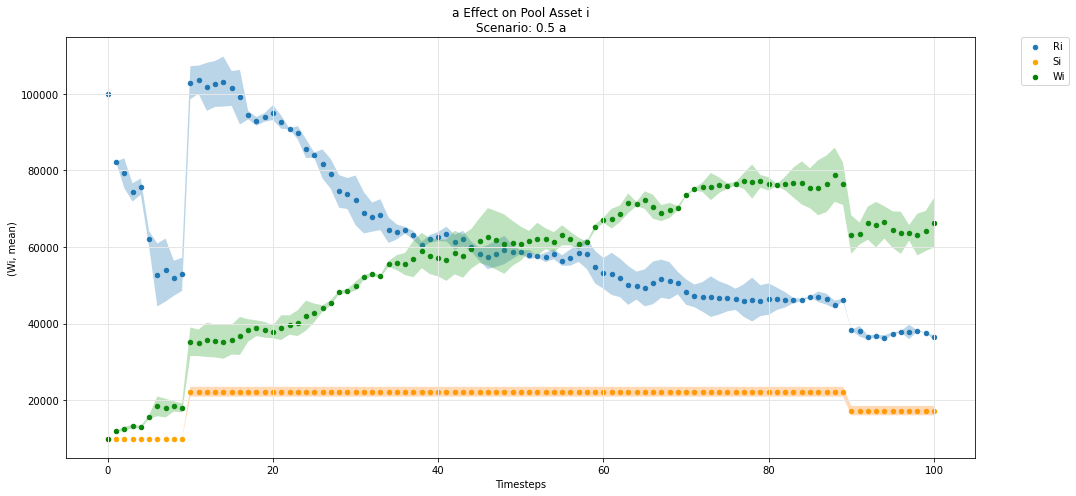

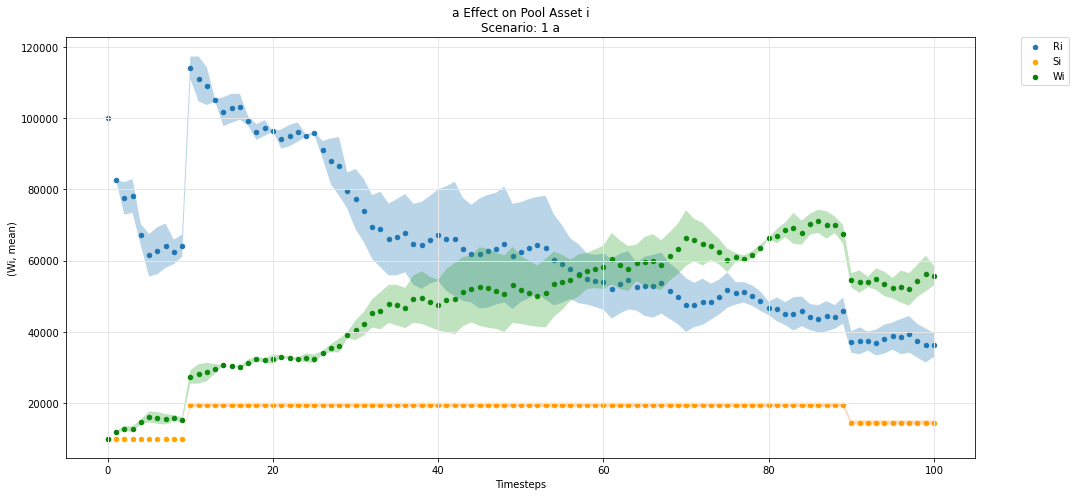

In [56]:
param_pool_simulation_plot(experiments, config_ids, 'a','i', 'R', 'S', 'W')

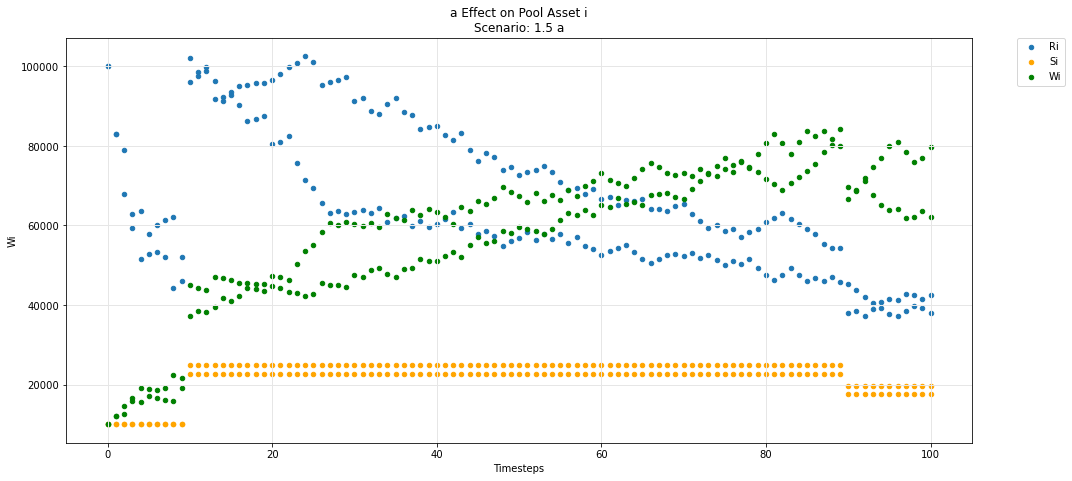

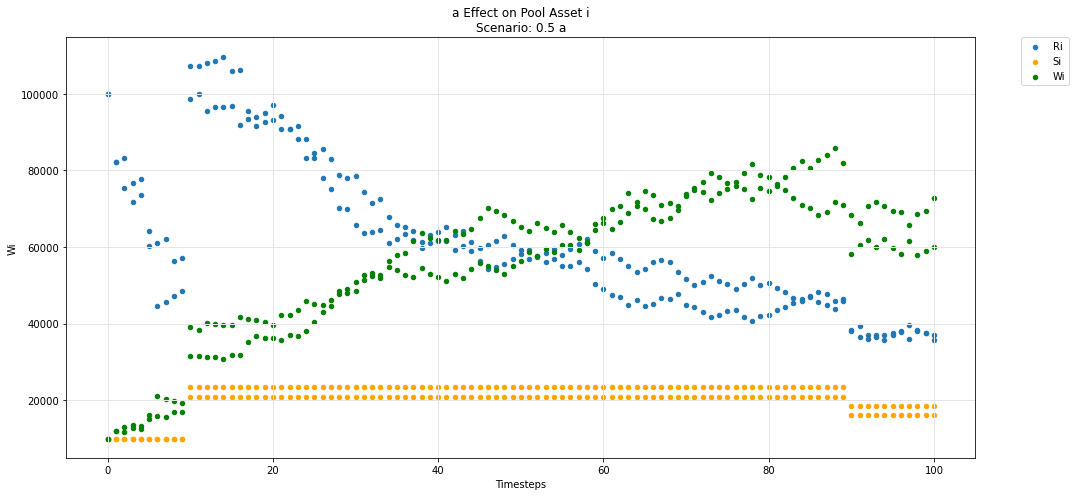

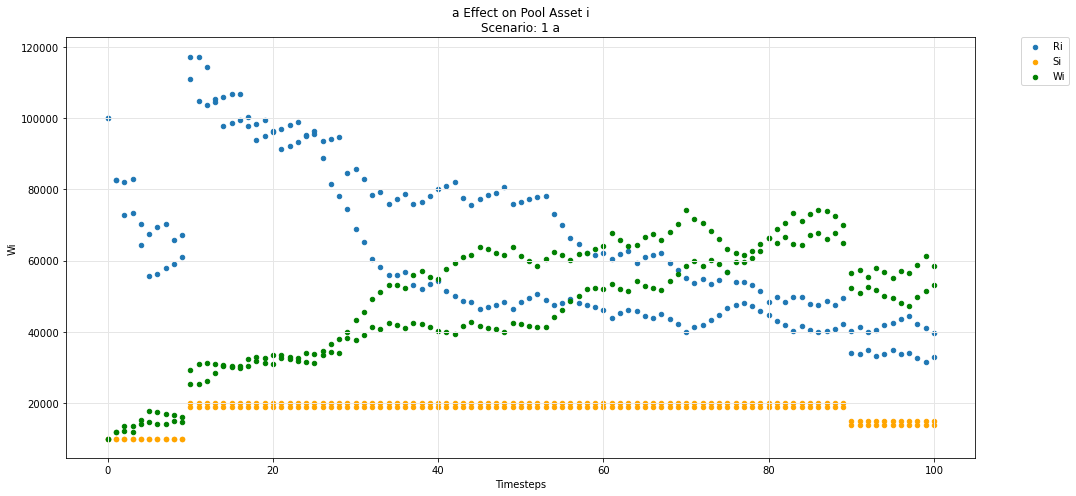

In [57]:
param_pool_plot(experiments, config_ids, 'a','i', 'R', 'S', 'W')

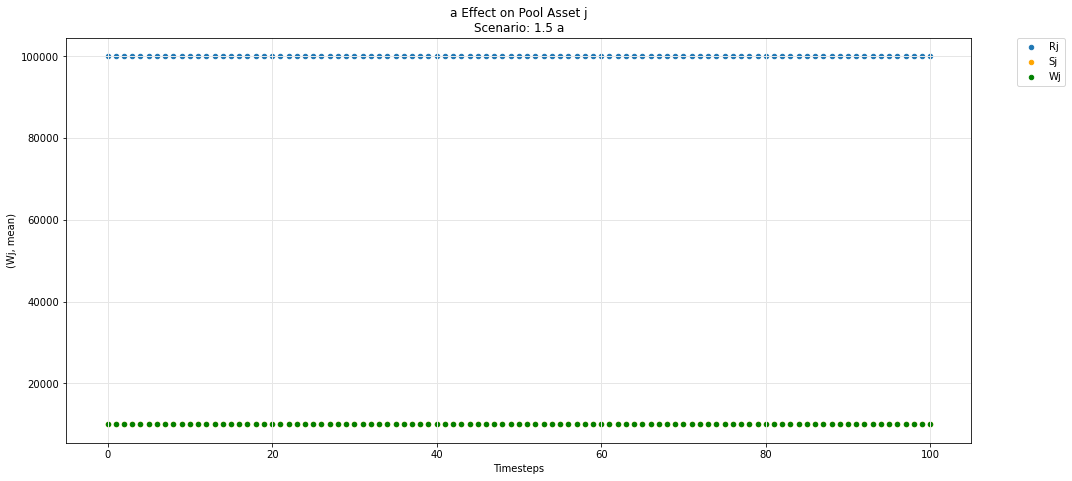

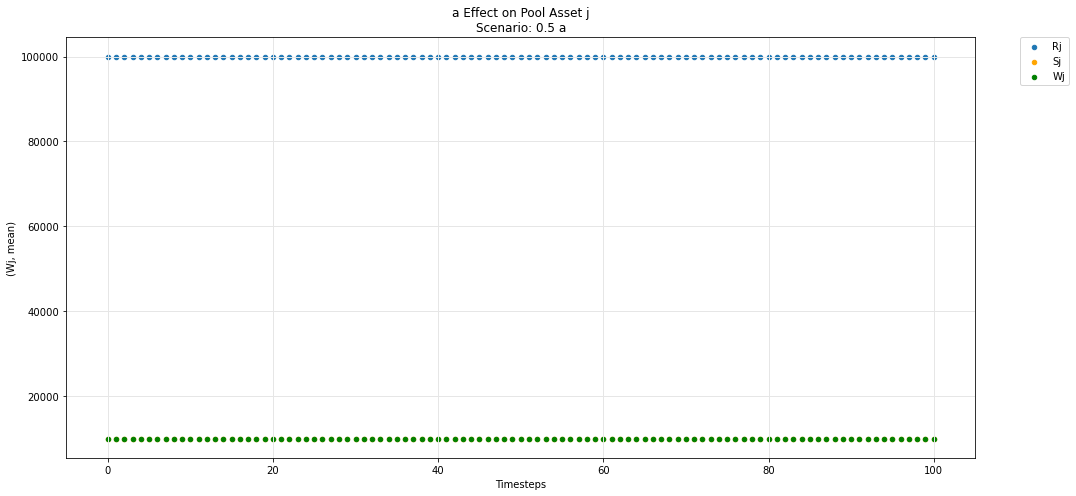

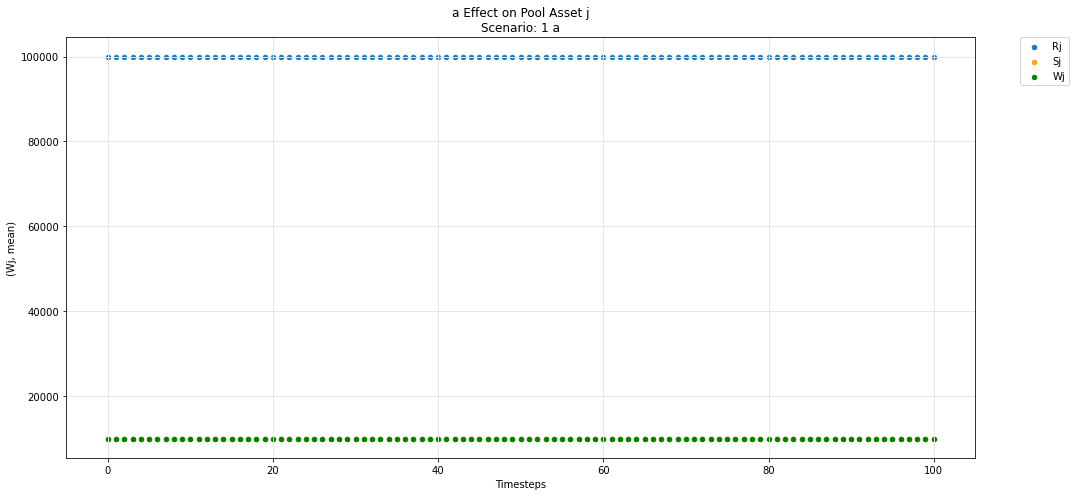

In [58]:
param_pool_simulation_plot(experiments, config_ids, 'a','j', 'R', 'S', 'W')

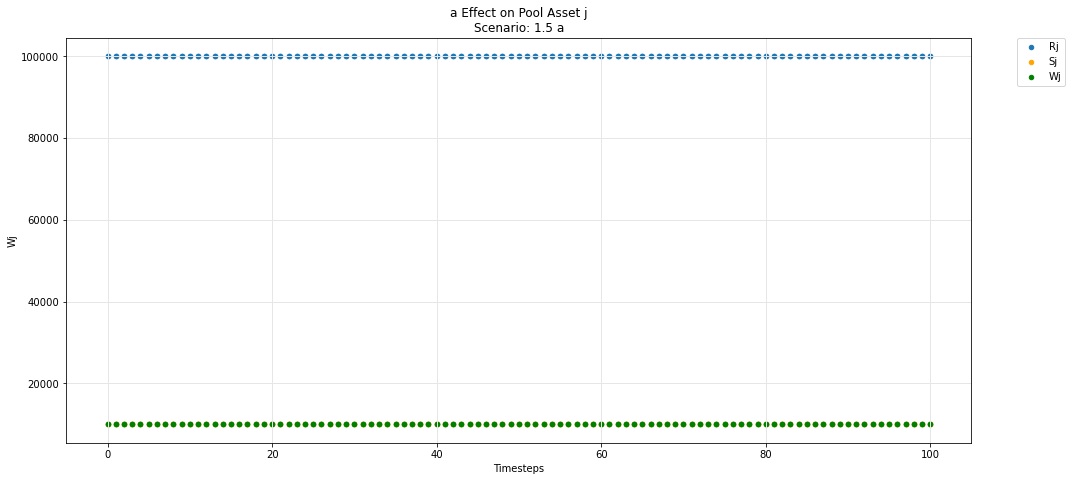

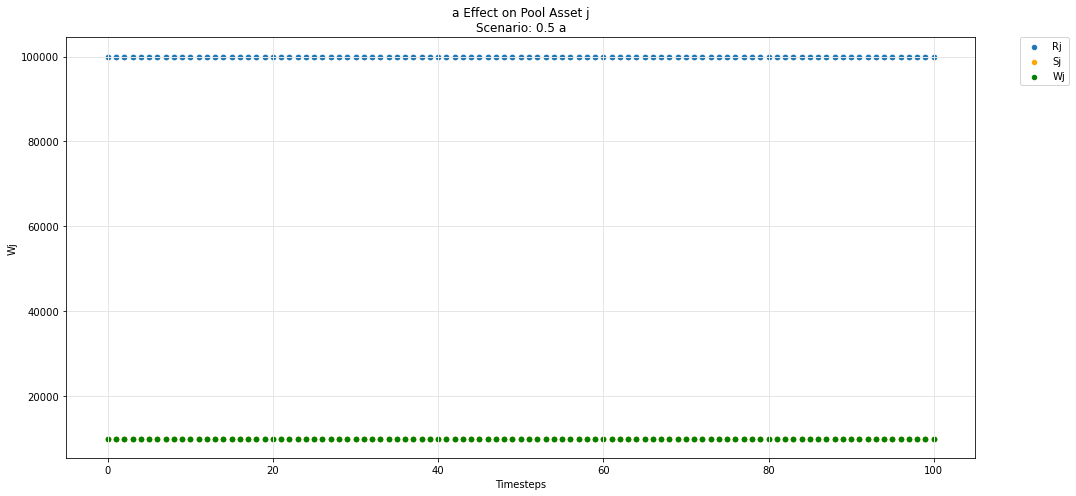

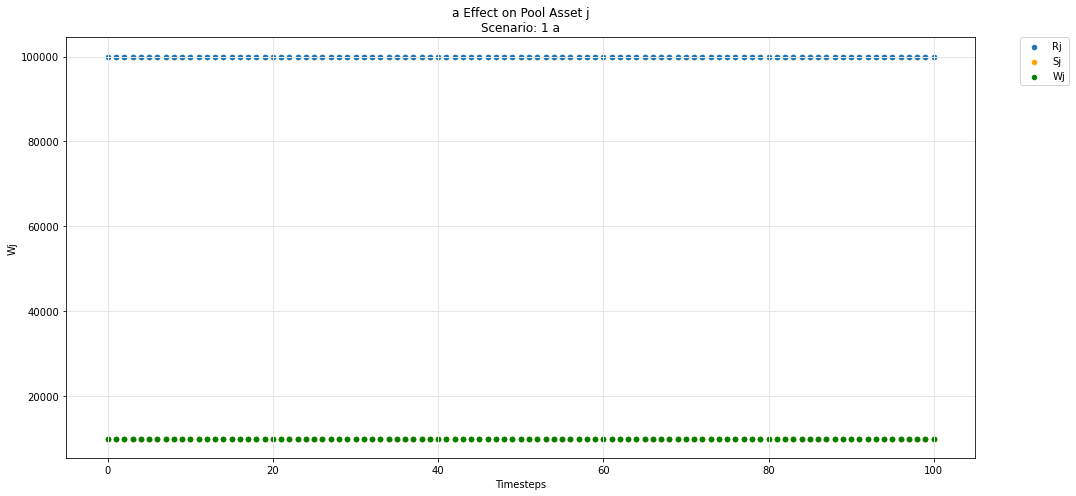

In [59]:
param_pool_plot(experiments, config_ids, 'a','j', 'R', 'S', 'W')

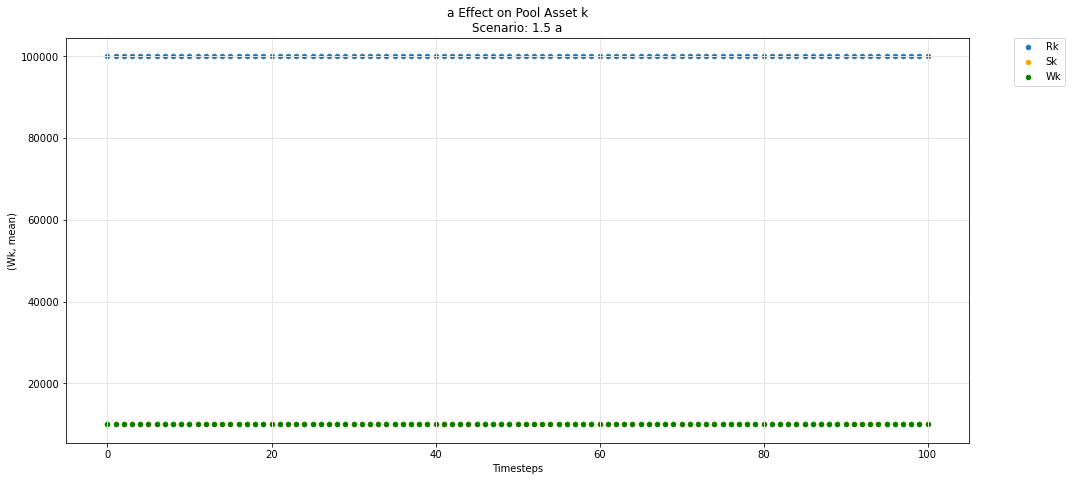

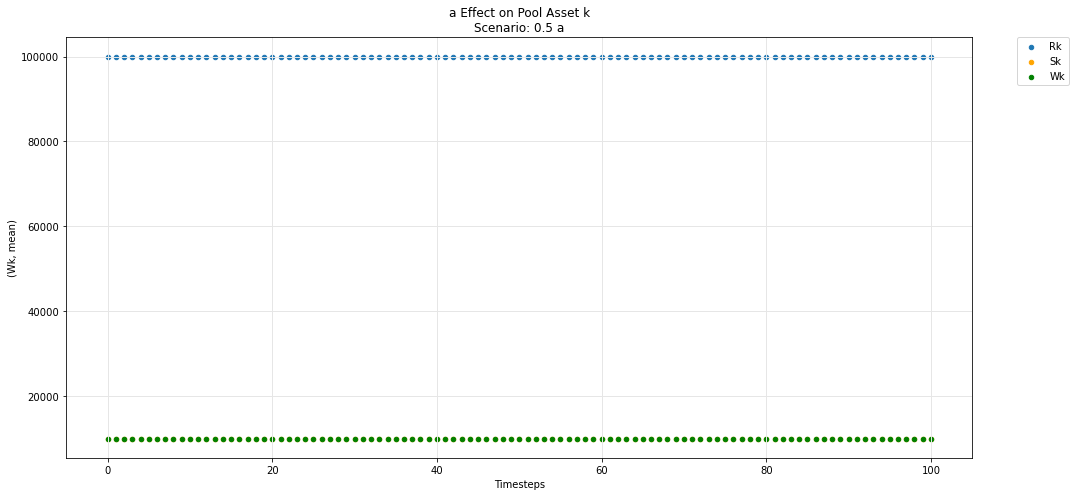

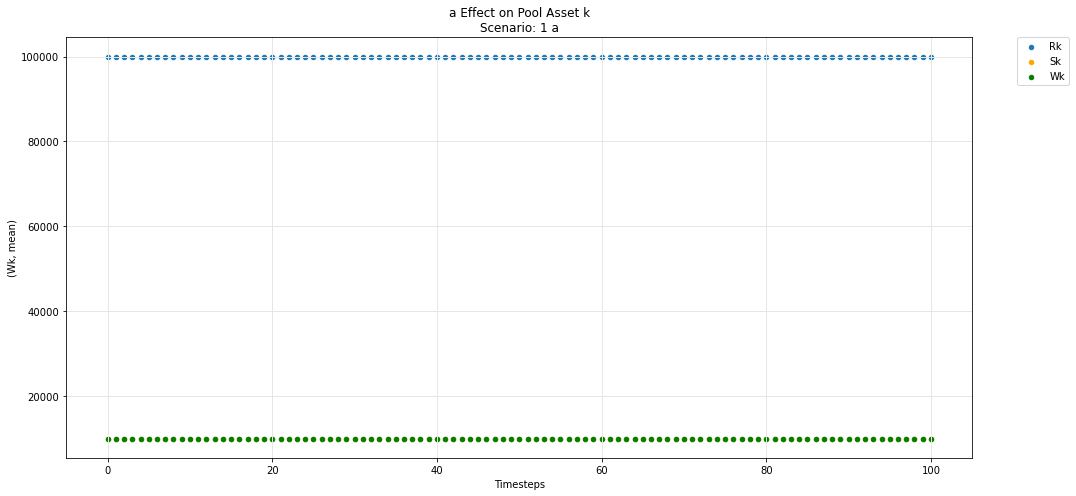

In [60]:
param_pool_simulation_plot(experiments, config_ids, 'a','k', 'R', 'S', 'W')

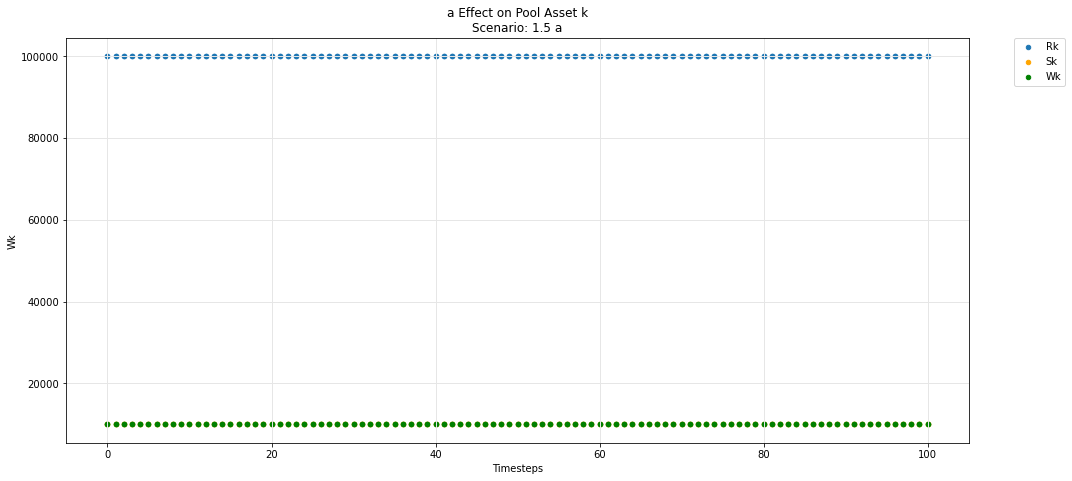

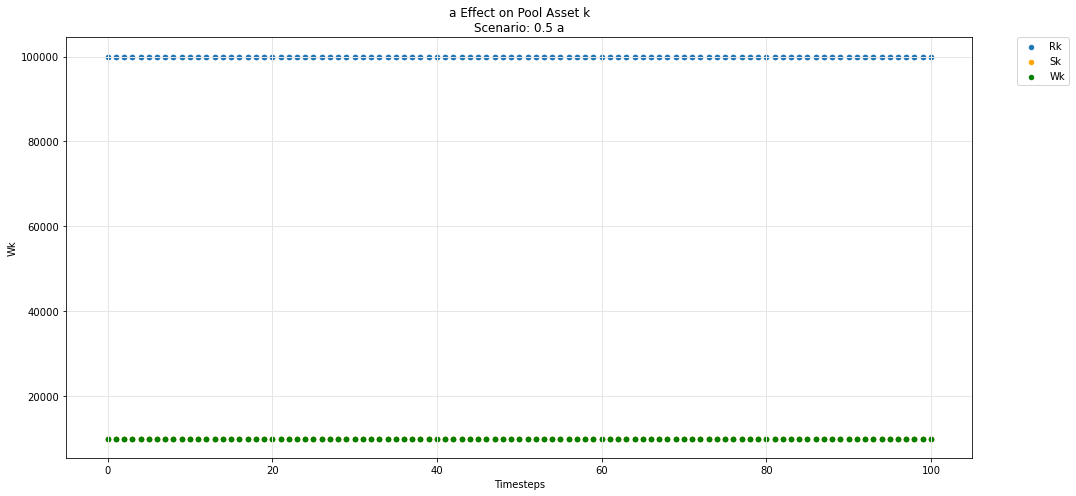

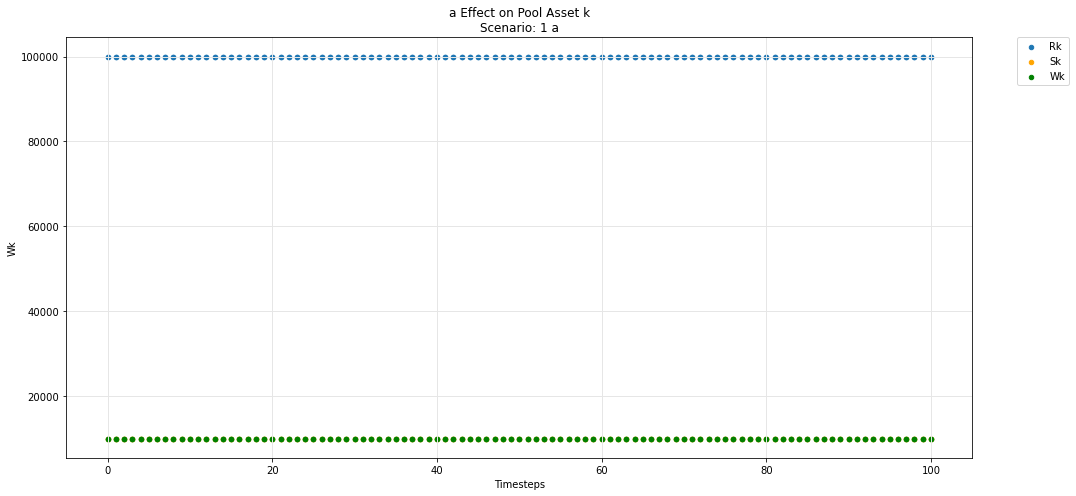

In [61]:
param_pool_plot(experiments, config_ids, 'a','k', 'R', 'S', 'W')

In [62]:
def param_pool_plot(experiments, config_ids, swept_variable, asset_id, y_variable, *args):
    """
    experiments is the simulation result dataframe.
    config_ids is the list configs executed upon in the simulation.
    swept_variable is the key (string) in config_ids that was being tested against.
    asset_id is the asset identifier in the pool (string) e.g i,j,k 
    y_variable is the state_variable (string) to be plotted against default timestep.

    *args for plotting more state_variables (string).
    """
    experiments = experiments.sort_values(by =['subset']).reset_index(drop=True)
    cols = 1
    rows = 1
    cc_idx = 0
    while cc_idx<len(experiments):
        cc = experiments.iloc[cc_idx]['subset']

        cc_label = experiments.iloc[cc_idx]['subset']

        secondary_label = [item['M'][swept_variable] for item in config_ids if  item["subset_id"]== cc_label]
        sub_experiments = experiments[experiments['subset']==cc]
        cc_idx += len(sub_experiments)
        fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))

        df = sub_experiments.copy()

        df_label = y_variable + asset_id
        df[df_label] = df.pool.apply(lambda x: np.array(x.pool[asset_id][y_variable]))
        colors = ['orange', 'g', 'magenta', 'r', 'k' ]
        
        ax = axs
        title = swept_variable + ' Effect on Pool Asset ' + asset_id + '\n' + 'Scenario: ' + str(secondary_label[0]) + ' ' + swept_variable
        # + 'Scenario: ' + str(cc_label)  + ' rules_price'
        ax.set_title(title)
        ax.set_ylabel('Funds')

        df.plot(x='timestep', y=df_label, label=df_label, ax=ax, legend=True, kind ='scatter')

        for count, arg in enumerate(args):
            df_arg_label = arg + asset_id
            df[df_arg_label] = df.pool.apply(lambda x: np.array(x.pool[asset_id][arg]))

            df.plot(x='timestep', y=df_arg_label, label=df_arg_label, ax=ax, legend=True, color = colors[count], kind ='scatter')

        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
            
    fig.tight_layout(rect=[0, 0, 1, .97])
    fig.patch.set_alpha(1)
    plt.close()
    return display(fig)

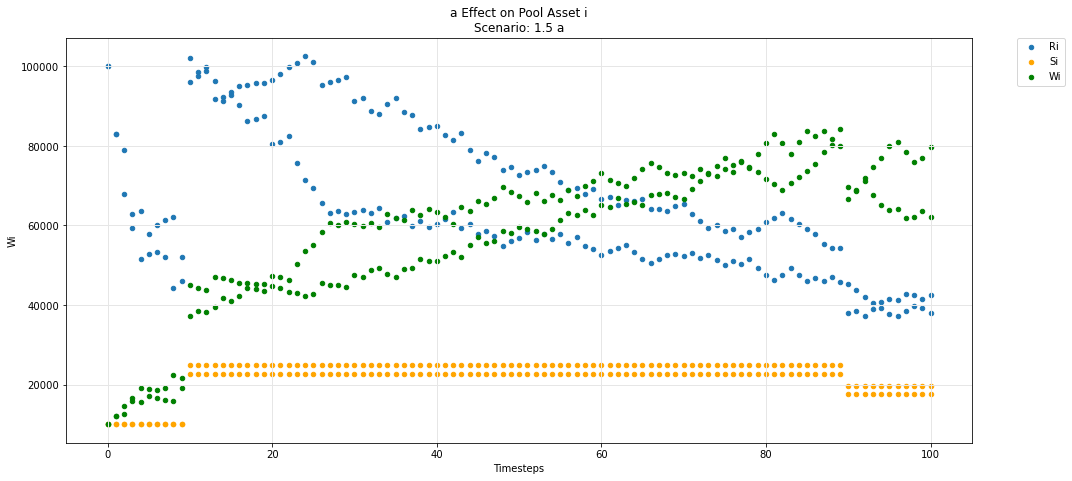

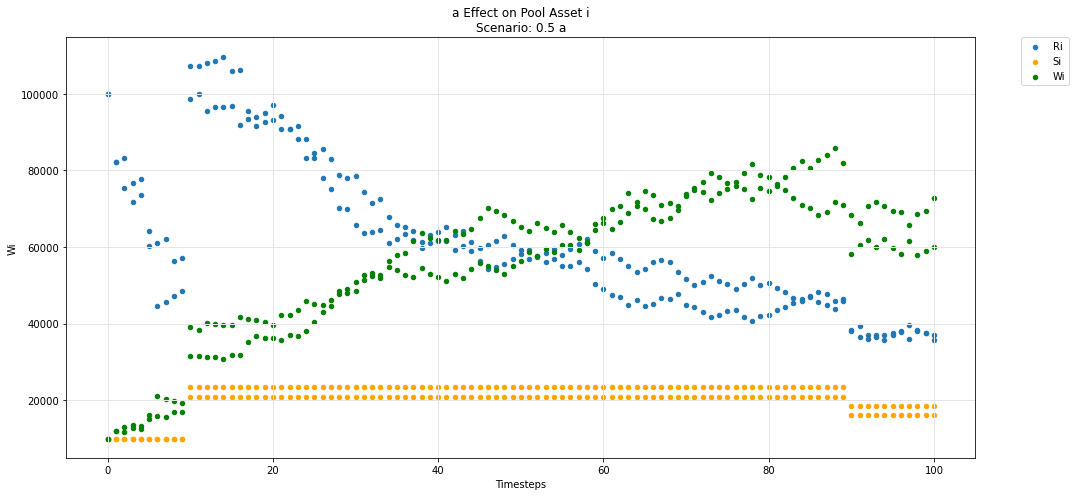

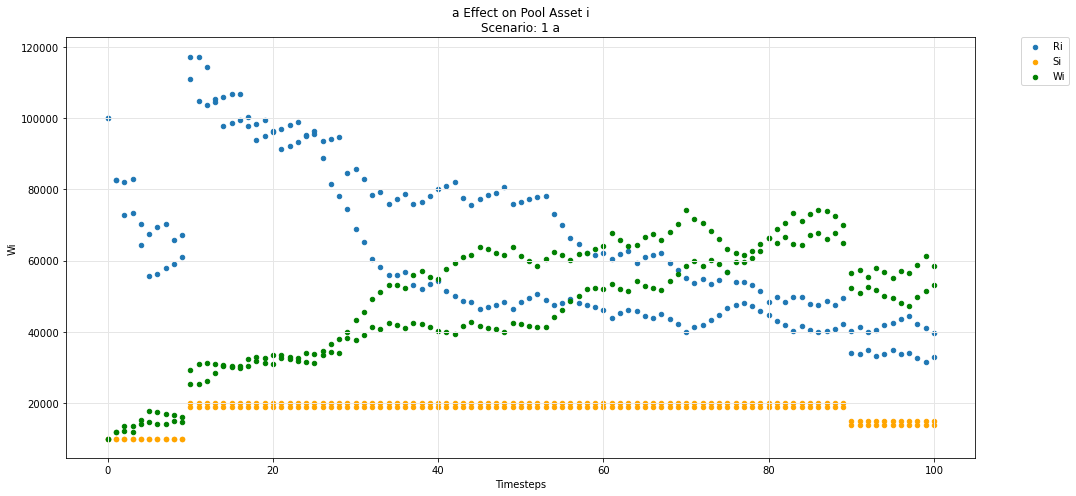

In [63]:
param_pool_plot(experiments, config_ids, 'a','i', 'R', 'S', 'W')

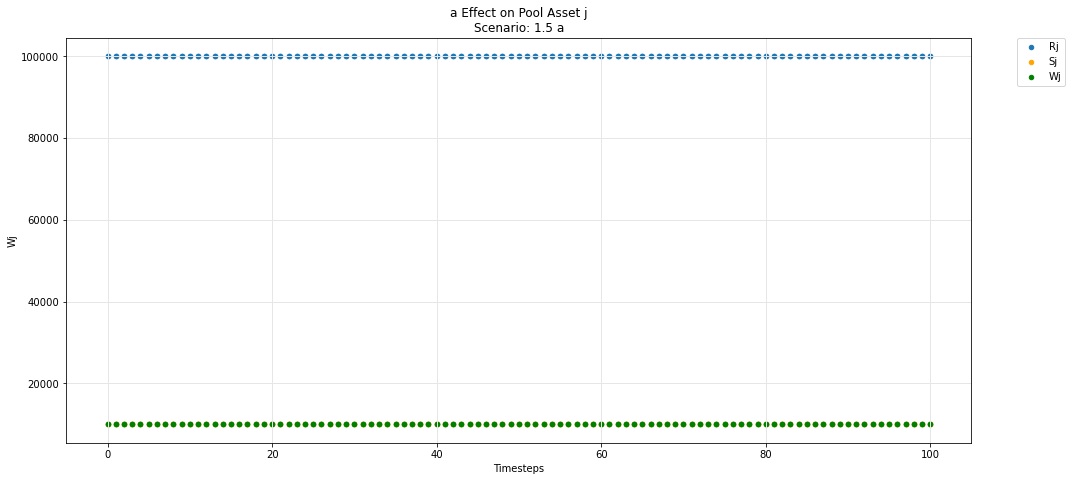

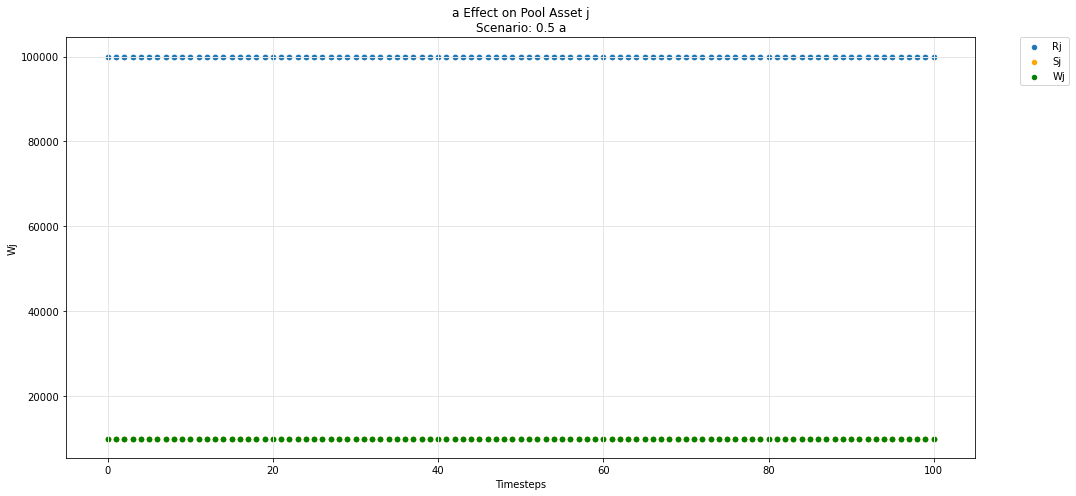

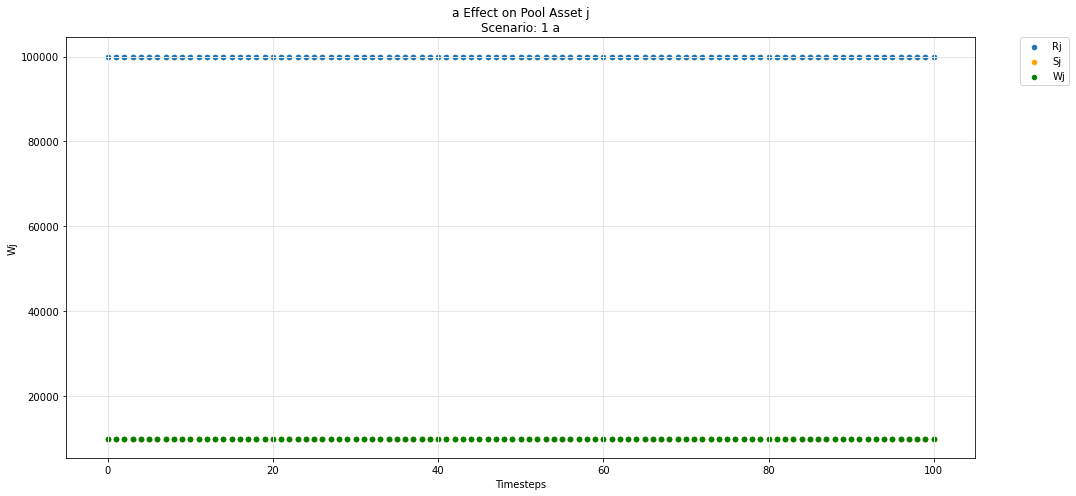

In [64]:
param_pool_plot(experiments, config_ids, 'a','j', 'R', 'S', 'W')

In [65]:
def param_pool_simulation_plot(experiments, config_ids, swept_variable, asset_id, y_variable, *args):
    """
    experiments is the simulation result dataframe.
    config_ids is the list configs executed upon in the simulation.
    swept_variable is the key (string) in config_ids that was being tested against.
    asset_id is the asset identifier in the pool (string) e.g i,j,k 
    y_variable is the state_variable (string) to be plotted against default timestep.

    *args for plotting more state_variables (string).
    """
    experiments = experiments.sort_values(by =['subset']).reset_index(drop=True)
    cols = 1
    rows = 1
    cc_idx = 0
    while cc_idx<len(experiments):
        cc = experiments.iloc[cc_idx]['subset']

        cc_label = experiments.iloc[cc_idx]['subset']

        secondary_label = [item['M'][swept_variable] for item in config_ids if  item["subset_id"]== cc_label]
        sub_experiments = experiments[experiments['subset']==cc]
        cc_idx += len(sub_experiments)
        fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(15*cols,7*rows))

        df = sub_experiments.copy()

        df_label = y_variable + asset_id
        df[df_label] = df.pool.apply(lambda x: np.array(x.pool[asset_id][y_variable]))
        colors = ['orange', 'g', 'magenta', 'r', 'k' ]
        df = df.groupby('timestep').agg({df_label: ['min', 'mean', 'max']}).reset_index()
        ax = axs
        title = swept_variable + ' Effect on Pool Asset ' + asset_id + '\n' + 'Scenario: ' + str(secondary_label[0]) + ' ' + swept_variable
        # + 'Scenario: ' + str(cc_label)  + ' rules_price'
        ax.set_title(title)
        ax.set_ylabel('Funds')

        df.plot(x='timestep', y=(df_label,'mean'), label=df_label, ax=ax, legend=True, kind ='scatter')
        ax.fill_between(df.timestep, df[(df_label,'min')], df[(df_label,'max')], alpha=0.3)    
        for count, arg in enumerate(args):
            df = sub_experiments.copy()
            
            df_arg_label = arg + asset_id
            df[df_arg_label] = df.pool.apply(lambda x: np.array(x.pool[asset_id][arg]))
            df = df.groupby('timestep').agg({df_arg_label: ['min', 'mean', 'max']}).reset_index()

            df.plot(x='timestep', y=(df_arg_label,'mean'), label=df_arg_label, ax=ax, legend=True, color = colors[count], kind ='scatter')
            ax.fill_between(df.timestep, df[(df_arg_label,'min')], df[(df_arg_label,'max')], alpha=0.3)    

        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        ax.set_xlabel('Timesteps')
        ax.grid(color='0.9', linestyle='-', linewidth=1)

        plt.tight_layout()
            
    fig.tight_layout(rect=[0, 0, 1, .97])
    fig.patch.set_alpha(1)
    plt.close()
    return display(fig)

# Prices

## Uniswap

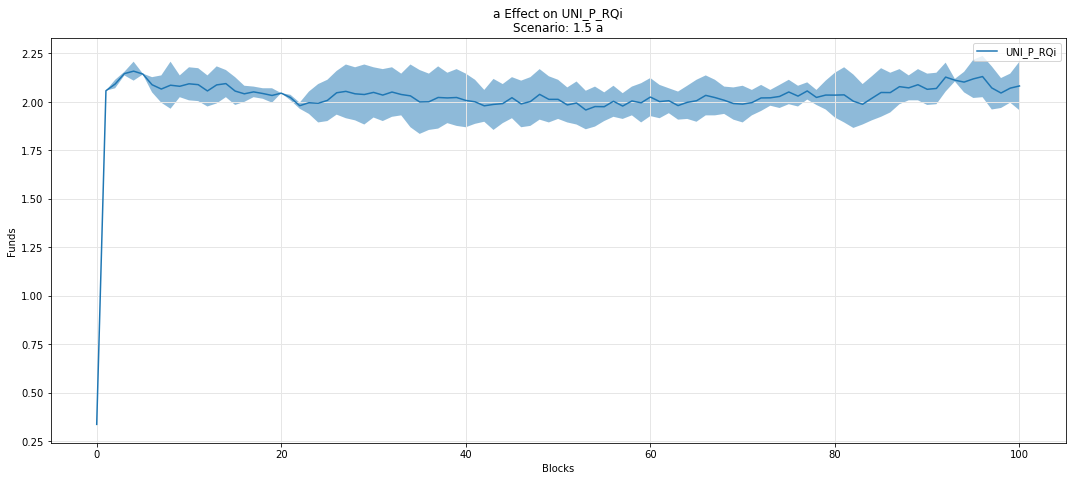

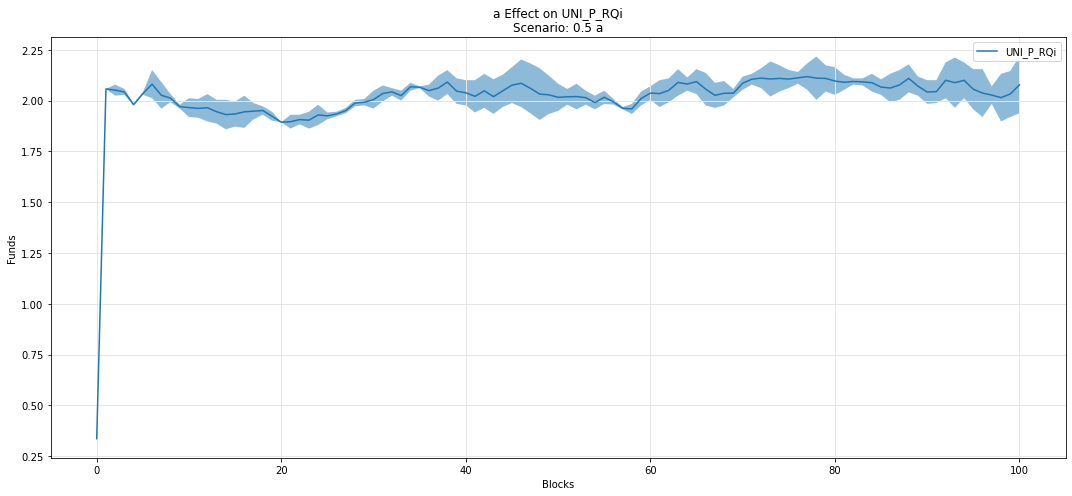

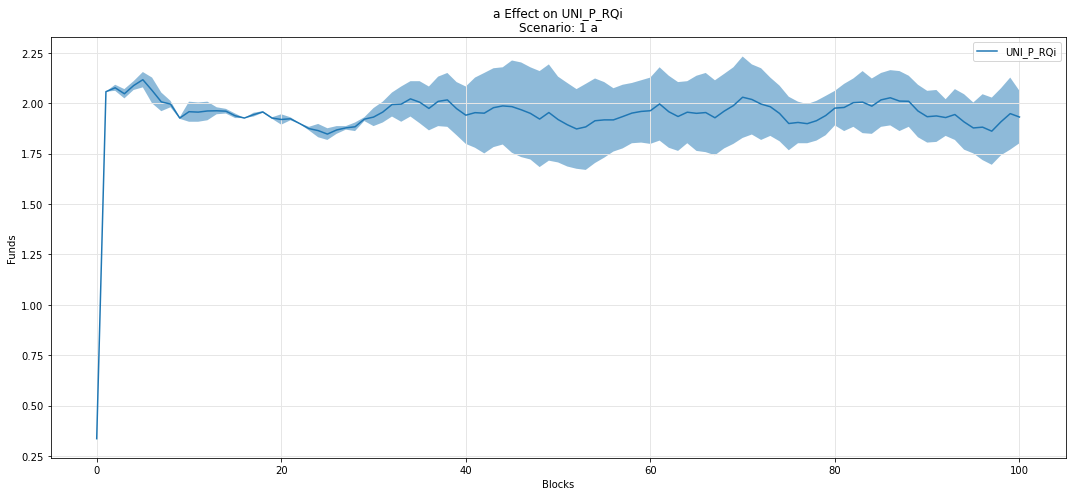

In [66]:
param_fan_plot3(experiments, config_ids, 'a', 'UNI_P_RQi')

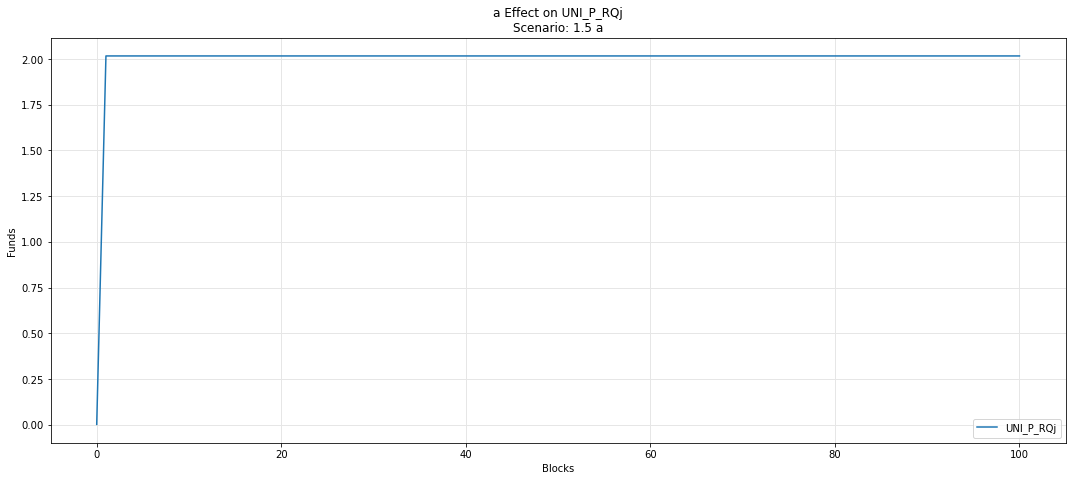

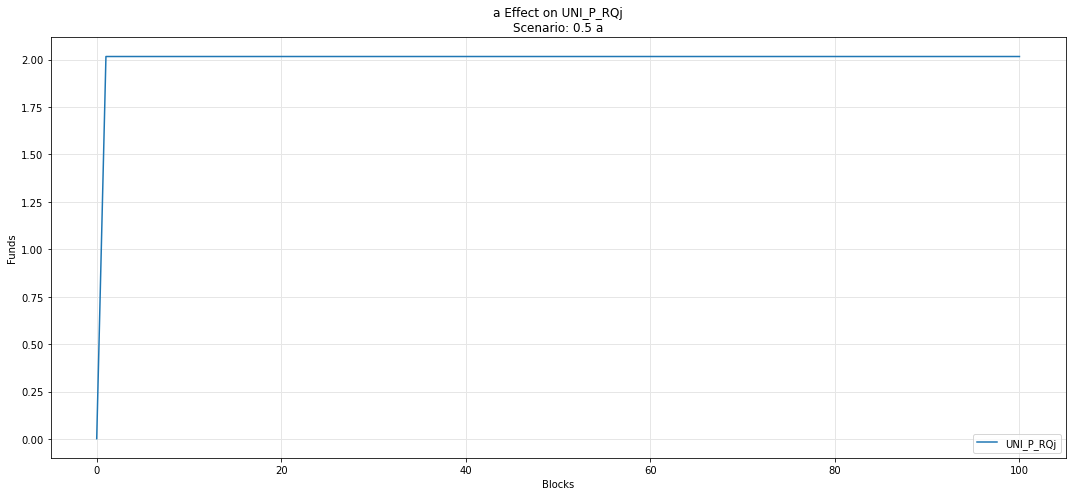

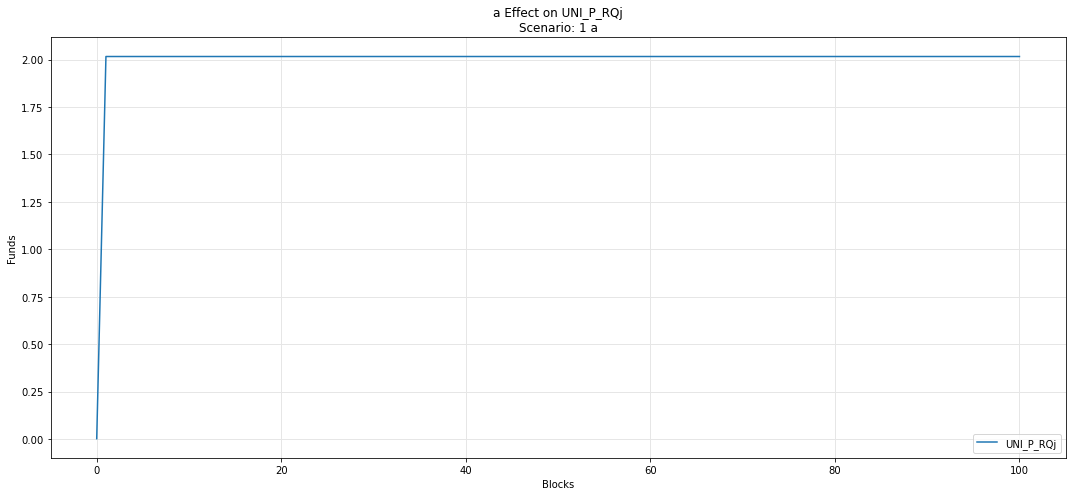

In [67]:
param_fan_plot3(experiments, config_ids, 'a', 'UNI_P_RQj')

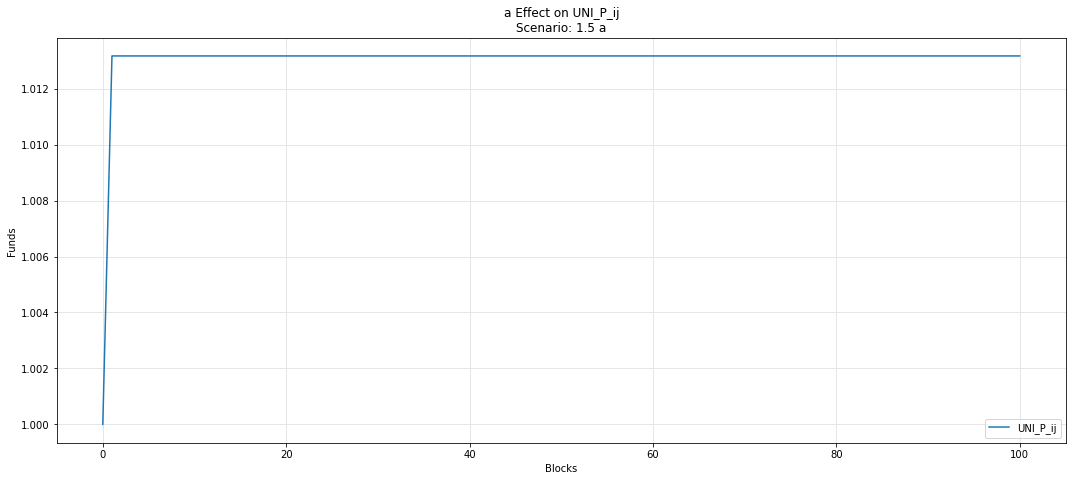

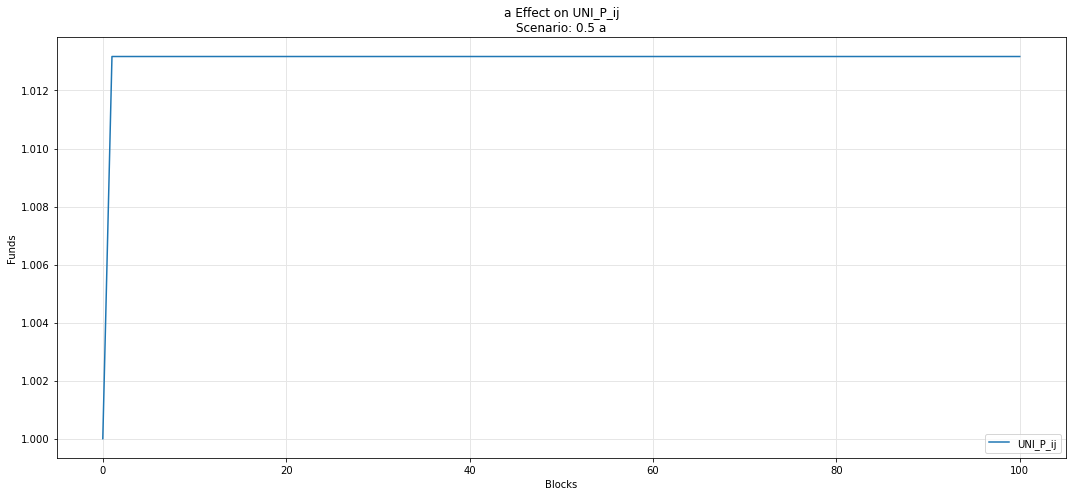

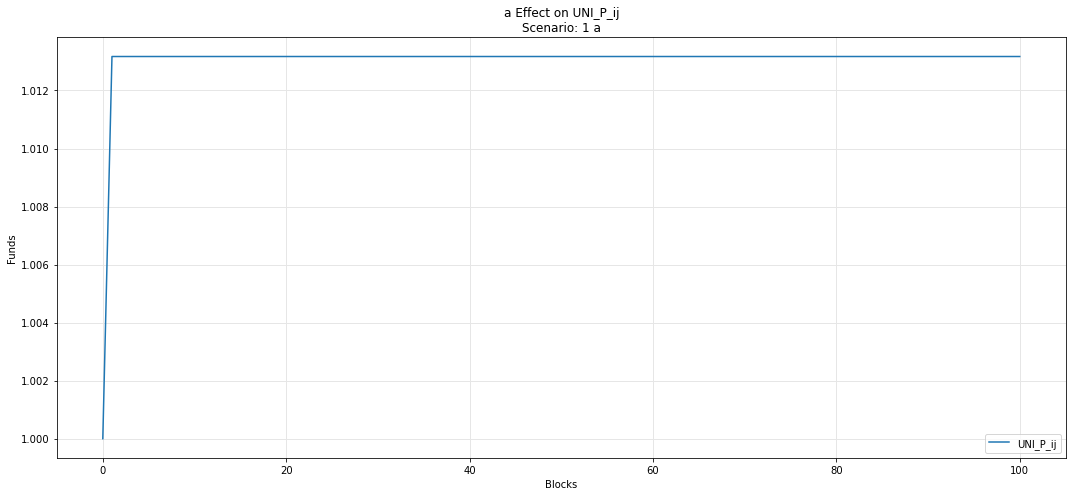

In [68]:
param_fan_plot3(experiments, config_ids, 'a', 'UNI_P_ij')

## Omnipool

## Asset i

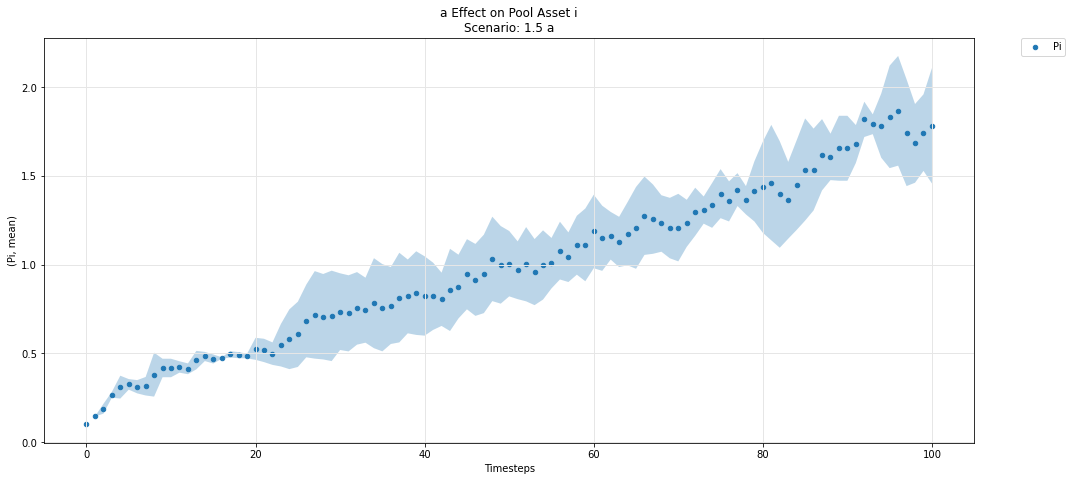

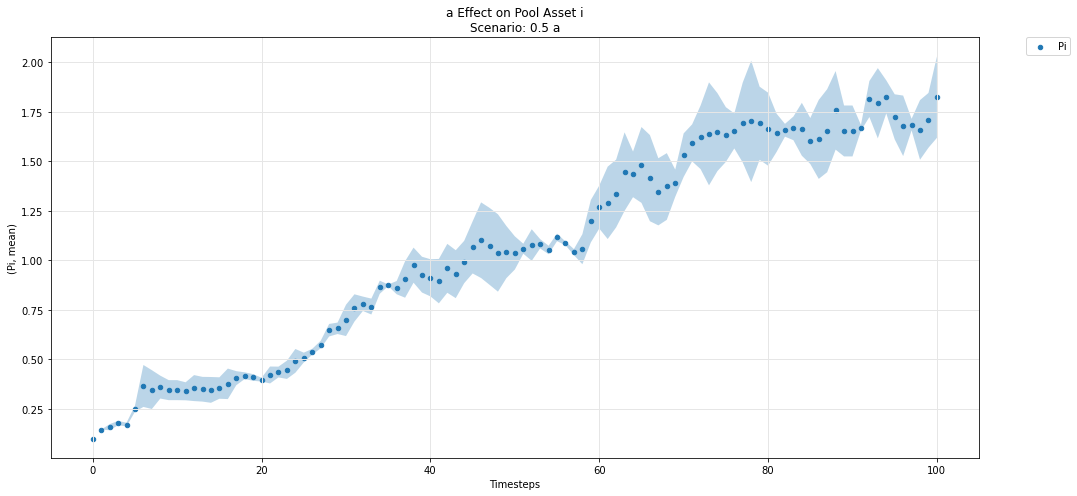

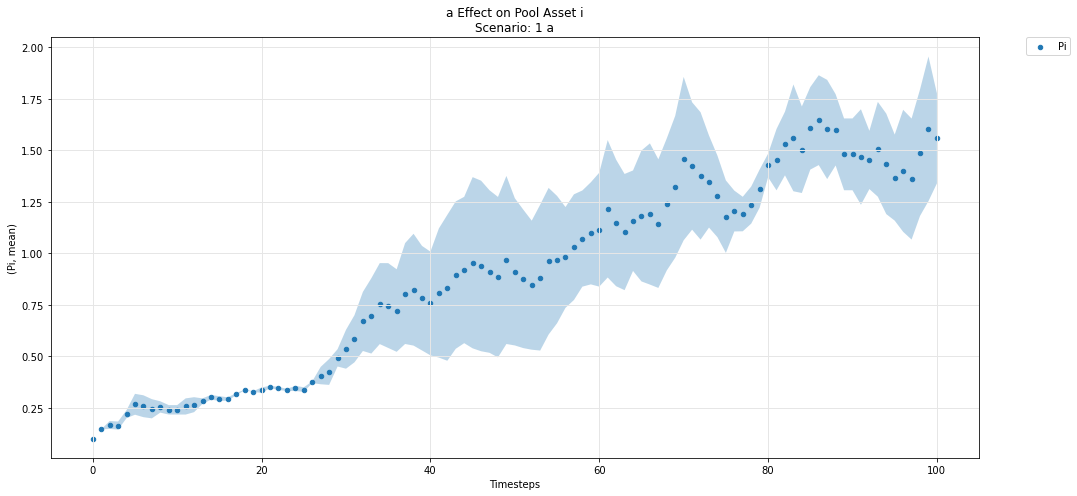

In [69]:
param_pool_simulation_plot(experiments, config_ids, 'a','i','P')

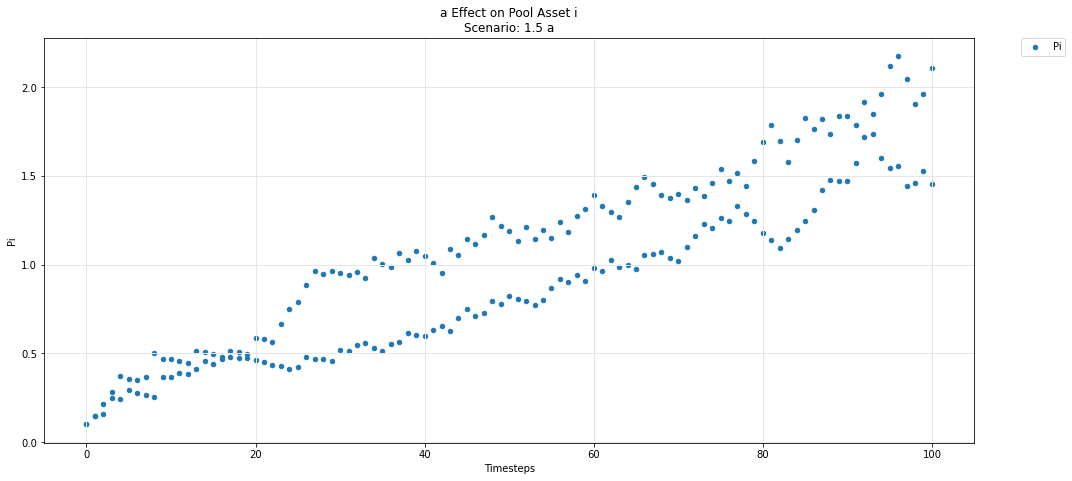

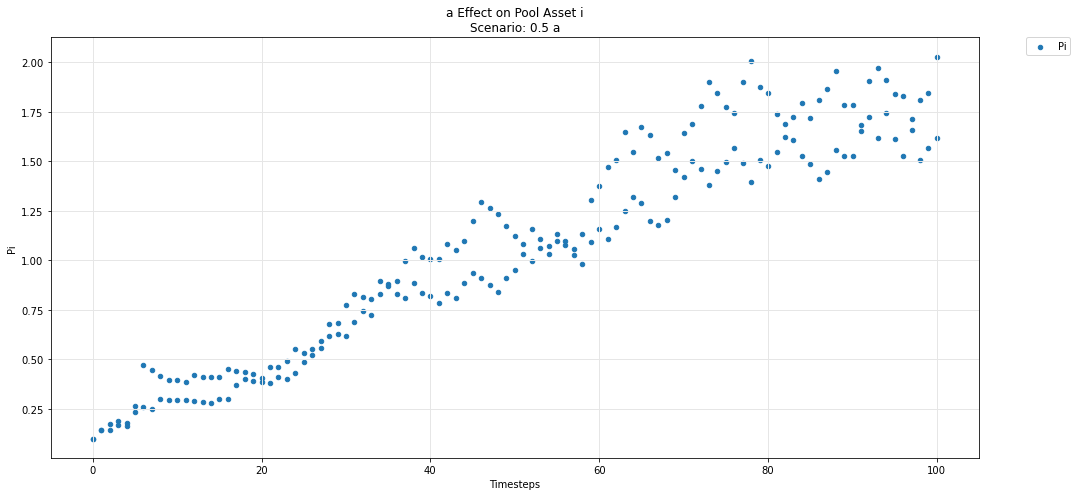

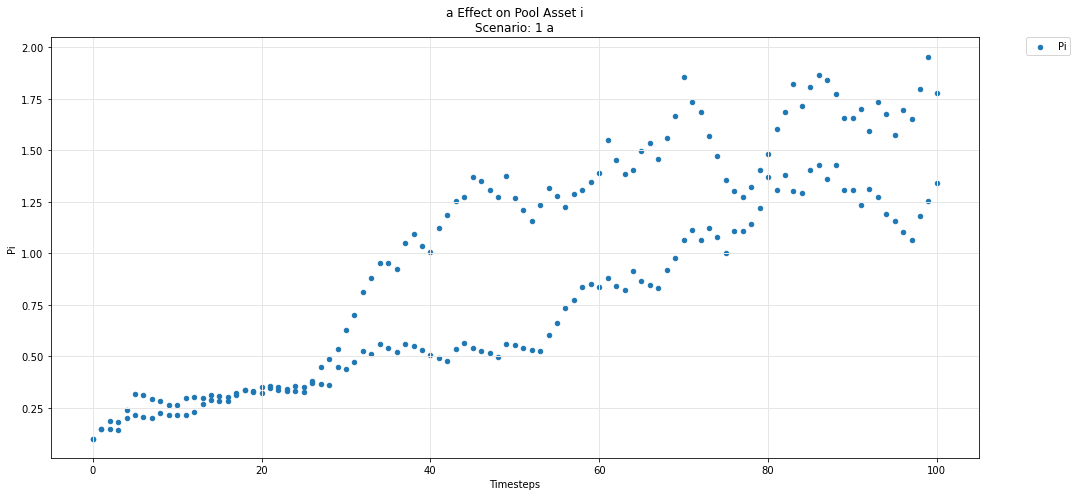

In [70]:
param_pool_plot(experiments, config_ids, 'a','i','P')

## Asset j

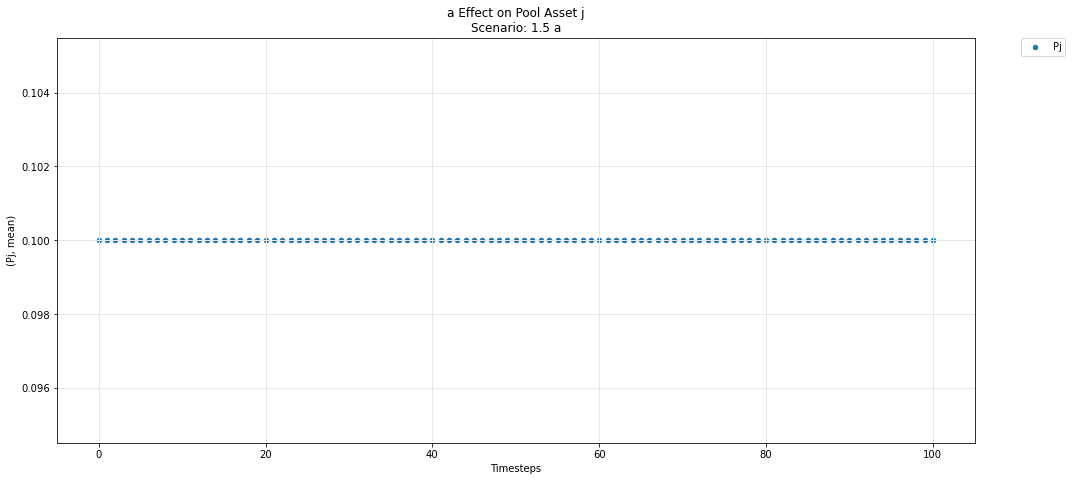

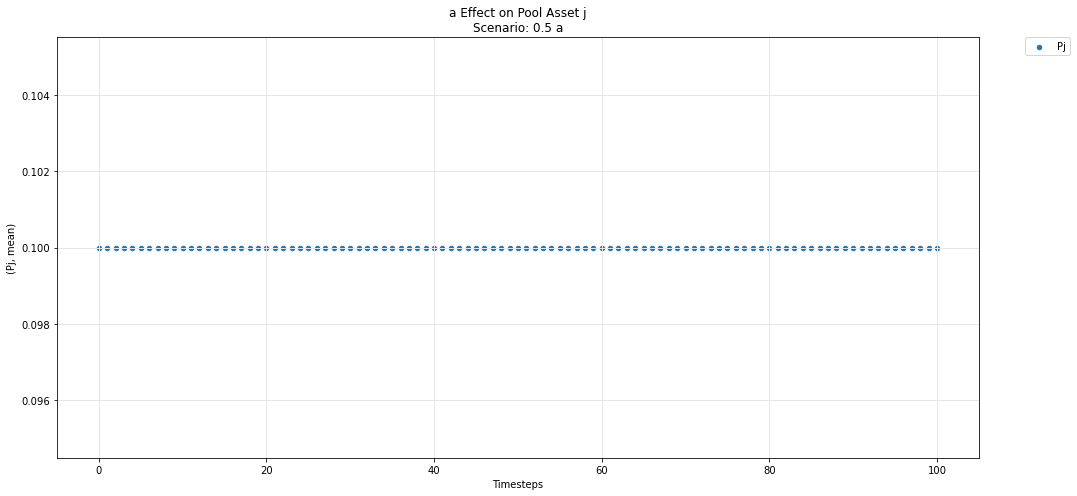

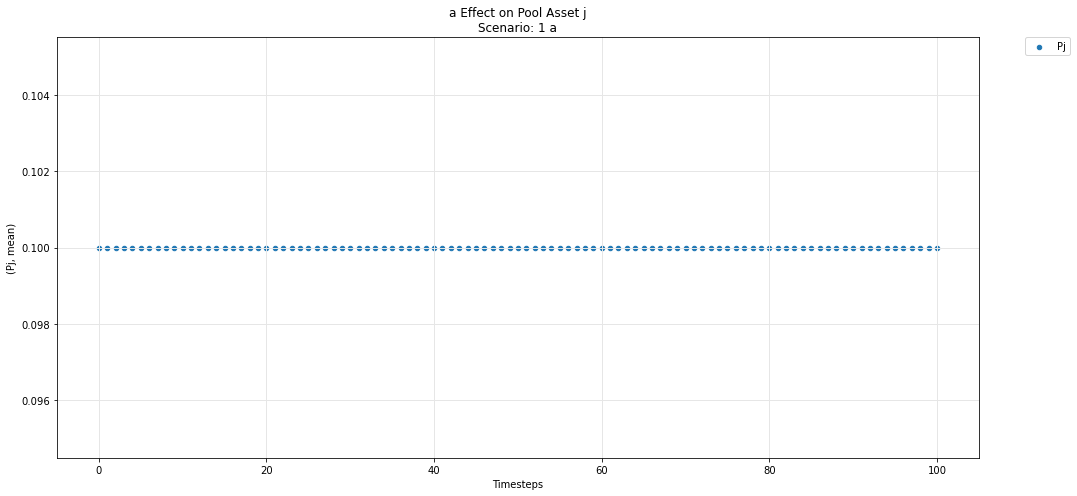

In [71]:
param_pool_simulation_plot(experiments, config_ids, 'a','j','P')

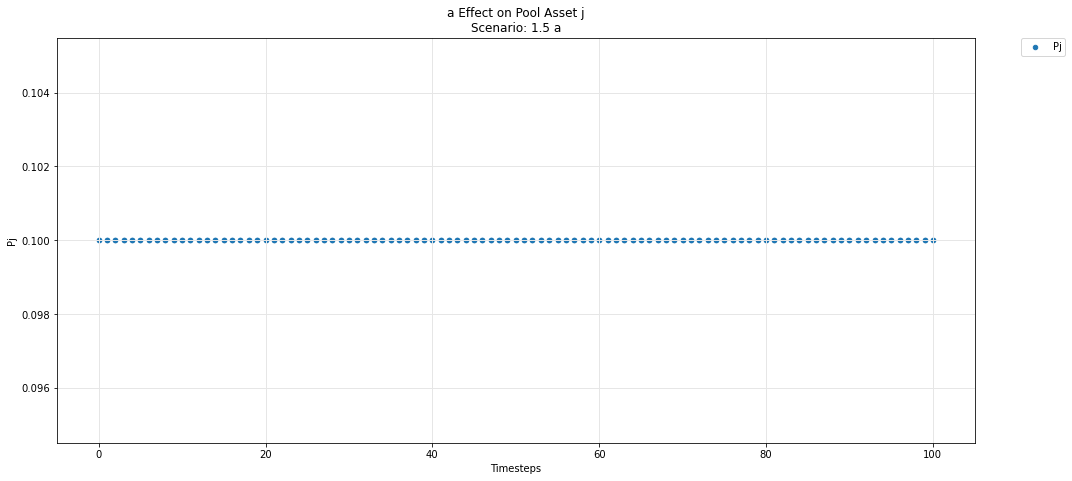

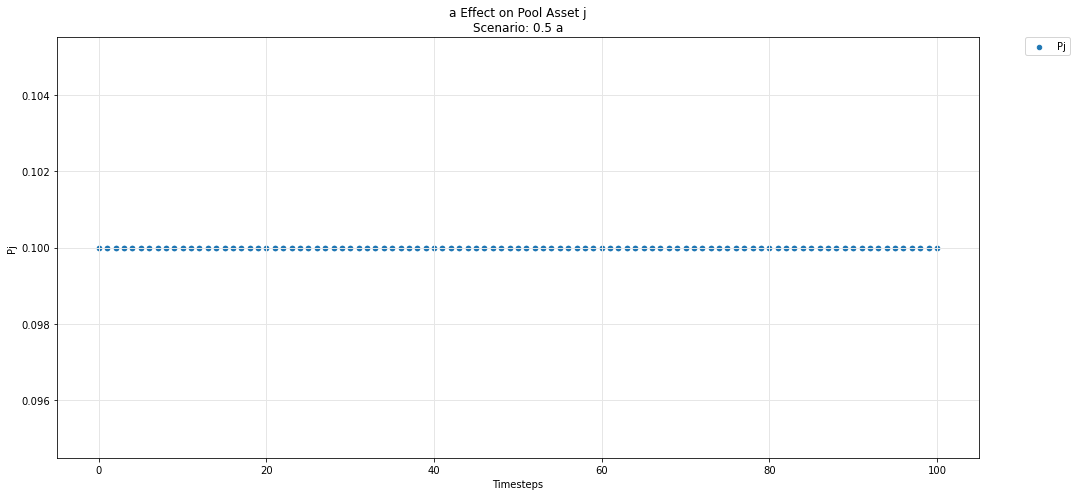

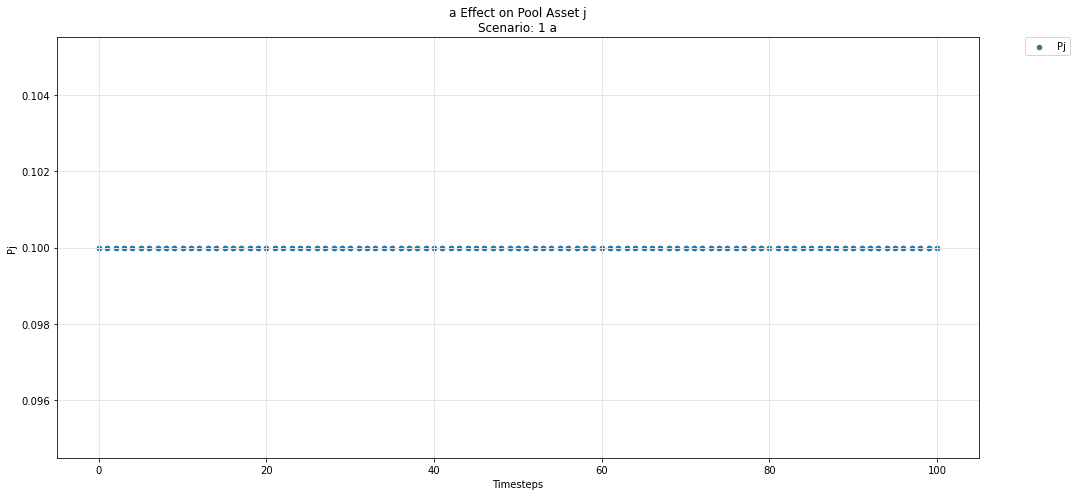

In [72]:
param_pool_plot(experiments, config_ids, 'a','j','P')

## Asset k

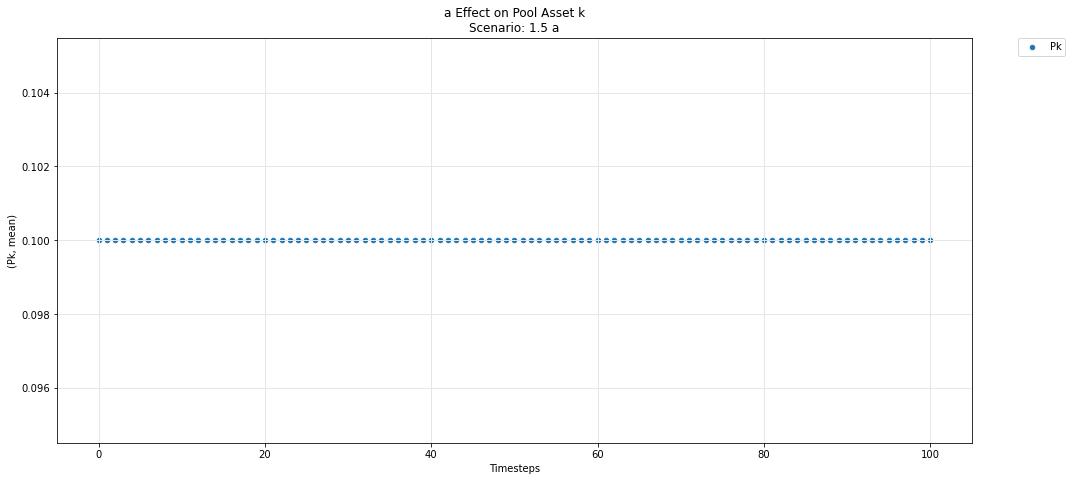

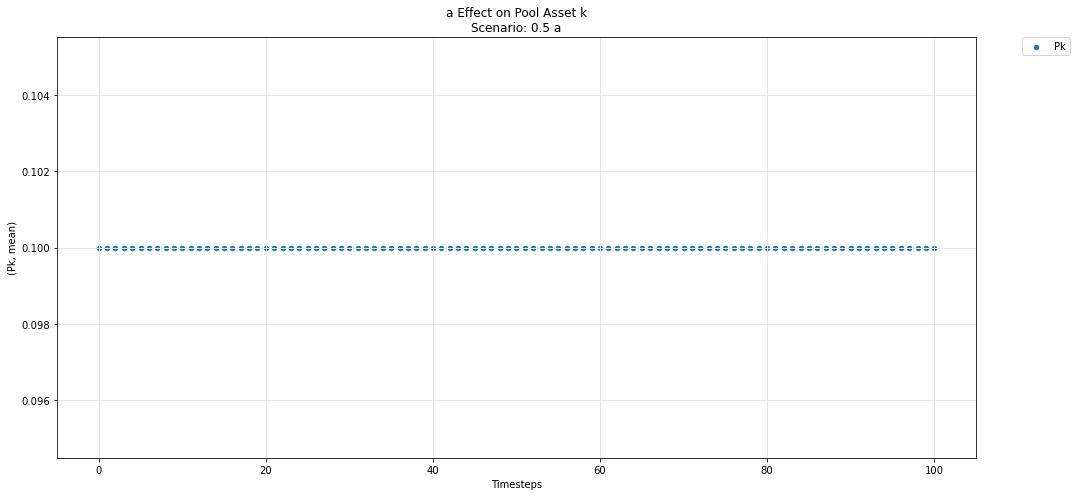

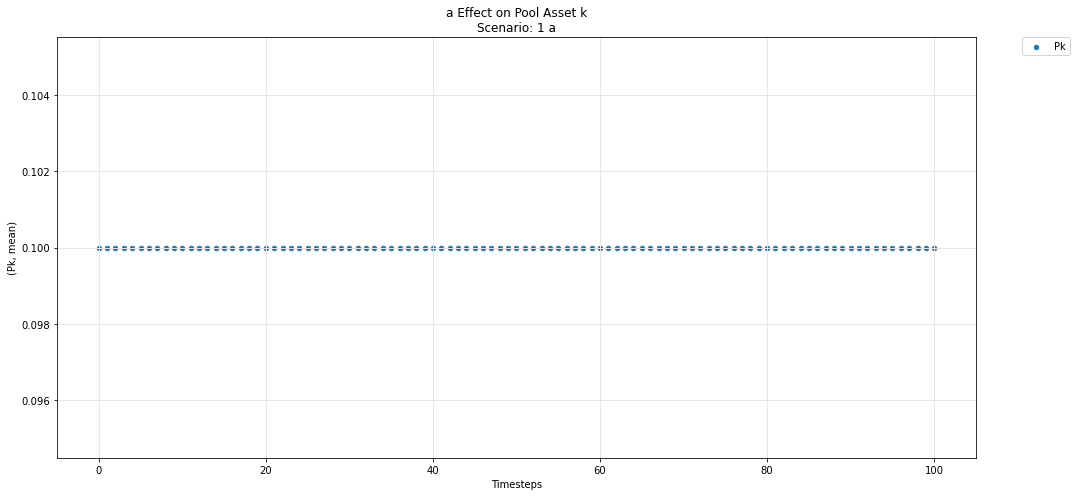

In [73]:
param_pool_simulation_plot(experiments, config_ids, 'a','k','P')

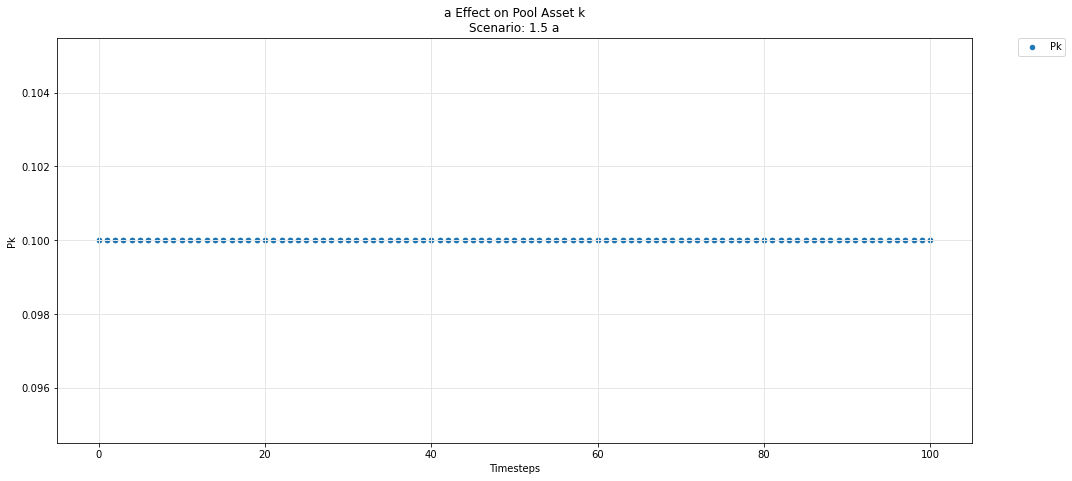

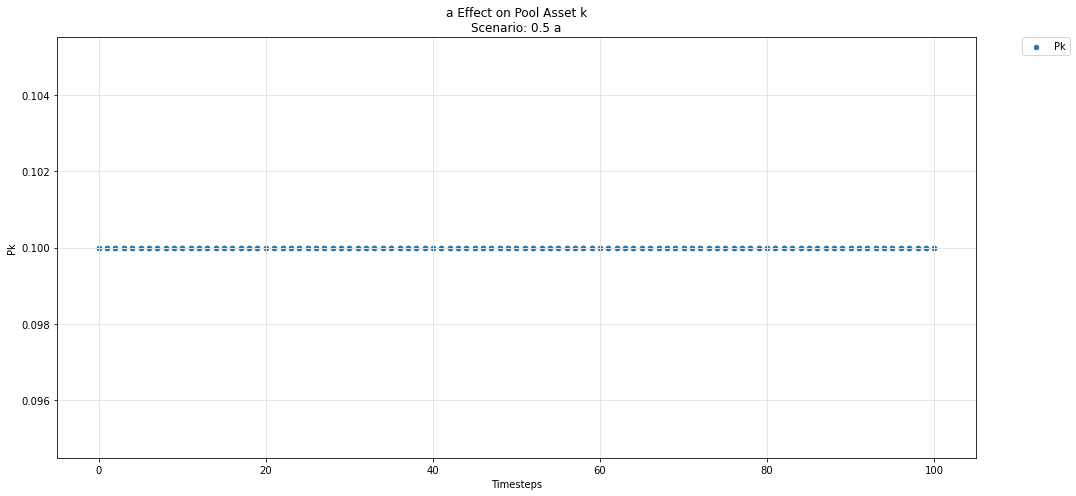

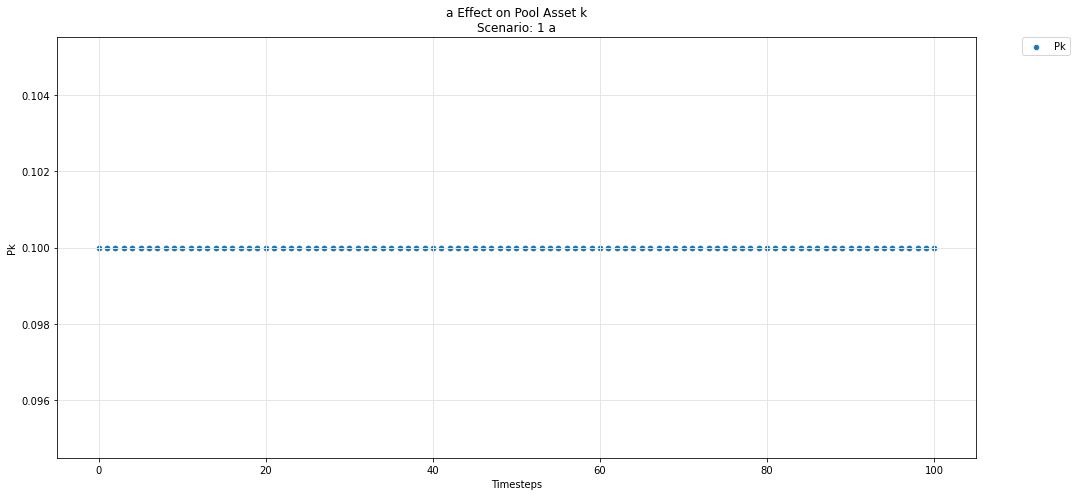

In [74]:
param_pool_plot(experiments, config_ids, 'a','k','P')